# Relación entre variables

Dos variables pueden estar relacionadas entre si de varias formas. En esta sección vamos a ver como podemos averiguar las relaciones que pueden existir entre dos variables.

Pero antes veamos unos conceptos básicos:

La variable $Y$ tiene una variación lineal respecto a $X$ si:
\\[
Y=\beta·X+a
\\]
Donde $\beta$ y $a$ son constantes fijas que definen la relación entre las dos variables. Pero en cambio, no tendremos una relación lineal en los siguientes casos:
\\[
Y=\beta·X^2+a
\\]
\\[
Y=\beta^X
\\]

# Covarianza

La covarianza es un valor que indica el grado de variación **lineal** conjunta de dos variables aleatorias respecto a sus medias.

Supongamos que queremos comparar dos variables aleatorias X e Y:
* Tendremos alta covarianza (positiva) cuando, para valores altos de X, tengamos mayoritariamente valores altos de Y
* Tendremos baja covarianza (negativa) cuando, para valores altos de X, tengamos mayoritariamente valores bajos de Y
* Tendremos covarianza cercana a 0, para valores altos de X, los valores de Y pueden ser altos o bajos por igual


Su formula es la siguiente:
\\[
cov(X,Y) = \frac{1}{N} \sum _{i=1}^N \left( x_i-\bar{x} \right)\left( y_i-\bar{y} \right)
\\]

Recordemos la formula de la varianza:
\\[
Var(x) =  \frac{1}{N} \sum _{i=1}^N \left( x_i-\bar{x} \right)^2
\\]

La covarianza de una variable aleatoria consigo misma es igual a la varianza:
\\[
cov(X,X) = Var(X)
\\]

En R la calculamos con la función *cov(x,y)*


[1] "La covarianza de las variables x, y1 es: 20.23"

[1] "La covarianza de las variables x, y2 es: -0.39"

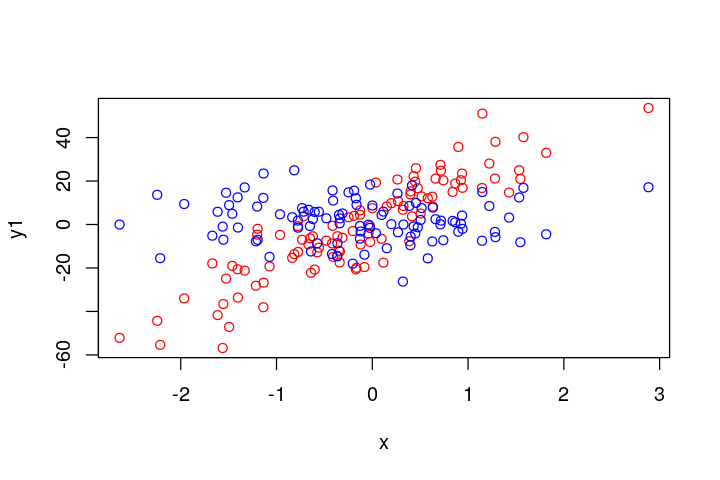

In [1]:
options(repr.plot.height=4,repr.plot.width=6)

n <- 100
x <- rnorm(n,sd=1)
y1 <- 20*x+1+rnorm(n,sd=10)
y2 <- rnorm(n,mean=2, sd=10)
paste("La covarianza de las variables x, y1 es:",round(cov(x,y1),2))
paste("La covarianza de las variables x, y2 es:",round(cov(x,y2),2))
plot(x,y1,col='red')
points(x,y2,col="blue")

En cambio en el siguiente ejemplo la covarianza falla al tratar de encontrar una relación entre dos variables al no ser esta lineal.

[1] "La covarianza de las variables x, y es: -0.24"

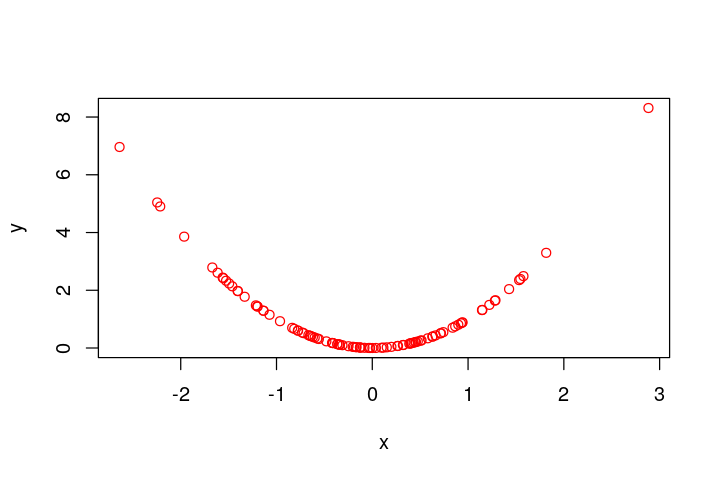

In [2]:
y <- x^2
paste("La covarianza de las variables x, y es:",round(cov(x,y),2))
plot(x,y,col='red')

### Ejemplo para finanzas


En el mercado bursátil, se pone un gran énfasis en reducir el riesgo asumido. Esto generalmente significa que estas acciones no se mueven en la misma dirección. Se suelen elegir acciones que tienen una menor covarianza entre si.
Esto se suele hacer no sobre el valor de la acción en sí, sino sobre la tasa de retorno al final de cada día.

In [3]:
suppressWarnings(require("quantmod"))
start <- as.Date("2000-01-01")
end <- as.Date("2021-01-01")
TEF<-getSymbols("TEF.MC", src = "yahoo", from = start, to = end,auto.assign = F)
SAN<-getSymbols("SAN.MC", src = "yahoo", from = start, to = end,auto.assign = F)
BBVA<-getSymbols("BBVA.MC", src = "yahoo", from = start, to = end,auto.assign = F)

Loading required package: quantmod

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
“TEF.MC contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message:
“SAN.MC contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message:
“BBVA.MC contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or 

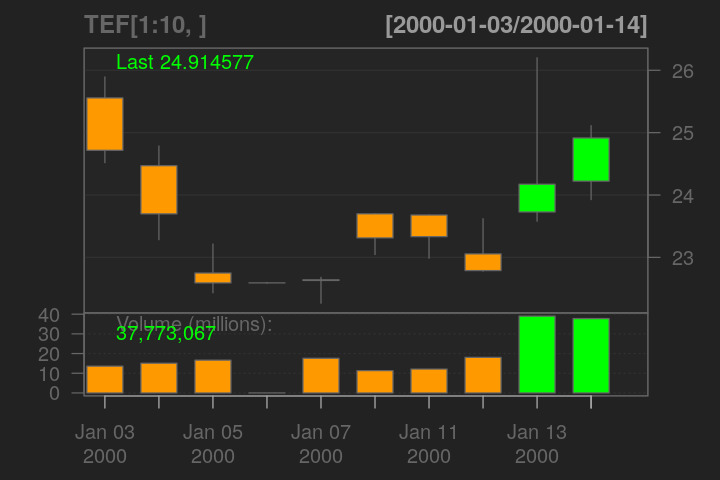

In [4]:
candleChart(TEF[1:10,])

In [5]:
head(TEF)
str(TEF)

           TEF.MC.Open TEF.MC.High TEF.MC.Low TEF.MC.Close TEF.MC.Volume
2000-01-03    25.55722    25.89337   24.51911     24.71684      13579848
2000-01-04    24.46967    24.78605   23.28327     23.69851      15091975
2000-01-05    22.74938    23.21406   22.43301     22.59119      16630986
2000-01-06    22.59119    22.59119   22.59119     22.59119             0
2000-01-07    22.64063    22.68018   22.26493     22.63074      17595592
2000-01-10    23.69851    23.69851   23.04598     23.31293      11308250
           TEF.MC.Adjusted
2000-01-03        8.290470
2000-01-04        7.948902
2000-01-05        7.577490
2000-01-06        7.577490
2000-01-07        7.590756
2000-01-10        7.819572

An ‘xts’ object on 2000-01-03/2020-12-31 containing:
  Data: num [1:5398, 1:6] 25.6 24.5 22.7 22.6 22.6 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:6] "TEF.MC.Open" "TEF.MC.High" "TEF.MC.Low" "TEF.MC.Close" ...
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
List of 2
 $ src    : chr "yahoo"
 $ updated: POSIXct[1:1], format: "2022-11-03 21:19:53"


In [6]:
convertToDf<-function(stock){
    valueAdjusted <- stock[,6]
    df <- data.frame(index(valueAdjusted), valueAdjusted, row.names=1:length(valueAdjusted))
    colnames(df) <- c("date",gsub(".Adjusted","",names(valueAdjusted)))
    df
}

df_TEF <- convertToDf(TEF)
df_SAN <- convertToDf(SAN)
df_BBVA <- convertToDf(BBVA)
head(df_TEF)
str(df_SAN)

,date,TEF.MC
,<date>,<dbl>
1,2000-01-03,8.290470
2,2000-01-04,7.948902
3,2000-01-05,7.577490
4,2000-01-06,7.577490
5,2000-01-07,7.590756
6,2000-01-10,7.819572


'data.frame':	5398 obs. of  2 variables:
 $ date  : Date, format: "2000-01-03" "2000-01-04" ...
 $ SAN.MC: num  2.71 2.65 2.58 2.58 2.7 ...


In [7]:
df_total <- merge(df_TEF,df_SAN,by="date", all=T)
df_total <- merge(df_total,df_BBVA,by="date", all=T)

seq1 <- 1:(nrow(df_total)-1)
seq2 <- 2:nrow(df_total)

roi <- (df_total[seq2,2:ncol(df_total)]/df_total[seq1,2:ncol(df_total)]-1)*100


head(roi)

,TEF.MC,SAN.MC,BBVA.MC
,<dbl>,<dbl>,<dbl>
2,-4.12000767,-2.3726161,-2.609291
3,-4.67249439,-2.4301639,-2.244819
4,0.00000000,0.0000000,0.000000
5,0.17507116,4.4280213,1.259278
6,3.01440331,-0.8833986,-1.609326
7,0.08481283,-3.3867817,-2.007466


In [8]:
paste("La covarianza entre las tasas de retorno del BBVA y TEF es:",
      cov(roi$BBVA.MC,roi$TEF.MC, use="complete.obs"))
paste("La covarianza entre las tasas de retorno del BBVA y SAN es:",
      cov(roi$BBVA.MC,roi$SAN.MC, use="complete.obs"))

[1] "La covarianza entre las tasas de retorno del BBVA y TEF es: 2.78308648609918"

[1] "La covarianza entre las tasas de retorno del BBVA y SAN es: 4.38861264954398"

Como cabría esperar existe una gran covarianza entre los bancos, Santander y BBVA, que no se da con Telefónica. Pero la covarianza tiene un problema y es que no está normalizada.

La covarianza entre dos variables puede ser muy alta porque la varianza de una de las variables es muy alta o porque existe una relación alta entre cada una de ellas.

## Matriz de covarianza

La matriz de covarianza muestra la varianza entre $n$ variables en forma de matriz $n \times n$, donde el valor de la celda ij es la covarianza de la secuencia i con la secuencia j, el valor de la diagonal es la varianza de la secuencia correspondiente.

In [9]:
cov(cbind(x,y1,y2))

,x,y1,y2
x,0.9844844,20.228908,-0.3939262
y1,20.2289085,514.209835,-2.9347043
y2,-0.3939262,-2.934704,93.9423503


La matriz de covarianza nos sirve para de de un vistazo general la relación entre las diferentes variables. Si volvemos al caso anterior de las acciones se puede ver claramente que acciones están más relacionadas entre sí y cuales presentan una mayora varianza.

In [12]:
cov(roi, use="complete.obs")

,TEF.MC,SAN.MC,BBVA.MC
TEF.MC,3.312339,2.875519,2.783086
SAN.MC,2.875519,5.079712,4.396569
BBVA.MC,2.783086,4.396569,4.834245


# Correlación

La correlación es un valor que indica el grado de variación conjunta y **lineal** de dos variables aleatorias. Es la covarianza normalizada en el rango $[-1,1]$. Es una forma de ignorar la variación de cada una de las variables en si y centrarse únicamente en la relación que existe entre ambas, ya que una covarianza alta puede venir dada también porque una de las variables a estudiar tenga una varianza elevada.

Supongamos que queremos comparar dos variables aleatorias X e Y:
* Correlación cercana a 1, para valores altos de X, tengamos mayoritariamente valores altos de Y
* Correlación cercana a -1, para valores altos de X, tengamos mayoritariamente valores bajos de Y
* Correlación cercana a 0, para valores altos de X, los valores de Y pueden ser altos o bajos por igual


La función de correlación de Pearson es:
\\[
\rho_{X,Y} = corr (X,Y) = \frac{cov(X,Y)}{\sigma_X \sigma_Y} 
\\]


Al igual que con la covarianza podemos calcular una matriz de correlación. Se utiliza para ver de forma sencilla cual es la relación entre varias variables. En una matriz de correlación la diagonal será siempre 1 (la correlación de una variable consigo misma es 1) y el valor de la celda *ij* vendrá dado por la correlación de la variable i con j.


En R la calculamos con la función *cor(x,y)*


In [13]:
cr1<-cor(x,y1)
cr2<-cor(x,y2)
paste("La correlación de las variables x,y1 es:",round(cr1,2))
paste("La correlación de las variables x,y2 es:",round(cr2,2))

cr<-cor(x,y)
paste("La correlación de las variables x,y es:",round(cr,2))

[1] "La correlación de las variables x,y1 es: 0.9"

[1] "La correlación de las variables x,y2 es: -0.04"

[1] "La correlación de las variables x,y es: -0.17"

## Correlación no implica causalidad


https://es.wikipedia.org/wiki/Cum_hoc_ergo_propter_hoc: 

*Cum hoc ergo propter hoc (en latín, "Con esto, por tanto a causa de esto") es una falacia (es decir, un argumento que parece válido, pero que no lo es) que se comete al inferir que dos o más eventos están conectados causalmente porque se dan juntos. La falacia consiste en inferir que existe una relación causal entre dos o más eventos por haberse observado una correlación estadística entre ellos. Esta falacia muchas veces se refuta mediante la frase «correlación no implica causalidad».*

Que dos variables estén correladas no implica que una una es la causa de la otra, es decir, que haya una relación directa entre ambas.

Por ejemplo, existe una correlación de 0.992558 entre la tasa de divorcio en el estado de Maine y el consumo de margarina por habitante:
![](pics/correlacion-margarina-divorcio.png)

Fallos comunes que pueden llevar a buscar una correlación alta:
* Utiliza solo la ventana de datos que te interesa.
* Compara muchas variables entre sí, por puro azar algunas evolucionarán a la par.

Más ejemplos en [tylervigen](http://www.tylervigen.com/spurious-correlations).



Relacionada: https://xkcd.com/552/

Dos variables también pueden estar correladas entre sí, pero la causalidad puede ser debida a una tercera variable oculta que no vemos.
Por ejemplo:

In [15]:
set.seed(2807)

x<- rnorm(100)
y <- 2*x + 1+ rnorm(100,0,0.1)
paste("La correlación entre x,y es",cor(x,y))


z <- 2*x + 1+ rnorm(100,0,0.1)
paste("La correlación entre x,z es",cor(x,z))


paste("Aunque no existe ninguna relación directa entre z,y existe una alta correlación:", cor(y,z))

[1] "La correlación entre x,y es 0.998826076751464"

[1] "La correlación entre x,z es 0.998750973902264"

[1] "Aunque no existe ninguna relación directa entre z,y existe una alta correlación: 0.997110500303841"

#### Correlación entre colesterol y ataques al corazón

Existe una alta correlación en aquellos paises cuyos habitantes toman grasas saturadas (asociadas con un nivel de colesterol más alto) y aquellos cuyos número de enfermedades cardiovasculares es más elevado.

Pero existe un problema en esta correlación, Francia y Finlandia presentan aproximadamente los mismos niveles de ingesta de grasas saturadas, pero los franceses tienen un porcentaje bajo de enfermedades cardiovasculares.

Parece que hay algún otro componente en la dieta que puede estar relacionado con la calidad de la alimentación que es el que realmente influye a la hora de tener o no una enfermedad cardiovascular.


[The French paradox: lessons for other countries](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1768013/)


[Differences in Coronary Mortalit Can Be
Explained by Differences in Cholesterol and
Saturated Fat Intakes in 40 Countries but
Not in France and Finland
A Paradox](https://pdfs.semanticscholar.org/fb57/b6dddc3649702b9e79ae4575ad8a38970d8c.pdf)

### Ejemplo de Matriz de correlación: Mercado continuo

Si se decide invertir en acciones, una política conservadora consiste en diversificar lo máximo posible. Es decir, invertir en empresas que no tengan relaciones. De esta forma si un sector entra en crisis, las empresas de otro sector pueden no verse perjudicadas y salvaremos parte de nuestra inversión.

Un análisis muy sencillo puede ser mediante la matriz de correlación de diferentes empresas. Empresas que presentan un alto nivel de correlación presentan subidas y bajadas muy parecidas. De esta forma, una jugada inteligente podría ser tener un portfolio de acciones con baja correlación.

Veamos un ejemplo con unas pocas empresas y el cambio de moneda Bitcoin-Euro y el Nasdaq

In [16]:
suppressWarnings(require("quantmod"))
start <- as.Date("2000-01-01")
end <- as.Date("2018-01-01")
AAPL<-getSymbols("AAPL", src = "yahoo", from = start, to = end,auto.assign = F)
BTCEUR<-getSymbols("BTC-EUR", src = "yahoo", from = start, to = end,auto.assign = F)
IXIC<-getSymbols("^IXIC", src = "yahoo", from = start, to = end,auto.assign = F)
TEF<-getSymbols("TEF.MC", src = "yahoo", from = start, to = end,auto.assign = F)
VOD<-getSymbols("VOD", src = "yahoo", from = start, to = end,auto.assign = F)
SAN<-getSymbols("SAN.MC", src = "yahoo", from = start, to = end,auto.assign = F)
BBVA<-getSymbols("BBVA.MC", src = "yahoo", from = start, to = end,auto.assign = F)
TSLA<-getSymbols("TSLA", src = "yahoo", from = start, to = end,auto.assign = F)

Warning message:
“TEF.MC contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message:
“BBVA.MC contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


In [17]:
convertToDf<-function(stock){
    valueAdjusted<-stock[,6]
    df<-data.frame(index(valueAdjusted),valueAdjusted,row.names = 1:length(valueAdjusted))
    colnames(df)<-c("date",gsub(".Adjusted","",names(valueAdjusted)))
    df
}
df_IXIC<-convertToDf(IXIC)
df_AAPL<-convertToDf(AAPL)
df_TSLA<-convertToDf(TSLA)
df_TEF<-convertToDf(TEF)
df_VOD<-convertToDf(VOD)
df_SAN<-convertToDf(SAN)
df_BBVA<-convertToDf(BBVA)
df_BTCEUR<-convertToDf(BTCEUR)

head(df_IXIC)

,date,IXIC
,<date>,<dbl>
1,2000-01-03,4131.15
2,2000-01-04,3901.69
3,2000-01-05,3877.54
4,2000-01-06,3727.13
5,2000-01-07,3882.62
6,2000-01-10,4049.67


In [18]:
df_total<-merge(df_IXIC,df_AAPL,by="date",all = T)
head(df_total)

,date,IXIC,AAPL
,<date>,<dbl>,<dbl>
1,2000-01-03,4131.15,0.853355
2,2000-01-04,3901.69,0.781409
3,2000-01-05,3877.54,0.792843
4,2000-01-06,3727.13,0.724232
5,2000-01-07,3882.62,0.758538
6,2000-01-10,4049.67,0.745197


In [19]:
df_total<-merge(df_total,df_TSLA,by="date",all = T)
df_total<-merge(df_total,df_TEF,by="date",all = T)
df_total<-merge(df_total,df_VOD,by="date",all = T)
df_total<-merge(df_total,df_SAN,by="date",all = T)
df_total<-merge(df_total,df_BBVA,by="date",all = T)
df_total<-merge(df_total,df_BTCEUR,by="date",all = T)


tail(df_total)

,date,IXIC,AAPL,TSLA,TEF.MC,VOD,SAN.MC,BBVA.MC,BTC-EUR
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5013,2017-12-27,6939.34,40.62315,20.77600,5.776556,23.96833,4.311037,5.641007,13310.78
5014,2017-12-28,6950.16,40.73745,21.02400,5.749194,24.13462,4.273044,5.588617,12234.27
5015,2017-12-29,6903.39,40.29693,20.75667,5.700086,24.11194,4.248233,5.561248,12217.57
5016,2017-12-30,NA,NA,NA,NA,NA,NA,NA,10797.10
5017,2017-12-31,NA,NA,NA,NA,NA,NA,NA,11795.03
5018,2018-01-01,NA,NA,NA,NA,NA,NA,NA,11372.47


In [20]:
cor(df_total[2:ncol(df_total)],use="pairwise.complete.obs")

,IXIC,AAPL,TSLA,TEF.MC,VOD,SAN.MC,BBVA.MC,BTC-EUR
IXIC,1.0000000,0.89716696,0.9530102,0.4034040,0.8994731,0.4584049,0.15198396,0.7532468
AAPL,0.8971670,1.00000000,0.8772705,0.3034584,0.7777967,0.4635822,-0.02522076,0.7320891
TSLA,0.9530102,0.87727049,1.0000000,-0.1116364,0.8312555,0.5091976,0.66363420,0.5827425
TEF.MC,0.4034040,0.30345840,-0.1116364,1.0000000,0.5259329,0.6388056,0.33312051,-0.2550988
VOD,0.8994731,0.77779672,0.8312555,0.5259329,1.0000000,0.4433383,0.14921859,0.1242888
SAN.MC,0.4584049,0.46358224,0.5091976,0.6388056,0.4433383,1.0000000,0.72137218,0.2532498
BBVA.MC,0.1519840,-0.02522076,0.6636342,0.3331205,0.1492186,0.7213722,1.00000000,0.1618706
BTC-EUR,0.7532468,0.73208909,0.5827425,-0.2550988,0.1242888,0.2532498,0.16187055,1.0000000


Podemos ver como Apple y Tesla están bastante correlados con el Nasdaq, como cabría esperar, al ser este un índice de empresas tecnológicas en USA.

Telefónica y Vodafone se encuentran algo correlados, ambos pertenecen al mismo sector.

Se ve como la correlación entre el banco Santander y el BBVA es alta, esto implica que ambas empresas tienen un comportamiento muy parecido. Según esto daría igual comprar acciones del Santander o del BBVA, las ganancias serían las mismas aproximadamente.

Como cabría esperar el cambio Bitcoin-Euro se encuentra poco correlado con el resto de empresas. Hay una correlación con Apple y TESLA, pero seguramente se deba más a una casualidad, las acciones de Apple y TESLA han subido mucho en los últimos años igual que el Bitcoin. El hecho de que TESLA incorporara BTC en su cartera a mediados de febrero todavía no tiene peso suficiente para alterar la correlación de un año.

### Si la correlación no implica causalidad, ¿qué es entonces la correlación?

Para entender que implicaciones tiene la correlación hay que hacer un análisis causal. Es una rama de la estadística que aunque tiene ya varios años no se encuentra todo lo distribuida que debiera.

El libro de Judea Pearl, [The book of Why](http://bayes.cs.ucla.edu/WHY/) es un gran libro para ayudar a entender realmente la rama de la estadística desde un punto de vista causal.

<img src="http://bayes.cs.ucla.edu/WHY/Pearl-The-Book.jpg" alt="Drawing" style="width: 200px;"/>


# Regresión lineal


Modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente $Y$, la variables independiente $X$ y un término aleatorio $\varepsilon$. Este modelo puede ser expresado como:

\\[
y_i=\beta_0+\beta_1 x_i+\varepsilon_i  \quad \text{para }i=1,\dots,n
\\]

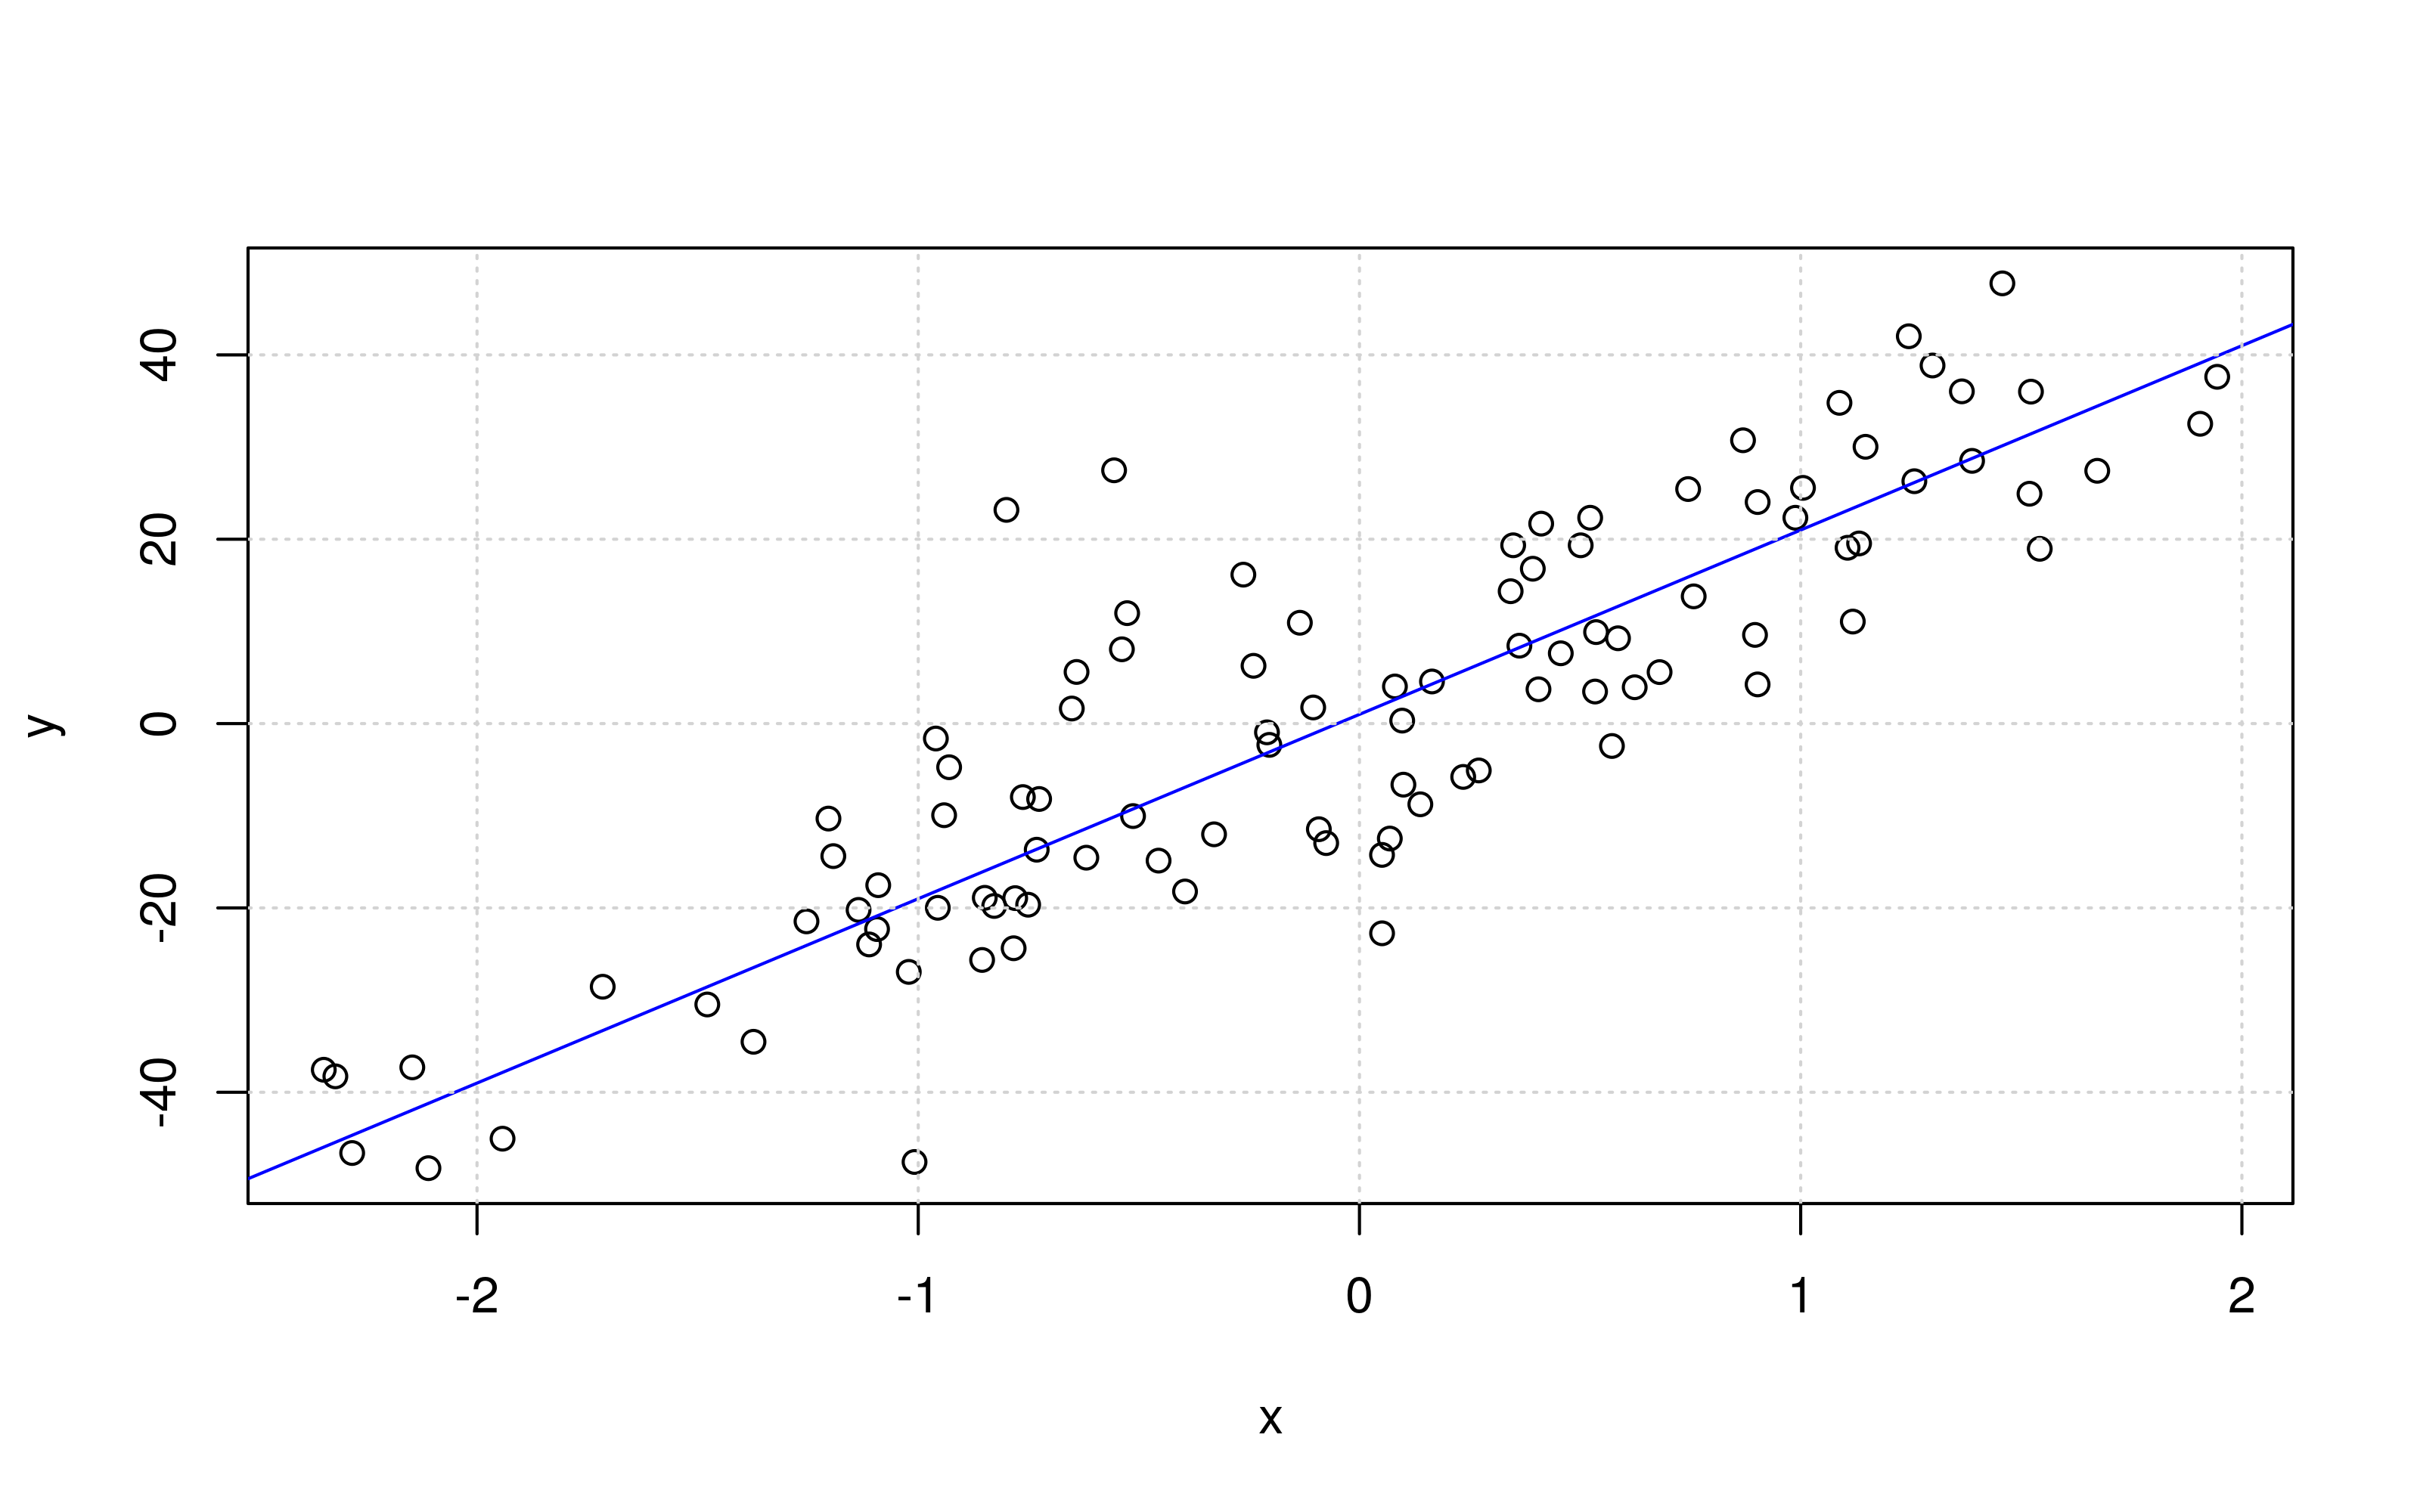

In [30]:
options(repr.plot.height=5,repr.plot.width=8 , repr.plot.res = 400)

n<-100
x<-rnorm(n,sd=1)
y<- 1+20*x+rnorm(n,mean=1,sd=10)

plot(x,y)
abline(c(1,20),col="blue")
grid()


Esto significa que se puede expandir de la forma:
\\[
\begin{split}
y_1 &=\beta_0+\beta_1 x_1+\varepsilon_1  \\
y_2 &=\beta_0+\beta_1 x_2+\varepsilon_2  \\
\vdots& \\
y_n&=\beta_0+\beta_1 x_n+\varepsilon_n 
\end{split}
\\]


donde:
* $y_i$: i-esimo valor de la variable dependiente
* $x_i$: i-esimo valor de la variable independiente
* $\beta_0, \beta_1$: parámetros a determinal que dado un conjunto de $x_i$ produce los mejores $y_i$
 * $\beta_0$ : Puede ser llamado sesgo, bias, intercept o término constante. Indica el corte en el eje Y
 * $\beta_1$ : Puede ser llamado pendiente, slope. Indica cuanto aumenta Y por cada incremento de X
* $\varepsilon_i$: error, valor aleatorio.

Podemos escribirlo en forma de matriz:
\\[
\begin{bmatrix}
 y_1 \\ 
 y_2 \\ 
 \vdots \\ 
 y_n 
\end{bmatrix}
=
\begin{bmatrix}
 1 & x_1\\ 
 1 & x_2 \\ 
 \vdots & \vdots \\ 
 1 & x_n 
\end{bmatrix}
\begin{bmatrix}
\beta_0
\\ 
\beta_1
\end{bmatrix}+
\begin{bmatrix}
 \varepsilon_1 \\ 
 \varepsilon_2 \\ 
 \vdots \\ 
 \varepsilon_n
\end{bmatrix}
\\]
Lo que se puede simplificar como:
\\[
Y=X \beta+\varepsilon
\\]




Donde:
* $Y \in \mathbb{R}^{n \times 1}$ 
* $X \in \mathbb{R}^{n \times 2}$ 
* $\beta \in \mathbb{R}^{1 \times 2}$ 
* $\varepsilon \in \mathbb{R}^{n \times 1}$ 




In [31]:
n<-10
beta<-matrix(c(5,2),nrow = 2)
X<-matrix(c(rep(1,n),1:n),ncol = 2, byrow = F)

print("El valor de la matriz X es:")
X
print("El valor de la Beta es:")
beta

[1] "El valor de la matriz X es:"


1,1
1,2
1,3
1,4
1,5
1,6
1,7
1,8
1,9
1,10


[1] "El valor de la Beta es:"


5
2


In [32]:
print("El valor de la matriz X·Beta es:")
X %*% beta

[1] "El valor de la matriz X·Beta es:"


7
9
11
13
15
17
19
21
23
25


In [33]:
print("El valor final de la matriz Y es:")
e<-rnorm(n)
Y<-X %*% beta +e
Y

[1] "El valor final de la matriz Y es:"


7.04399
9.24850
10.66040
12.95190
14.83163
16.53040
17.65611
21.67046
22.10688
24.66748


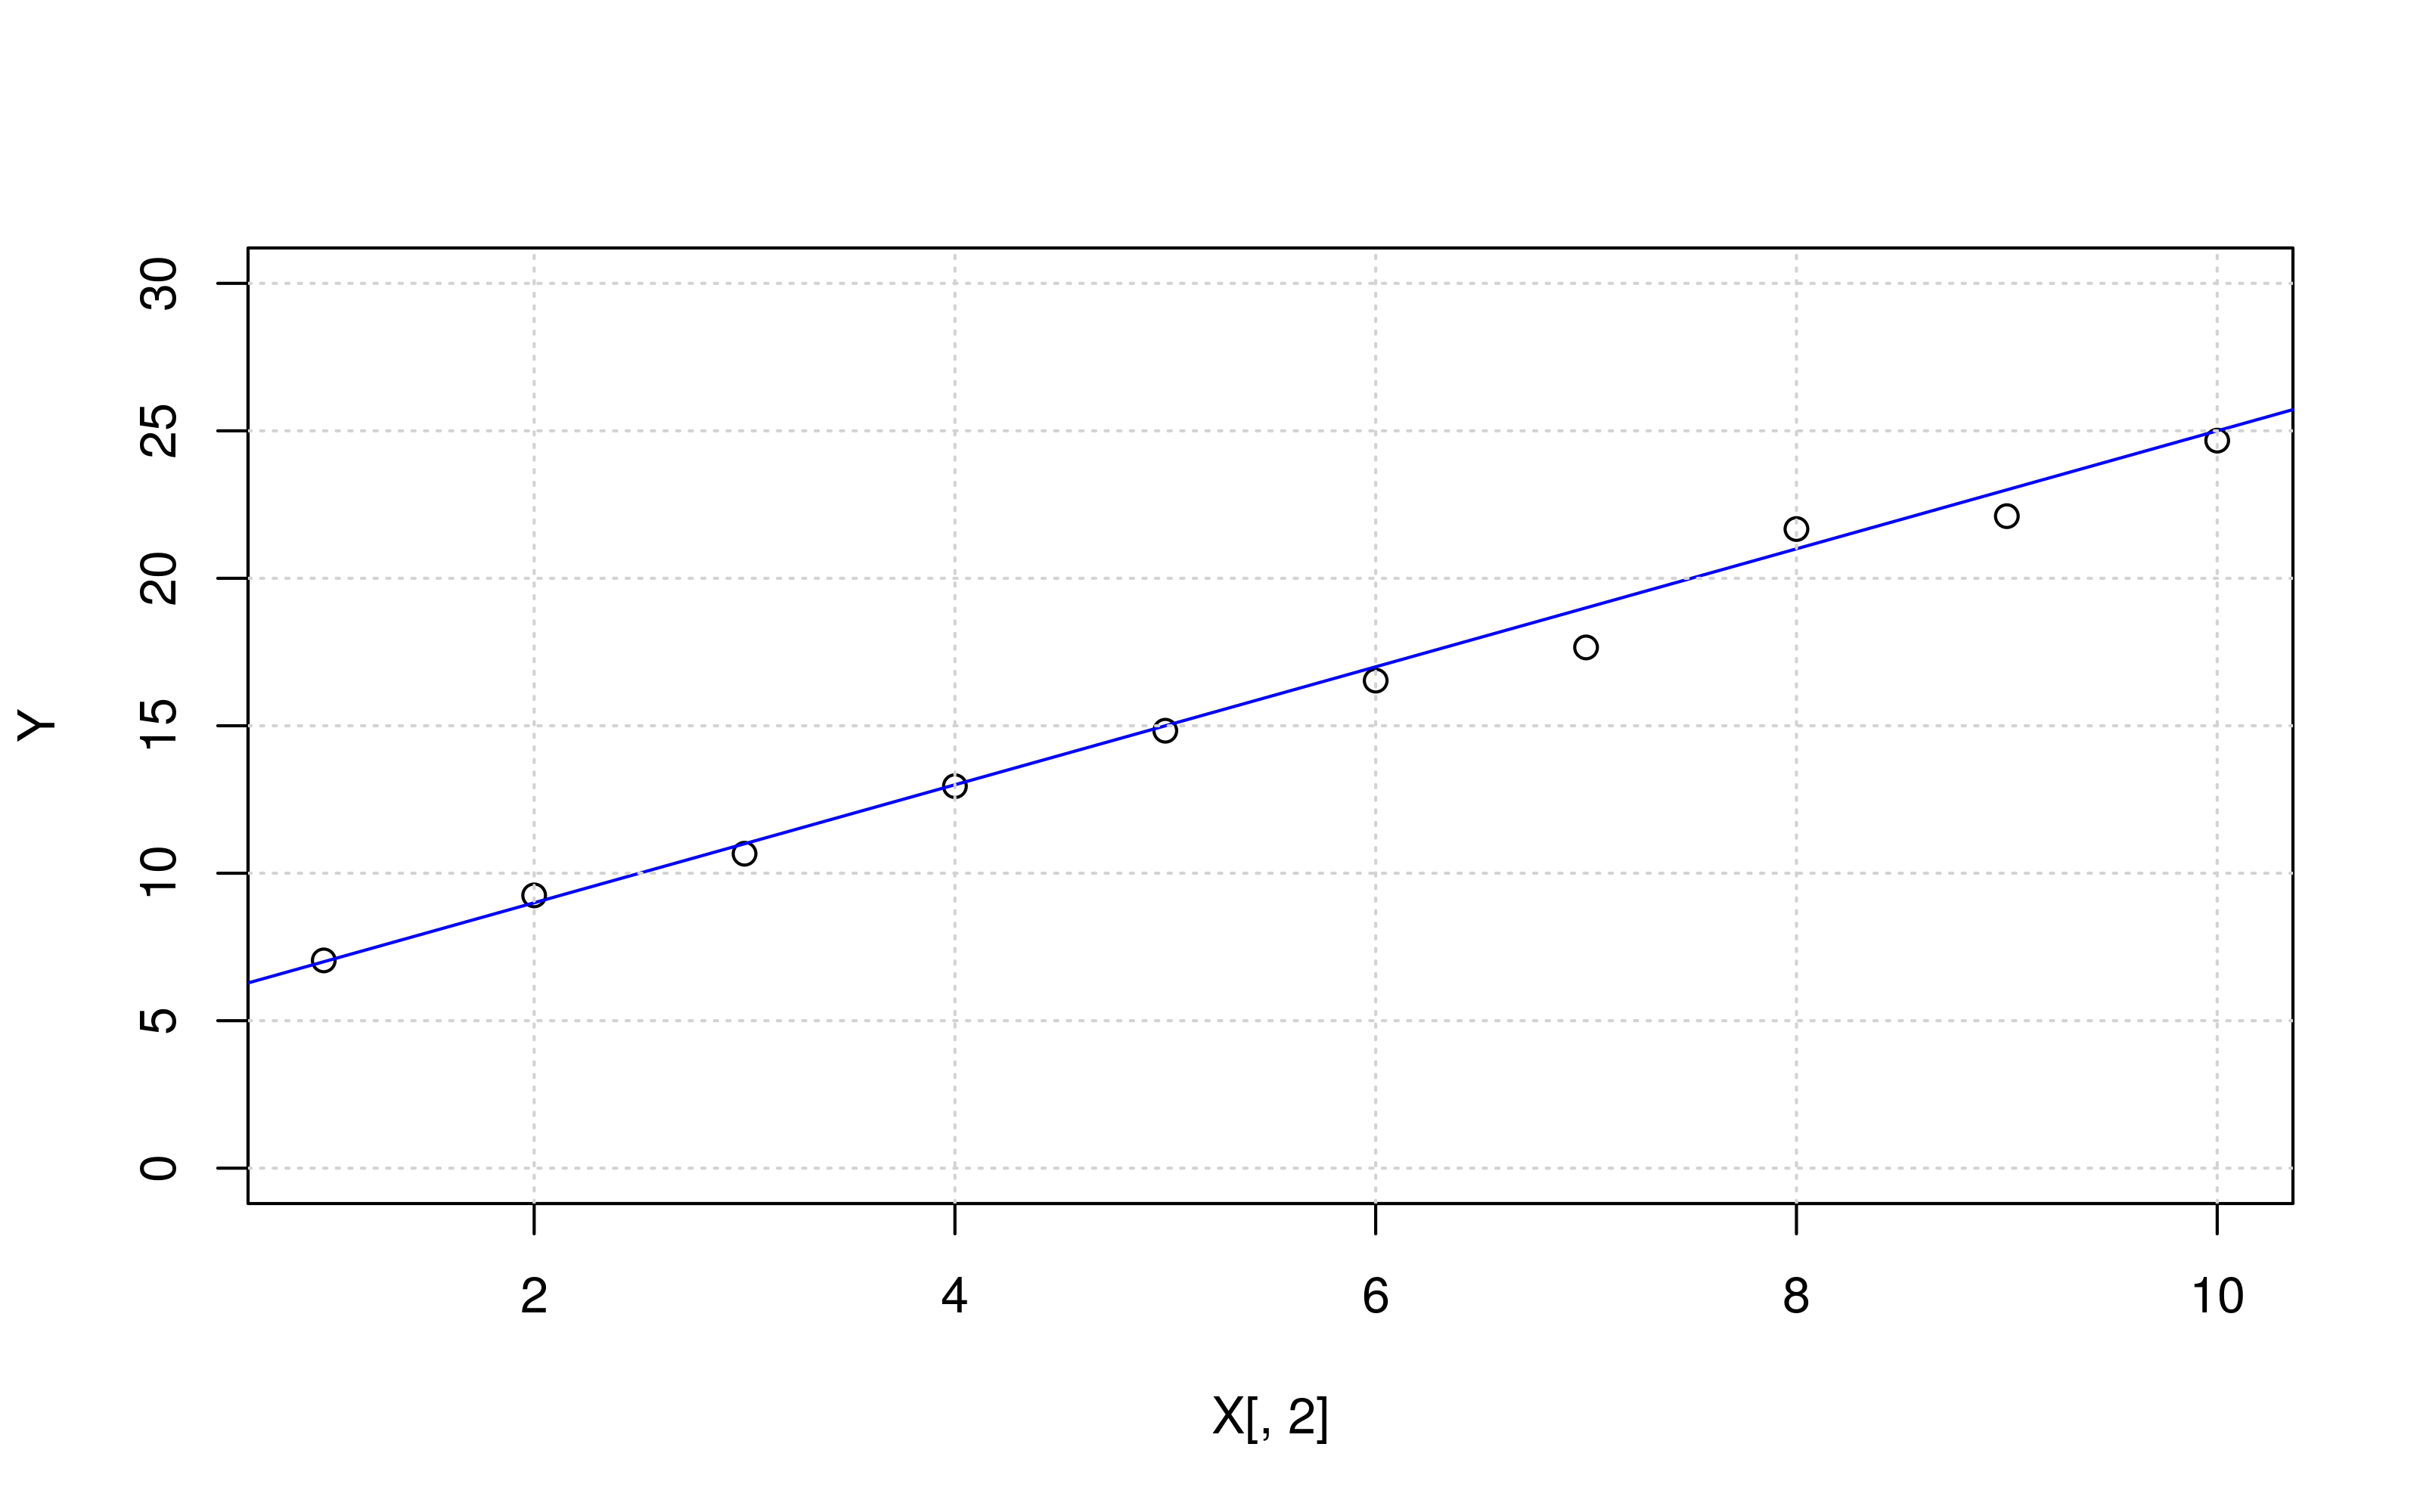

In [34]:
plot(X[,2],Y,ylim = c(0,30))
abline(beta,col="blue")
grid()

## ¿Cómo calculamos $\beta$?

### Definición de inversa de una matriz

La inversa de una matriz una matriz cuadrada $A$ se escribe $A^-1$ y se define como:
\\[
A^{-1} \cdot A=I=A \cdot A^{-1}
\\]

Donde I es la matriz identidad:
\\[
\begin{bmatrix}
1 & 0 & \dots & 0\\ 
0 & 1 & \dots & 0 \\ 
\vdots &  & \ddots &  \vdots \\ 
0 & 0  & \dots & 1
\end{bmatrix}
\\]



In [35]:
A<-matrix(c(1,3,5,2,3,4,1,7,8),nrow=3)
print("Tenemos una matriz A:")
A

[1] "Tenemos una matriz A:"


1,2,1
3,3,7
5,4,8


In [36]:
print("La inversa de A es:")
iA<-solve(A)
iA

[1] "La inversa de A es:"


-0.2666667,-0.8,0.7333333
0.7333333,0.2,-0.2666667
-0.2000000,0.4,-0.2000000


In [37]:
print("Si multiplicamos una matriz por su inversa obtenemos una matriz identidad")
iA %*% A

[1] "Si multiplicamos una matriz por su inversa obtenemos una matriz identidad"


1.000000e+00,0,-8.881784e-16
-1.665335e-16,1,0.000000e+00
-1.665335e-16,0,1.000000e+00


Podemos usar la matriz inversa para resolver ecuaciones:
\\[
\begin{split}
u&=Av \\
A^{-1}u&=A^{-1}Av \\
A^{-1}u&=Iv \\
A^{-1}u&=v \\
\end{split}
\\]



In [38]:
print("Calculamos el vector u como resultado de multiplicar A·v")
v <- c(1,2,3)
u <- A %*% v
u

[1] "Calculamos el vector u como resultado de multiplicar A·v"


8
30
37


In [39]:
print("Comprobamos que multiplicando u por la inversa de A obtenemos v de vuelta:")
iA %*% u

[1] "Comprobamos que multiplicando u por la inversa de A obtenemos v de vuelta:"


1
2
3


### Pseudoinversa Moore-Penrose

¿Qué ocurre si la matriz que queremos invertir no es cuadrada? Entonces el sistema de ecuaciones no tiene una única solución o simplemente no tiene solución.

Lo que tratamos de encontrar es la menos mala de las soluciones.

Para números reales se define como:
\\[
X^+ = \left( X^{\intercal} X  \right)^{-1} X^{\intercal}
\\]
Cuando:
\\[
X^+X = I
\\]



El problema original consistía en querer calcular $\beta$ de tal forma que se minimice la influencia de $\varepsilon$:
\\[
Y=X \beta+\varepsilon
\\]
En nuestro sistema $\varepsilon$ es desconocido, pero sabemos que tiene media cero y varianza finita. Así que  simplificamos el siguiente sistema de ecuaciones:

\\[
\begin{split}
Y=&X \beta' \\
X^+Y=& X^+X \beta' \\
X^+Y=& \beta' \\
\left( X^{\intercal}X  \right)^{-1} X^{\intercal} Y =& \beta'
\end{split}
\\]

Ahora tenemos, a partir de $X$ e $Y$ una estimación $\beta'$. Podemos entonces, a partir de valores conocidos de $X$ calcular una estimación de $Y'$. 
\\[
Y'=X \beta'
\\]

Evidentemente $Y \neq Y'$, llamaremos **residuo**(error) a la diferencia entre el valor real y el valor estimado : $\varepsilon' = Y-Y'$. 

El método anterior garantiza que el error cuadrático medio sea mínimo.
\\[
{1 \over n} \sum_{i=0}^n{(Y-Y')^2}
\\]

In [40]:
print("El valor estimado de beta")
est_beta <- solve(t(X) %*% X) %*% t(X) %*% Y
est_beta

[1] "El valor estimado de beta"


5.087383
1.936253


In [41]:
X

1,1
1,2
1,3
1,4
1,5
1,6
1,7
1,8
1,9
1,10


0.02035359,0.2886109,-0.2357444,0.1195094,0.06297684,-0.1744988,-0.9850414,1.093048,-0.4067762,0.2175621


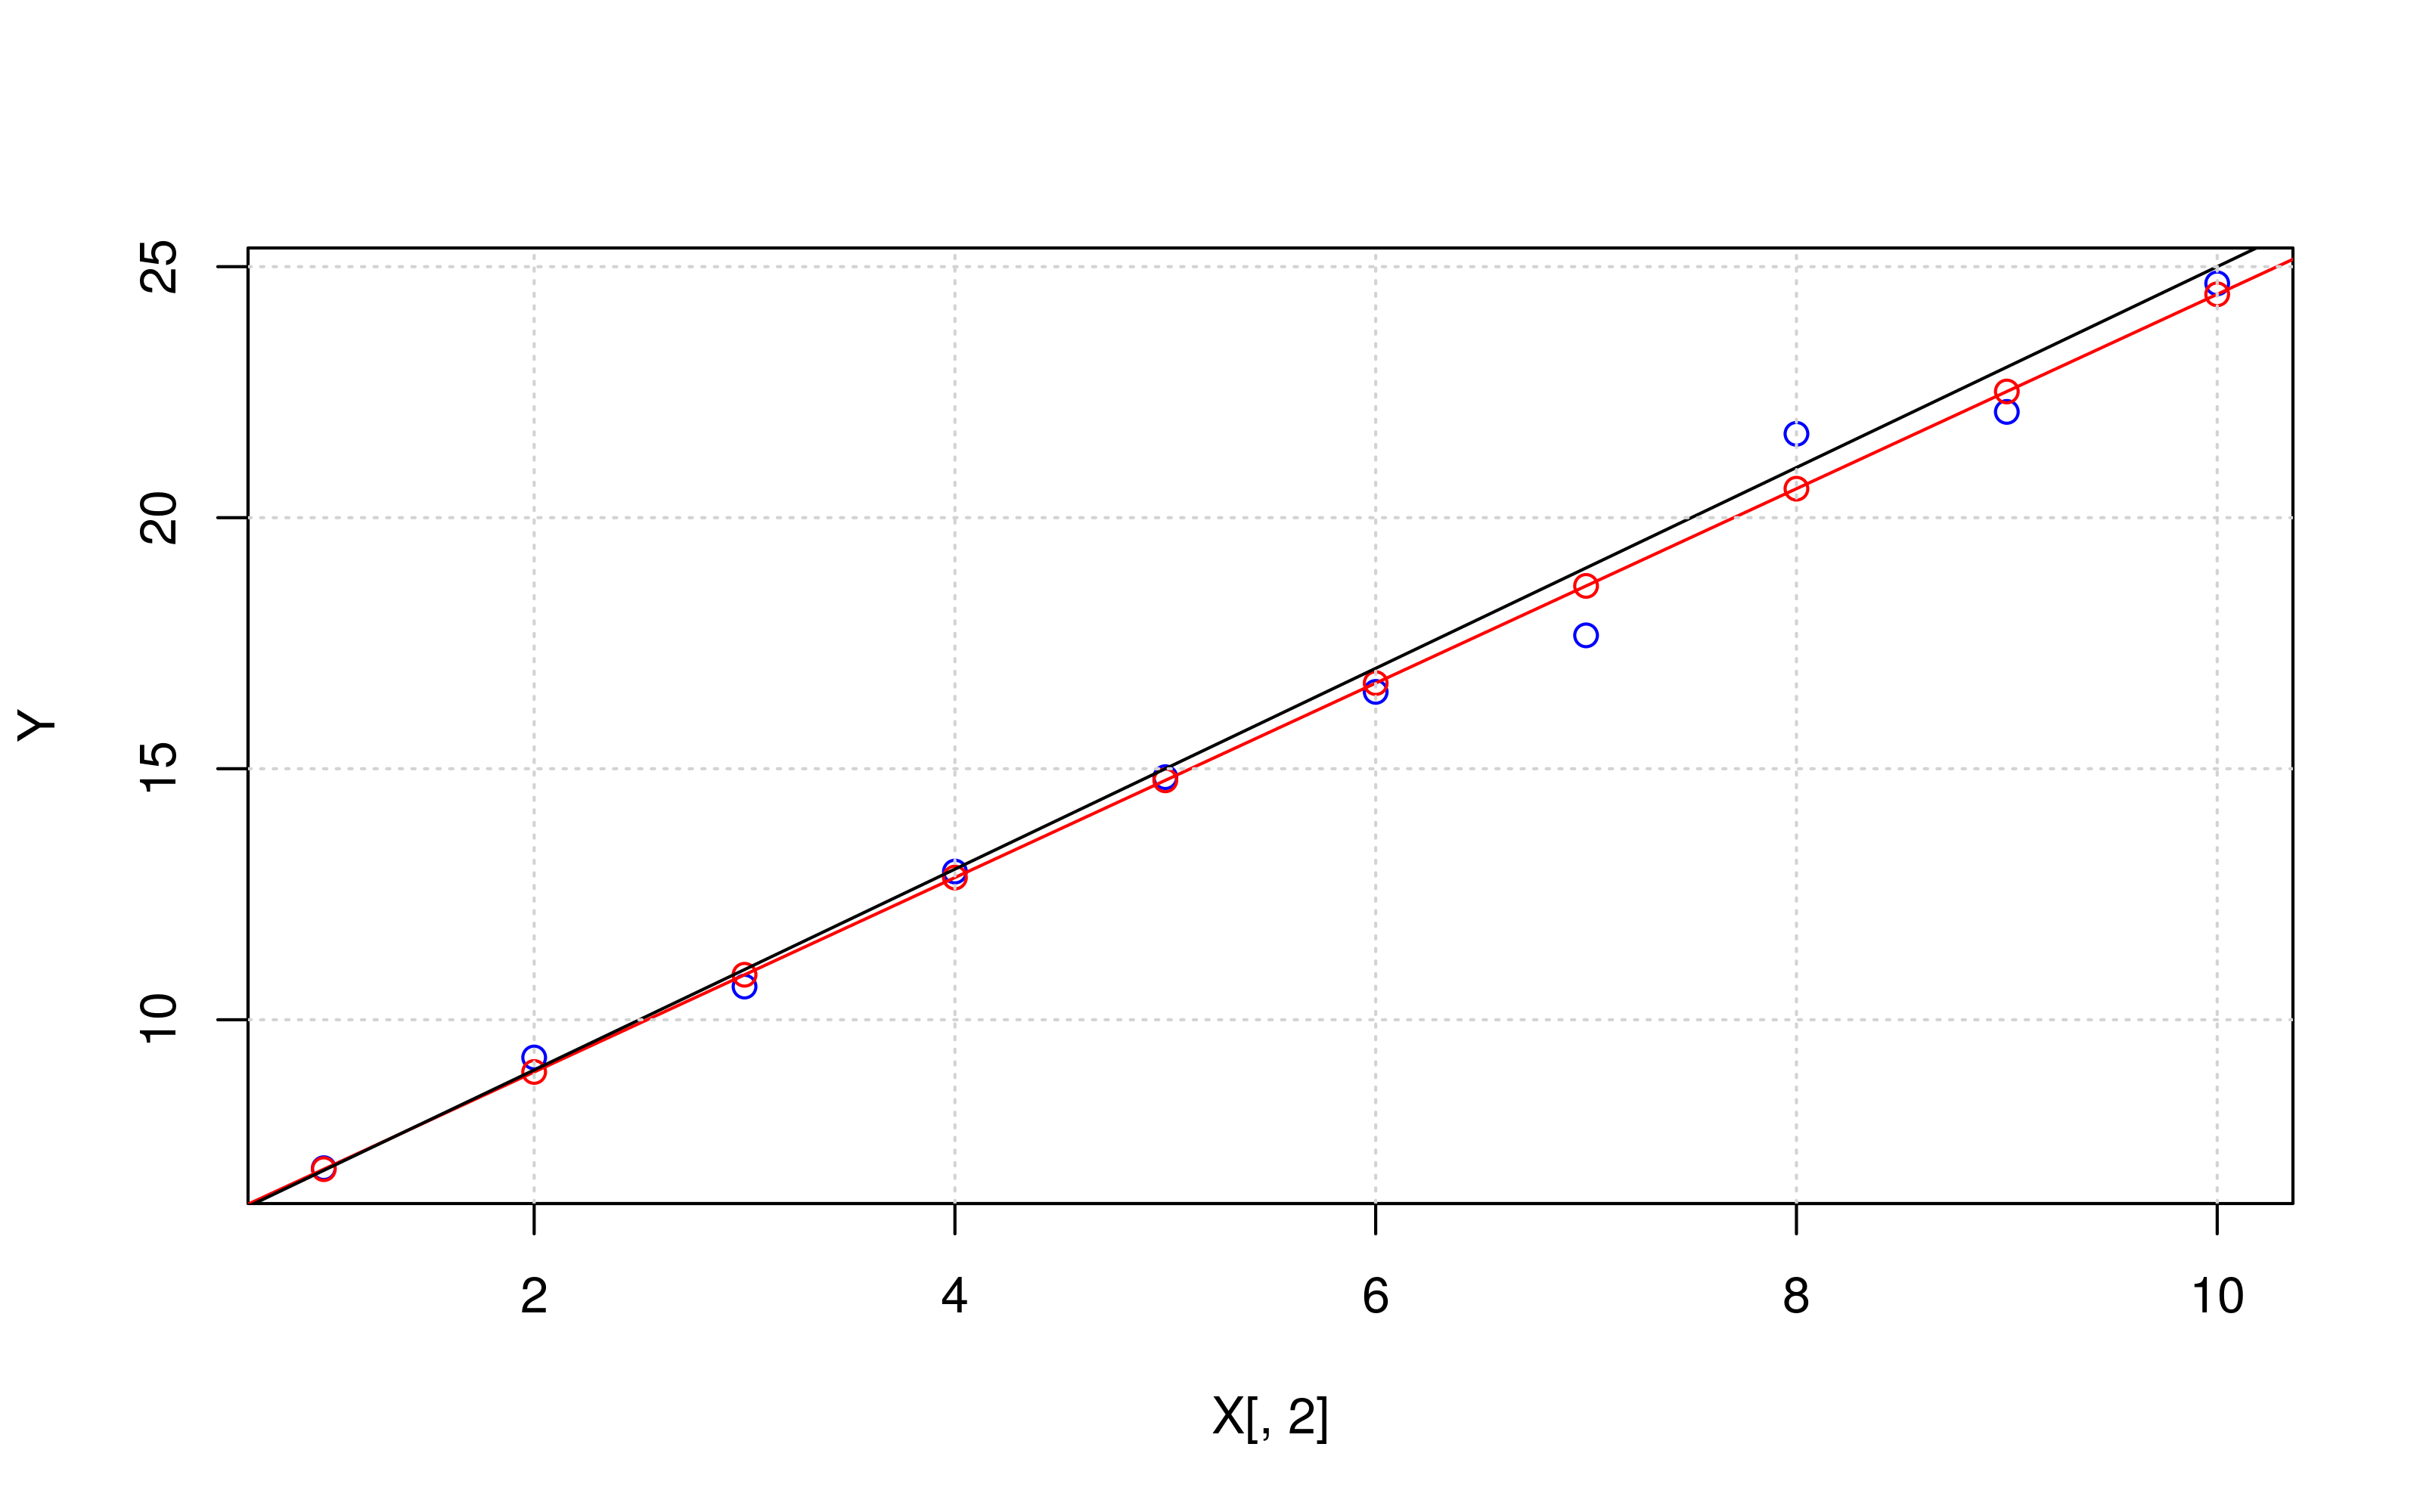

In [42]:
est_Y <- X %*% est_beta
plot(X[,2],Y,col="blue")
points(X[,2],est_Y,col="red")
abline(est_beta,col="red")
abline(c(5,2),col="black")


legend(1,30,legend=c("Y","Y'"),col=c("blue","red"),pch=1)
grid()
t(Y-est_Y)

In [43]:
paste("El error cuadrático medio es:",mean((Y-est_Y)^2))

[1] "El error cuadrático medio es: 0.256584470594582"

### Método en R

En R existe la función lm (linear model) que se utiliza para calcular la dependencia entre variables

In [44]:
n<-10
beta<-matrix(c(5,2),nrow = 2)
e<-rnorm(n,sd=1)
X<-matrix(c(rep(1,n),1:n),ncol = 2, byrow = F)
Y<-X %*% beta +e

In [45]:
datos <- data.frame(Y=Y,X=X[,2])
head(datos)

,Y,X
,<dbl>,<dbl>
1,5.798618,1
2,9.272167,2
3,10.323164,3
4,11.715000,4
5,16.339766,5
6,16.698367,6


In [46]:
model <- lm(data=datos, formula= Y ~ X)
summary(model)


Call:
lm(formula = Y ~ X, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1537 -0.6417 -0.4332  0.9025  1.3244 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.2670     0.7044   6.058 0.000303 ***
X             2.1504     0.1135  18.942 6.24e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.031 on 8 degrees of freedom
Multiple R-squared:  0.9782,	Adjusted R-squared:  0.9755 
F-statistic: 358.8 on 1 and 8 DF,  p-value: 6.242e-08


In [47]:
model$coefficients

(Intercept)           X 
   4.267032    2.150424

In [58]:
datos$pred <- predict(model, datos)

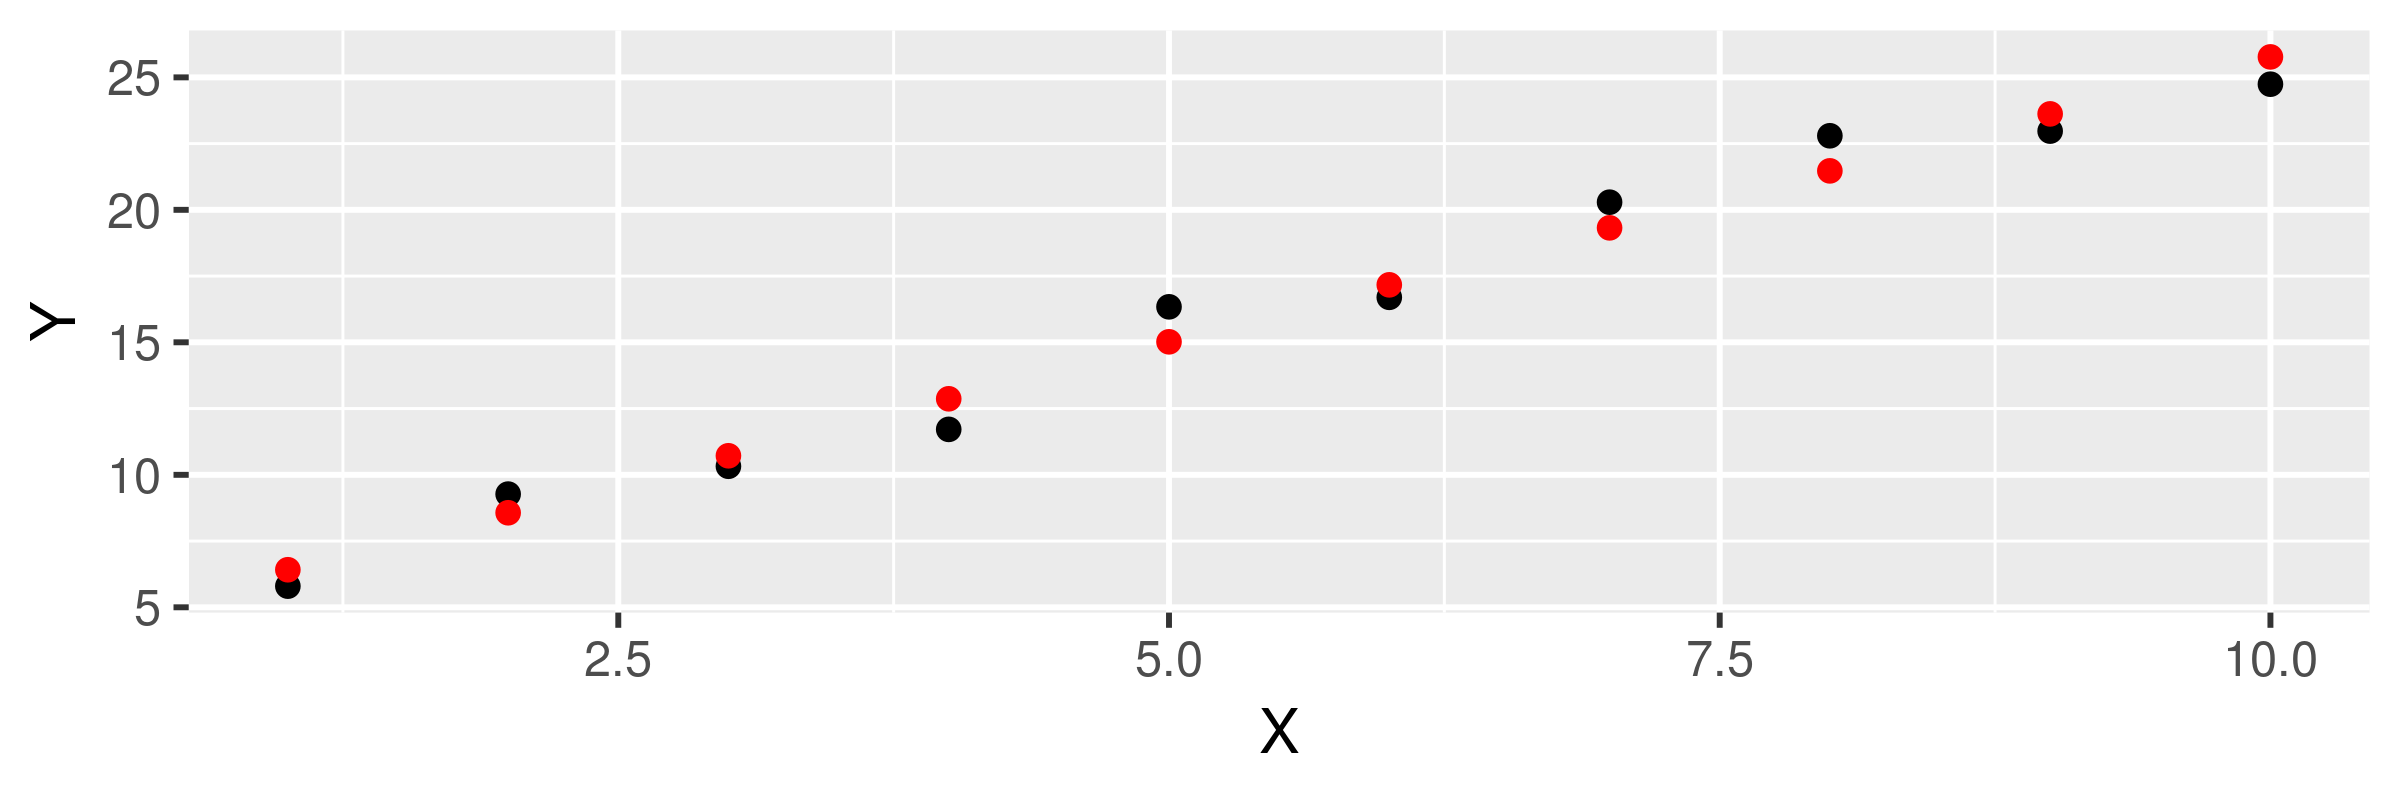

In [60]:
# y = 4.26+2.15*x
library(ggplot2)
ggplot(datos, aes(x=X, y=Y))+
 geom_point()+
 #geom_abline(intercept = model$coefficients[1], slope = model$coefficients[2], color='blue')+
 geom_point(aes(y=pred), color='red')

## Fiabilidad de los coeficientes

Suponiendo que los residuos siguen una distribución gaussiana, se puede calcular la varianza de cada uno de los coeficientes como:
\\[
Var [ \beta' | X ] = s^2 (X^TX)^{-1} = \frac{\varepsilon^2}{n-p} ·  (X^TX)^{-1} = \frac{\sum(Y_i-Y')^2}{n-p} ·  (\sum(X_i-\overline{X}) )^{-1}
\\]

Donde:
* p es el número de grados de liberdad, de coeficientes, en este caso son 2: Intersección y la pendiente.
* n es el número de muestras

La media de los coeficientes vienen dados por el vector $\beta'$. Con la media y la varianza podemos calcular la probabilidad de que el valor de la media estimado esté muy desviado de 0 por puro azar. Eso aparece con el valor Pr(>|t|) en el summary del modelo. Cuanto menos sea este valor más fiable será. Más adelante veremos que significa esta probabilidad en detalle, llamada p-valor.


In [52]:
vcov_matrix<-as.numeric(t(model$residuals)%*%model$residuals/(length(model$residuals)-2))*solve(t(X)%*%X)
# vcov_matrix <- vcov(model)
# 1/sum((X[,2]-colMeans(X)[2])^2) == solve(t(X)%*%X)[2,2]

paste("p-valor para intersección:",(1-pt(model$coefficients[1]/sqrt(diag(vcov_matrix))[1],8))*2)
paste("p-valor para pendiente:",(1-pt(model$coefficients[2]/sqrt(diag(vcov_matrix))[2],8))*2)

[1] "p-valor para intersección: 0.000303366840147312"

[1] "p-valor para pendiente: 6.24210001465286e-08"

In [53]:
vcov_matrix

0.49620114,-0.07088588
-0.07088588,0.01288834


Podemos calcular el margen de error para la intersección conociendo su desviación típica y que sigue una distribución t-student.

Porque para un intervalo de confianza del 95% la formula de los márgenes superior e inferor es:

\\[
inf_{0.95}=Qt(0.975)·\sigma + \bar x \\
sup_{0.95}=Qt(0.025)·\sigma + \bar x
\\]

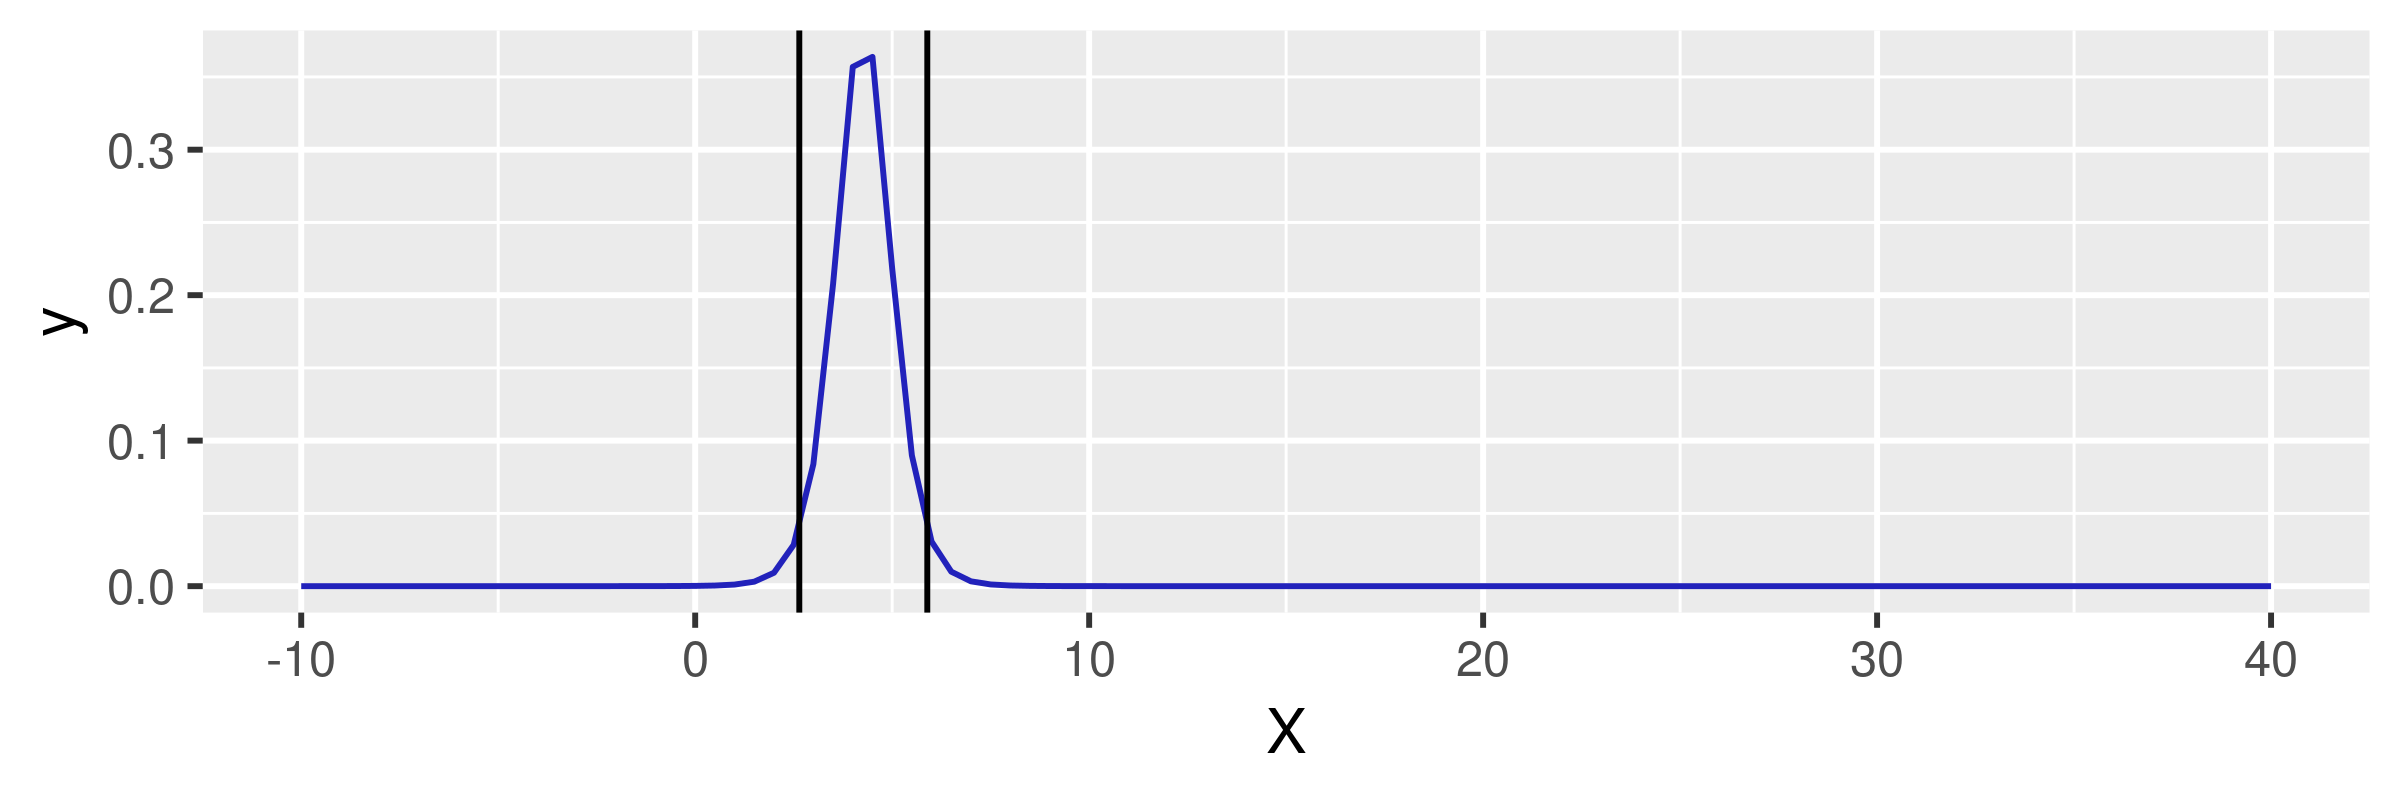

In [54]:
library(ggplot2)
options(repr.plot.height=2,repr.plot.width=6)

mydt<-function(x,df,mn,sd){
    dt((x-mn)/sd,df)
}
df<-n-2

ggplot(data=datos, aes(x=X)) +     
    stat_function(fun=mydt,args = list(df = df,mn=model$coefficients[1],sd=sqrt(diag(vcov_matrix))[1]),color="#2222BB")+
    geom_vline(xintercept=qt(0.975,df,lower.tail = F)*sqrt(diag(vcov_matrix))[1]+model$coefficients[1])+
    geom_vline(xintercept=qt(0.025,df,lower.tail = F)*sqrt(diag(vcov_matrix))[1]+model$coefficients[1])+
    xlim(-10,40)

Con R podemos calcular esto automáticamente mediante el comando *confint*:

In [56]:
cnf_int<-confint(model)
cnf_int
model$coefficients

,2.5 %,97.5 %
(Intercept),2.642647,5.891417
X,1.888630,2.412217


(Intercept)           X 
   4.267032    2.150424

**Opción interval = 'confidence':**

Un **intervalo de confianza** de la predicción es un rango que probablemente contiene el **valor medio de la variable dependiente** dados los valores específicos de las variables independientes. Estos intervalos proporcionan un rango para el promedio de la población. Estos rangos no dicen nada sobre la distribución de los puntos de datos individuales alrededor de la media de la población.

**Opción interval = 'prediction':**

Un **intervalo de predicción** es un rango que probablemente contiene el **valor de la variable dependiente** para una sola observación nueva dados los valores específicos de las variables independientes. Con este tipo de intervalo, estamos prediciendo rangos para observaciones individuales en lugar del valor medio.

In [61]:
pred_conf<-predict(model,datos,interval = 'confidence')
head(pred_conf)
pred<-predict(model,datos,interval = 'prediction')
head(pred)

,fit,lwr,upr
1,6.417456,5.019862,7.815050
2,8.567879,7.382560,9.753199
3,10.718303,9.721424,11.715182
4,12.868727,12.020419,13.717034
5,15.019150,14.255898,15.782402
6,17.169574,16.406322,17.932826


,fit,lwr,upr
1,6.417456,3.659292,9.17562
2,8.567879,5.910967,11.22479
3,10.718303,8.139938,13.29667
4,12.868727,10.344083,15.39337
5,15.019150,12.521801,17.51650
6,17.169574,14.672224,19.66692


In [ ]:
options(repr.plot.height=4,repr.plot.width=6)

est_Y <- X %*% model$coefficients
plot(X[,2],Y,col="blue")
#points(X[,2],est_Y,col="red")
#lines(X[,2],pred[,"fit"],col="red")
#lines(X[,2],pred_conf[,"lwr"],col="black")
#lines(X[,2],pred_conf[,"upr"],col="black")
#lines(X[,2],pred[,"lwr"],col="gray")
#lines(X[,2],pred[,"upr"],col="gray")


#abline(c(5,2),col="green")

## Coeficiente de determinación $R^2$


Proporciona una medida de como de bien nuestra medida sigue al modelo. Se calcula mediante:

\\[
R^2=1-\frac{SS_{res}}{SS_{tot}}=1-\frac{MSE(y,y')}{VAR(y)}
\\]

Donde $SS_{res}$ es la suma del cuadrado de los residuos:
\\[
SS_{res}=\sum_i (y_i-y_i')^2
\\]

y $SS_{tot}$ es proporcional a la varianza de $Y$:

\\[
SS_{tot}=\sum_i (y_i-\bar{y})^2
\\]

Cuanto más cercano a $1$ mejor seguirá la predicción a los datos reales.

Responde a la pregunta, ¿como de mejor es mi modelo respecto a uno que siempre devuelva el valor medio?

In [62]:
Rsq <- 1-(sum((Y-est_Y)^2))/(sum((Y-mean(Y))^2))
print(paste("El coeficiente de determinación es:",Rsq))

[1] "El coeficiente de determinación es: 0.965208373664587"


In [63]:
summary(model)


Call:
lm(formula = Y ~ X, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1537 -0.6417 -0.4332  0.9025  1.3244 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.2670     0.7044   6.058 0.000303 ***
X             2.1504     0.1135  18.942 6.24e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.031 on 8 degrees of freedom
Multiple R-squared:  0.9782,	Adjusted R-squared:  0.9755 
F-statistic: 358.8 on 1 and 8 DF,  p-value: 6.242e-08


Nuevo ejemplo:

In [84]:
n<-40
xn<-rnorm(n,sd=1)
yn<-xn*2 +rnorm(n,mean=0,sd=2)

datos<-data.frame(y=yn,X=xn)
model=lm(datos, formula=y~X+0)
summary(model)


Call:
lm(formula = y ~ X + 0, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3109 -1.1147 -0.0082  1.9466  3.8569 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
X   2.0651     0.3633   5.685 1.42e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.982 on 39 degrees of freedom
Multiple R-squared:  0.4532,	Adjusted R-squared:  0.4391 
F-statistic: 32.32 on 1 and 39 DF,  p-value: 1.418e-06


[1] 0.123217

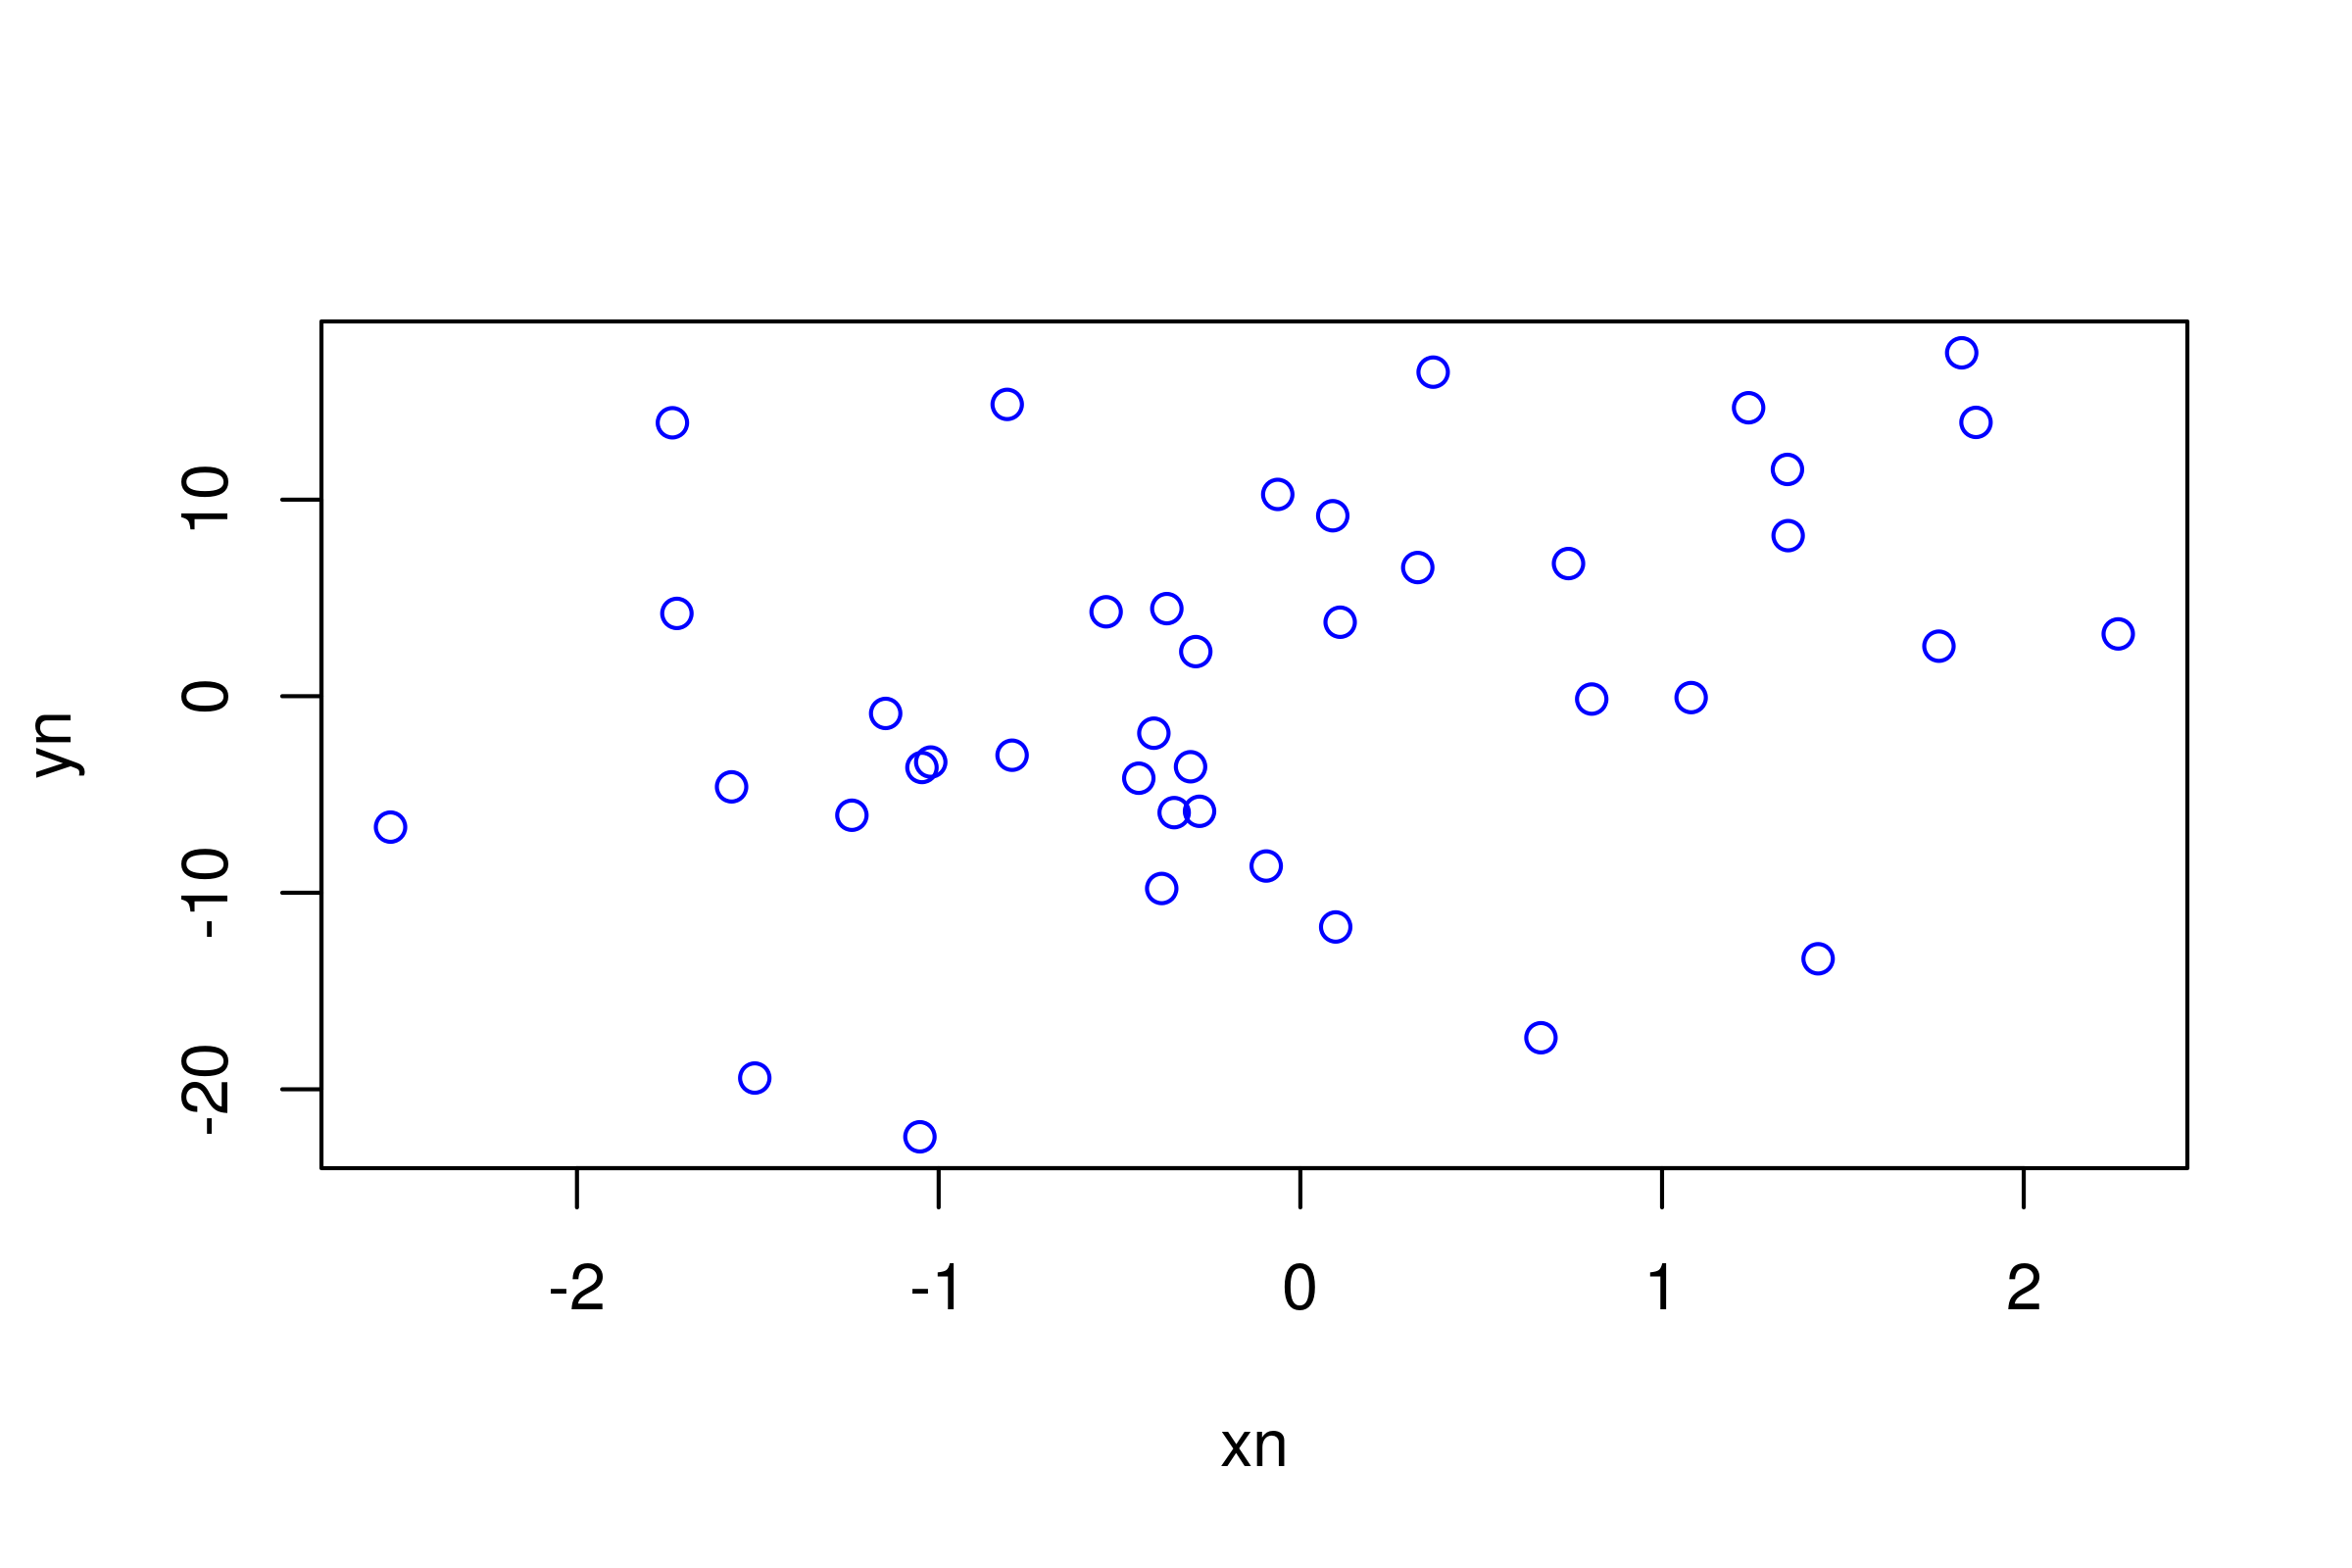

In [69]:
options(repr.plot.height=4,repr.plot.width=6)



plot(xn,yn,col="blue")
#abline(c(0,model$coefficients),col="red")
summary(model)$r.squared

In [85]:
summary(model)


Call:
lm(formula = y ~ X + 0, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3109 -1.1147 -0.0082  1.9466  3.8569 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
X   2.0651     0.3633   5.685 1.42e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.982 on 39 degrees of freedom
Multiple R-squared:  0.4532,	Adjusted R-squared:  0.4391 
F-statistic: 32.32 on 1 and 39 DF,  p-value: 1.418e-06


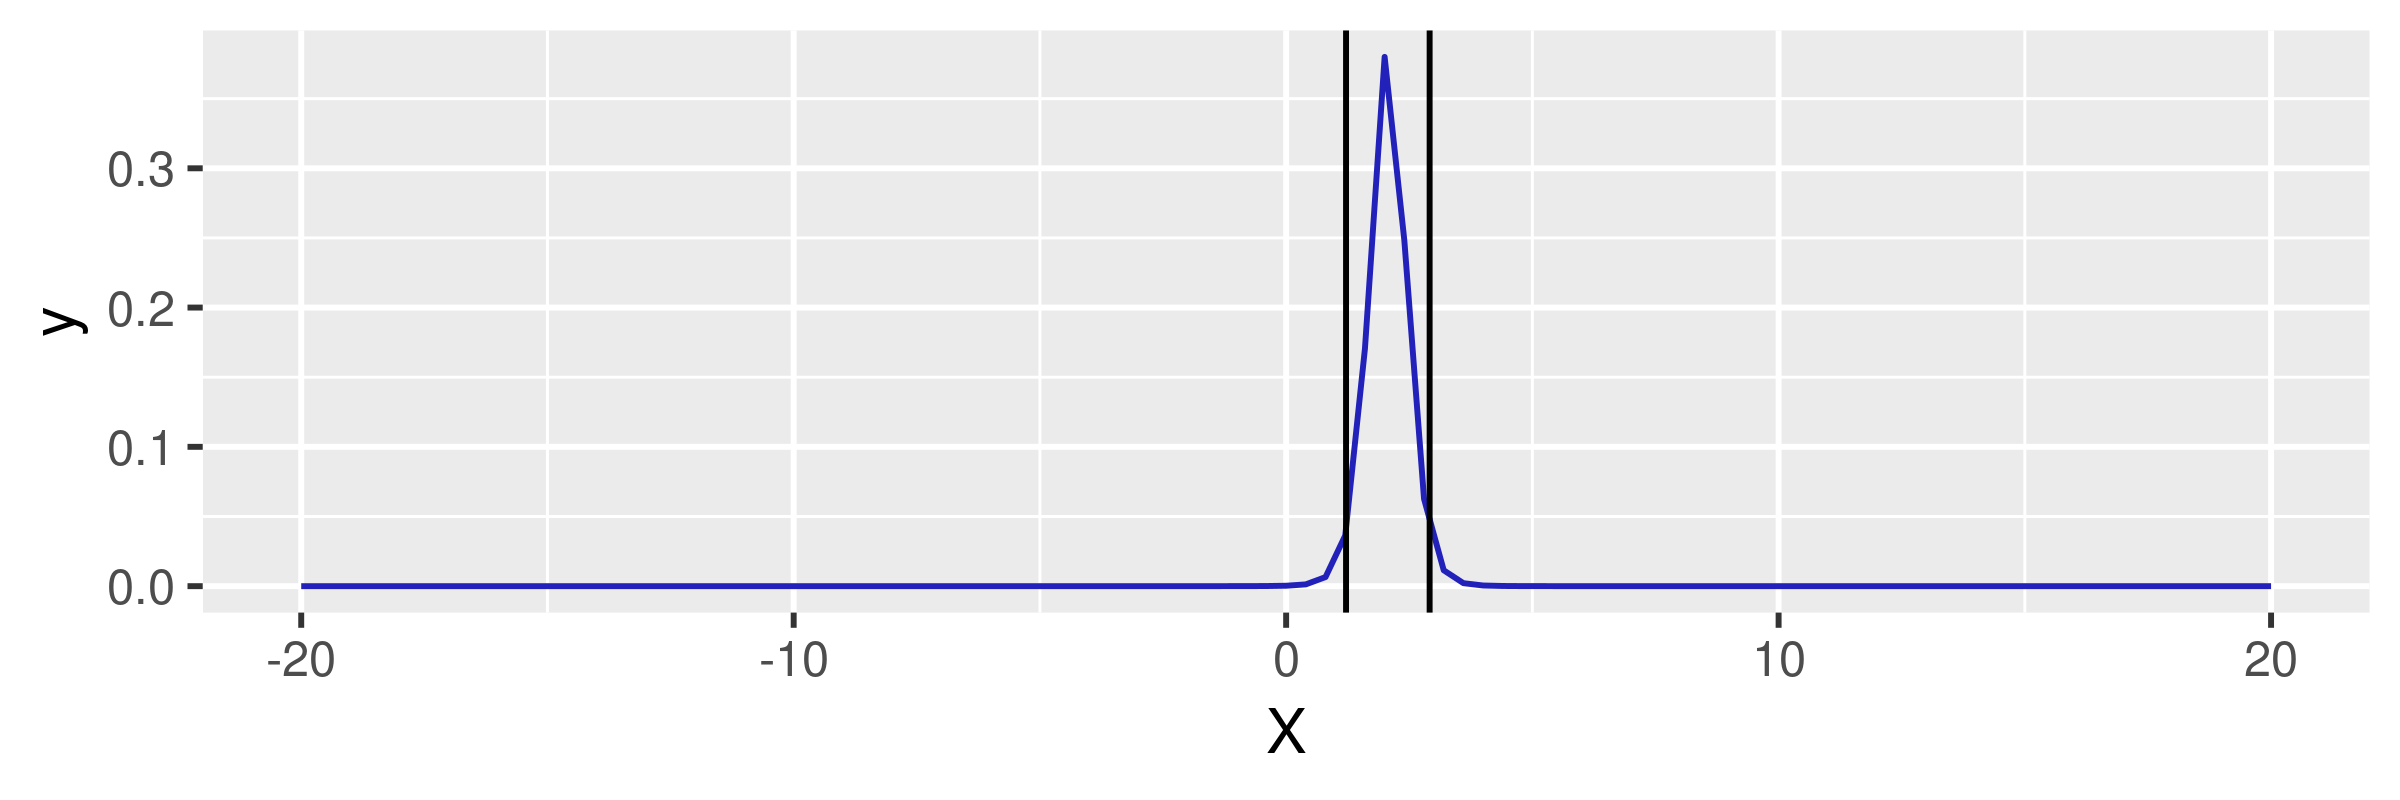

In [86]:
options(repr.plot.height=2,repr.plot.width=6)

vcov_matrix<-as.numeric(t(model$residuals)%*%model$residuals/(length(model$residuals)-2))*solve(t(xn)%*%xn)


ggplot(data=datos, aes(x=X)) +     
    stat_function(fun=mydt,args = list(df = df,mn=model$coefficients[1],sd=sqrt(diag(vcov_matrix))[1]),color="#2222BB")+
    geom_vline(xintercept=qt(0.975,df)*sqrt(diag(vcov_matrix))[1]+model$coefficients[1])+
    geom_vline(xintercept=qt(0.025,df)*sqrt(diag(vcov_matrix))[1]+model$coefficients[1])+
    xlim(-20,20)

In [87]:
cnf_int<-confint(model)
cnf_int

,2.5 %,97.5 %
X,1.330365,2.799869


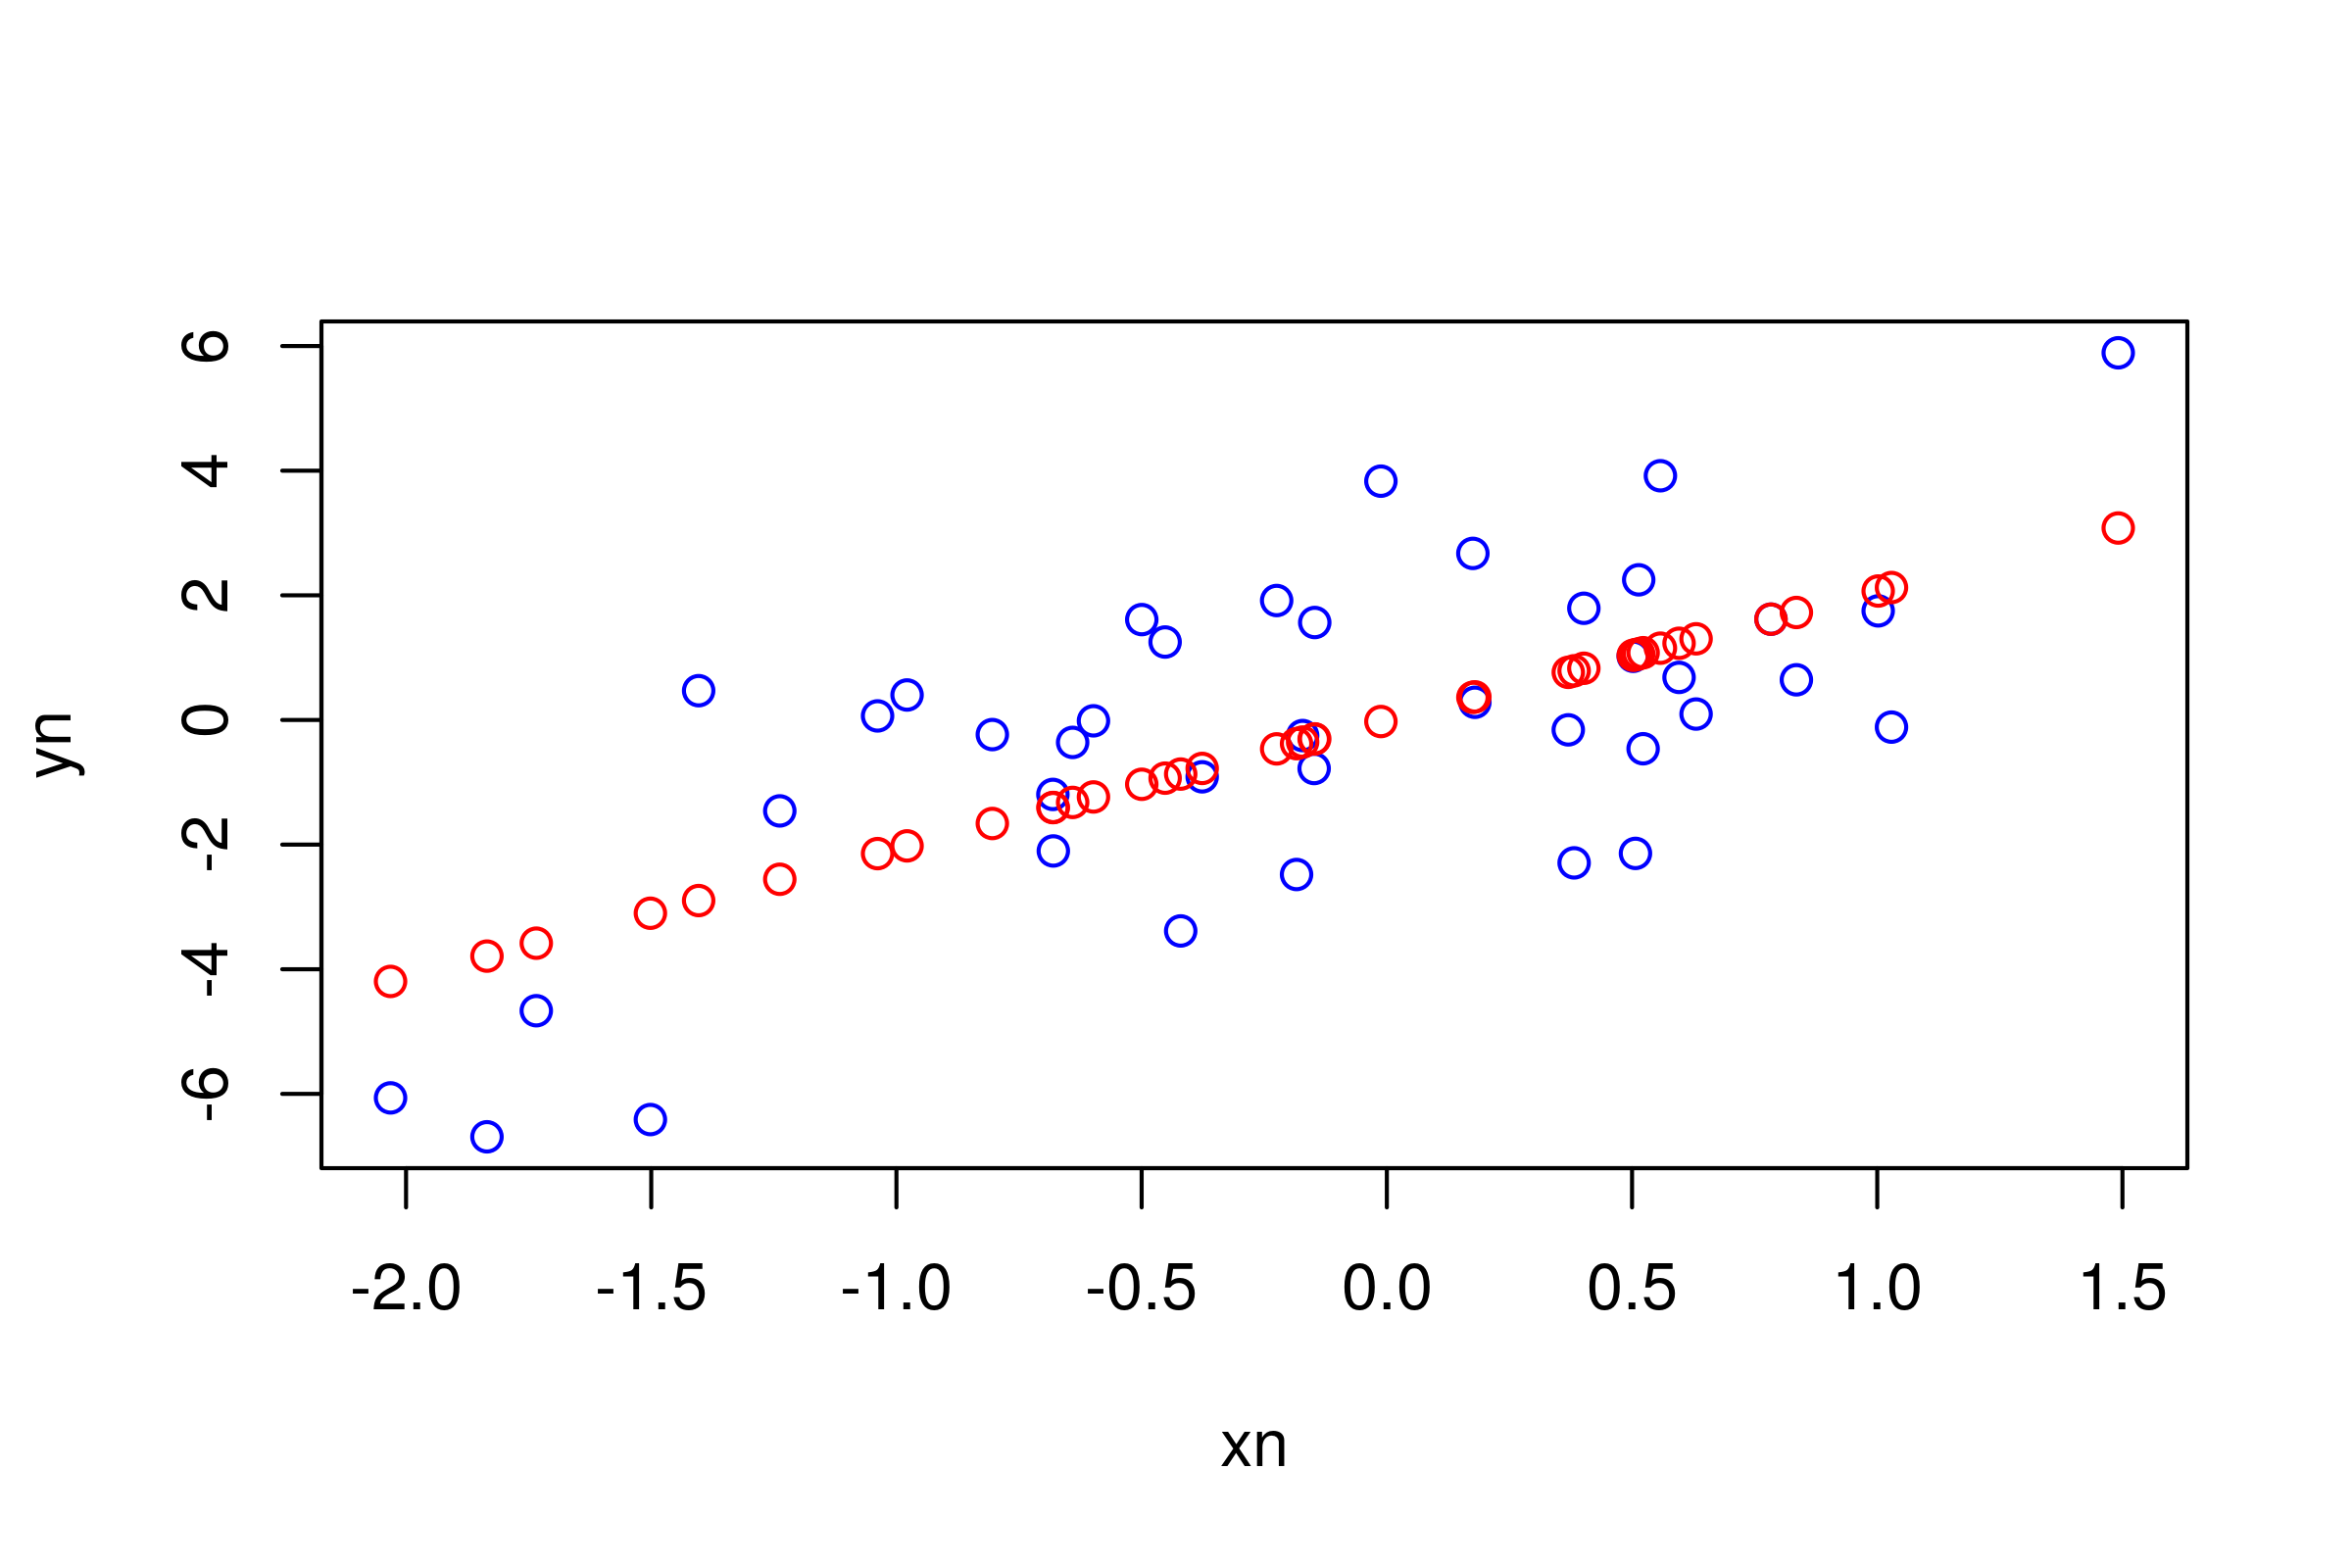

In [88]:
options(repr.plot.height=4,repr.plot.width=6)

datos<-datos[order(datos$X),]
pred<-predict(model,datos,interval="confidence")
est_Y <- pred[,"fit"]
plot(xn,yn,col="blue")
points(datos$X,est_Y,col="red")

#lines(datos$X,pred[,"fit"],col="red")
#lines(datos$X,pred[,"lwr"],col="black")
#lines(datos$X,pred[,"upr"],col="black")
#abline(c(0,cnf_int[2]),col="gray")
#abline(c(0,cnf_int[1]),col="gray")



Relacionado: https://xkcd.com/1725/

### Ejemplo: Evolución de la producción de cereales por hectárea en Italia

El siguiente gráfico muestra como ha evolucionado la producción de cereales por hectarea cultivada en italia desde 1960 hasta 2018.

Alrededor del mundo se observa una tendencia muy parecida a partir de los años 60, nuevas especies híbridas de cereales junto con nuevos fertilizantes químicos y pesticidas, aumentarion la producción agrícola en todo el mundo en lo que se acabó llamando la revolución verde. El padre de este movimiento es considerado Norman Borlaug, premio nobel de la paz en 1970.
![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Norman_Borlaug.jpg/220px-Norman_Borlaug.jpg)




In [92]:
library(ggplot2)
yieldKgIt<-read.csv("data/yieldKgIt.csv")

In [93]:
head(yieldKgIt)

,X,DATE,yieldCereal
,<int>,<int>,<dbl>
1,2,1961,2181.5
2,3,1962,2225.3
3,4,1963,2115.2
4,5,1964,2243.0
5,6,1965,2399.3
6,7,1966,2399.8


In [94]:
model <- lm(data=yieldKgIt, formula=yieldCereal~DATE)
summary(model)


Call:
lm(formula = yieldCereal ~ DATE, data = yieldKgIt)

Residuals:
    Min      1Q  Median      3Q     Max 
-723.70 -114.47  -14.89  136.04  495.01 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.302e+05  3.910e+03  -33.29   <2e-16 ***
DATE         6.750e+01  1.967e+00   34.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 225.3 on 52 degrees of freedom
Multiple R-squared:  0.9577,	Adjusted R-squared:  0.9569 
F-statistic:  1177 on 1 and 52 DF,  p-value: < 2.2e-16


In [ ]:
# kg/ha: yieldCereal = -130200 + 67.5*DATE
# produccion en 2010: yieldCereal = -130200 + 67.5*2010
# produccion en 1960: yieldCereal = -130200 + 67.5*1960

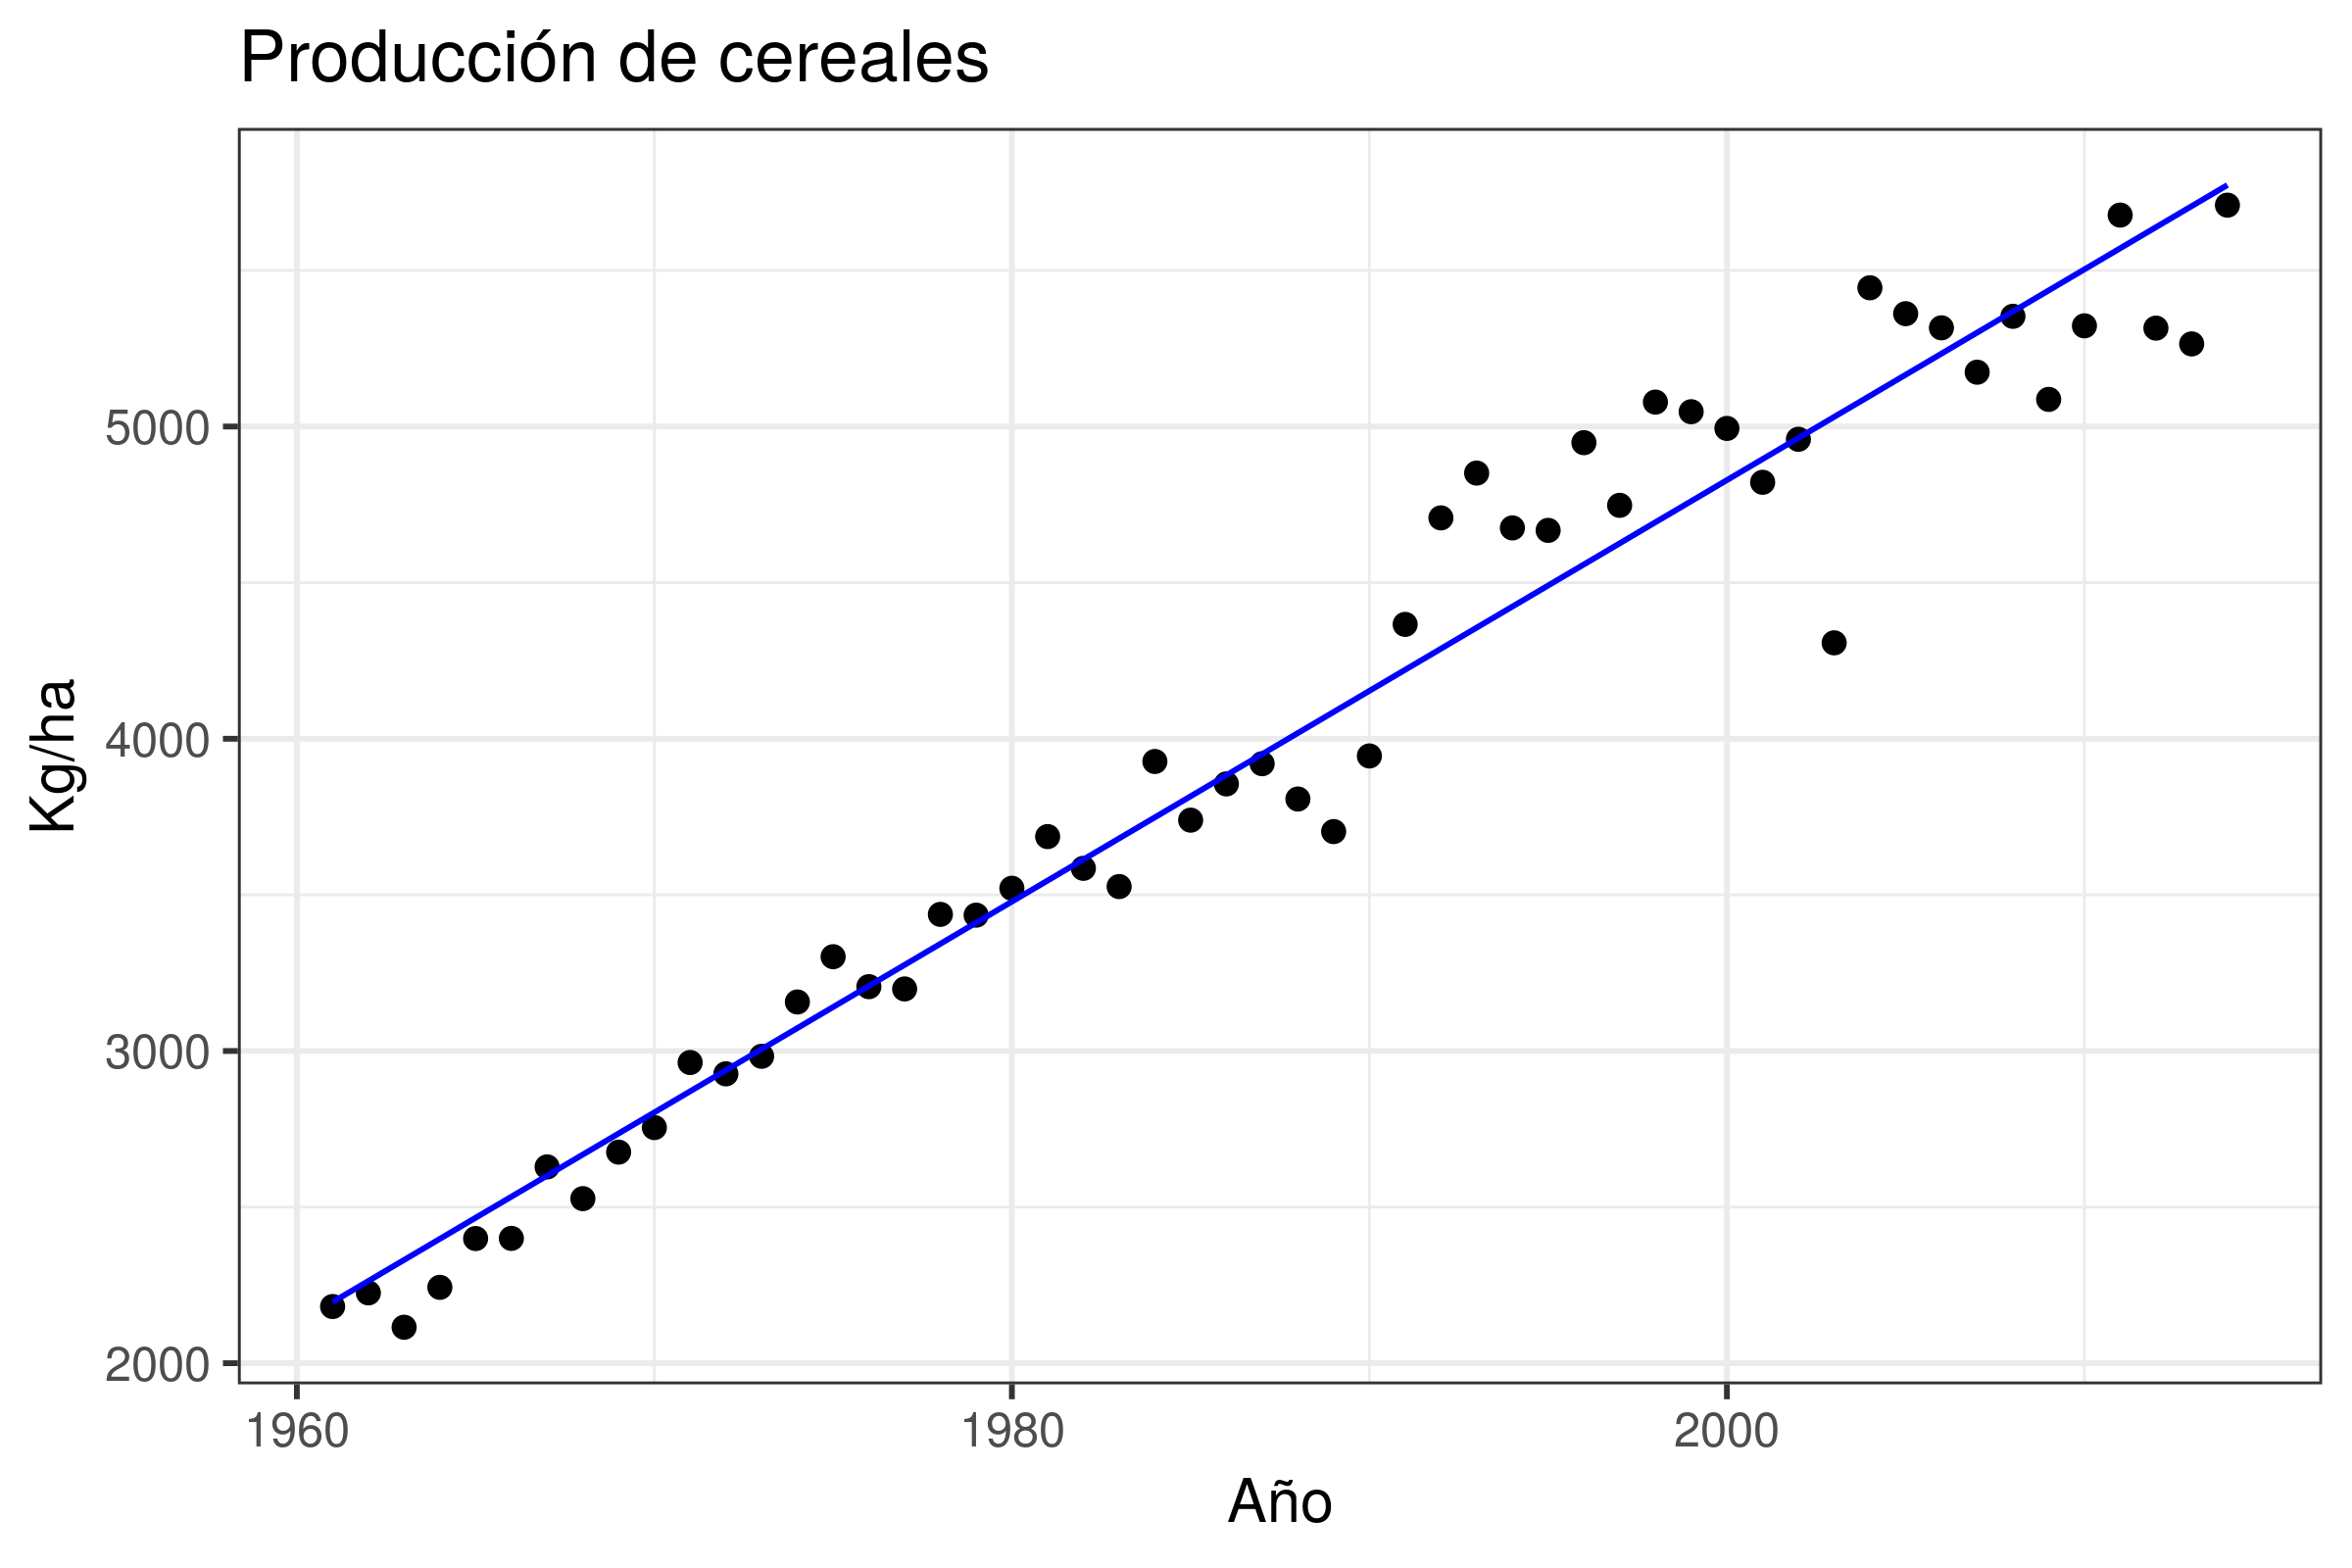

In [95]:
yieldKgIt$predicted <- predict(model, yieldKgIt)

ggplot(data=yieldKgIt,aes(x=DATE))+
   geom_point(aes(y=yieldCereal))+
   geom_line(aes(y=predicted),color="blue")+
   theme_bw()+xlab("Año")+ylab("Kg/ha")+ggtitle("Producción de cereales")


Cada año, de media, la producción de cereales aumenta en 67.5kg/ha, sigue una curva lineal con bastante poco error. En la siguiente gráfica se ve los residuos:

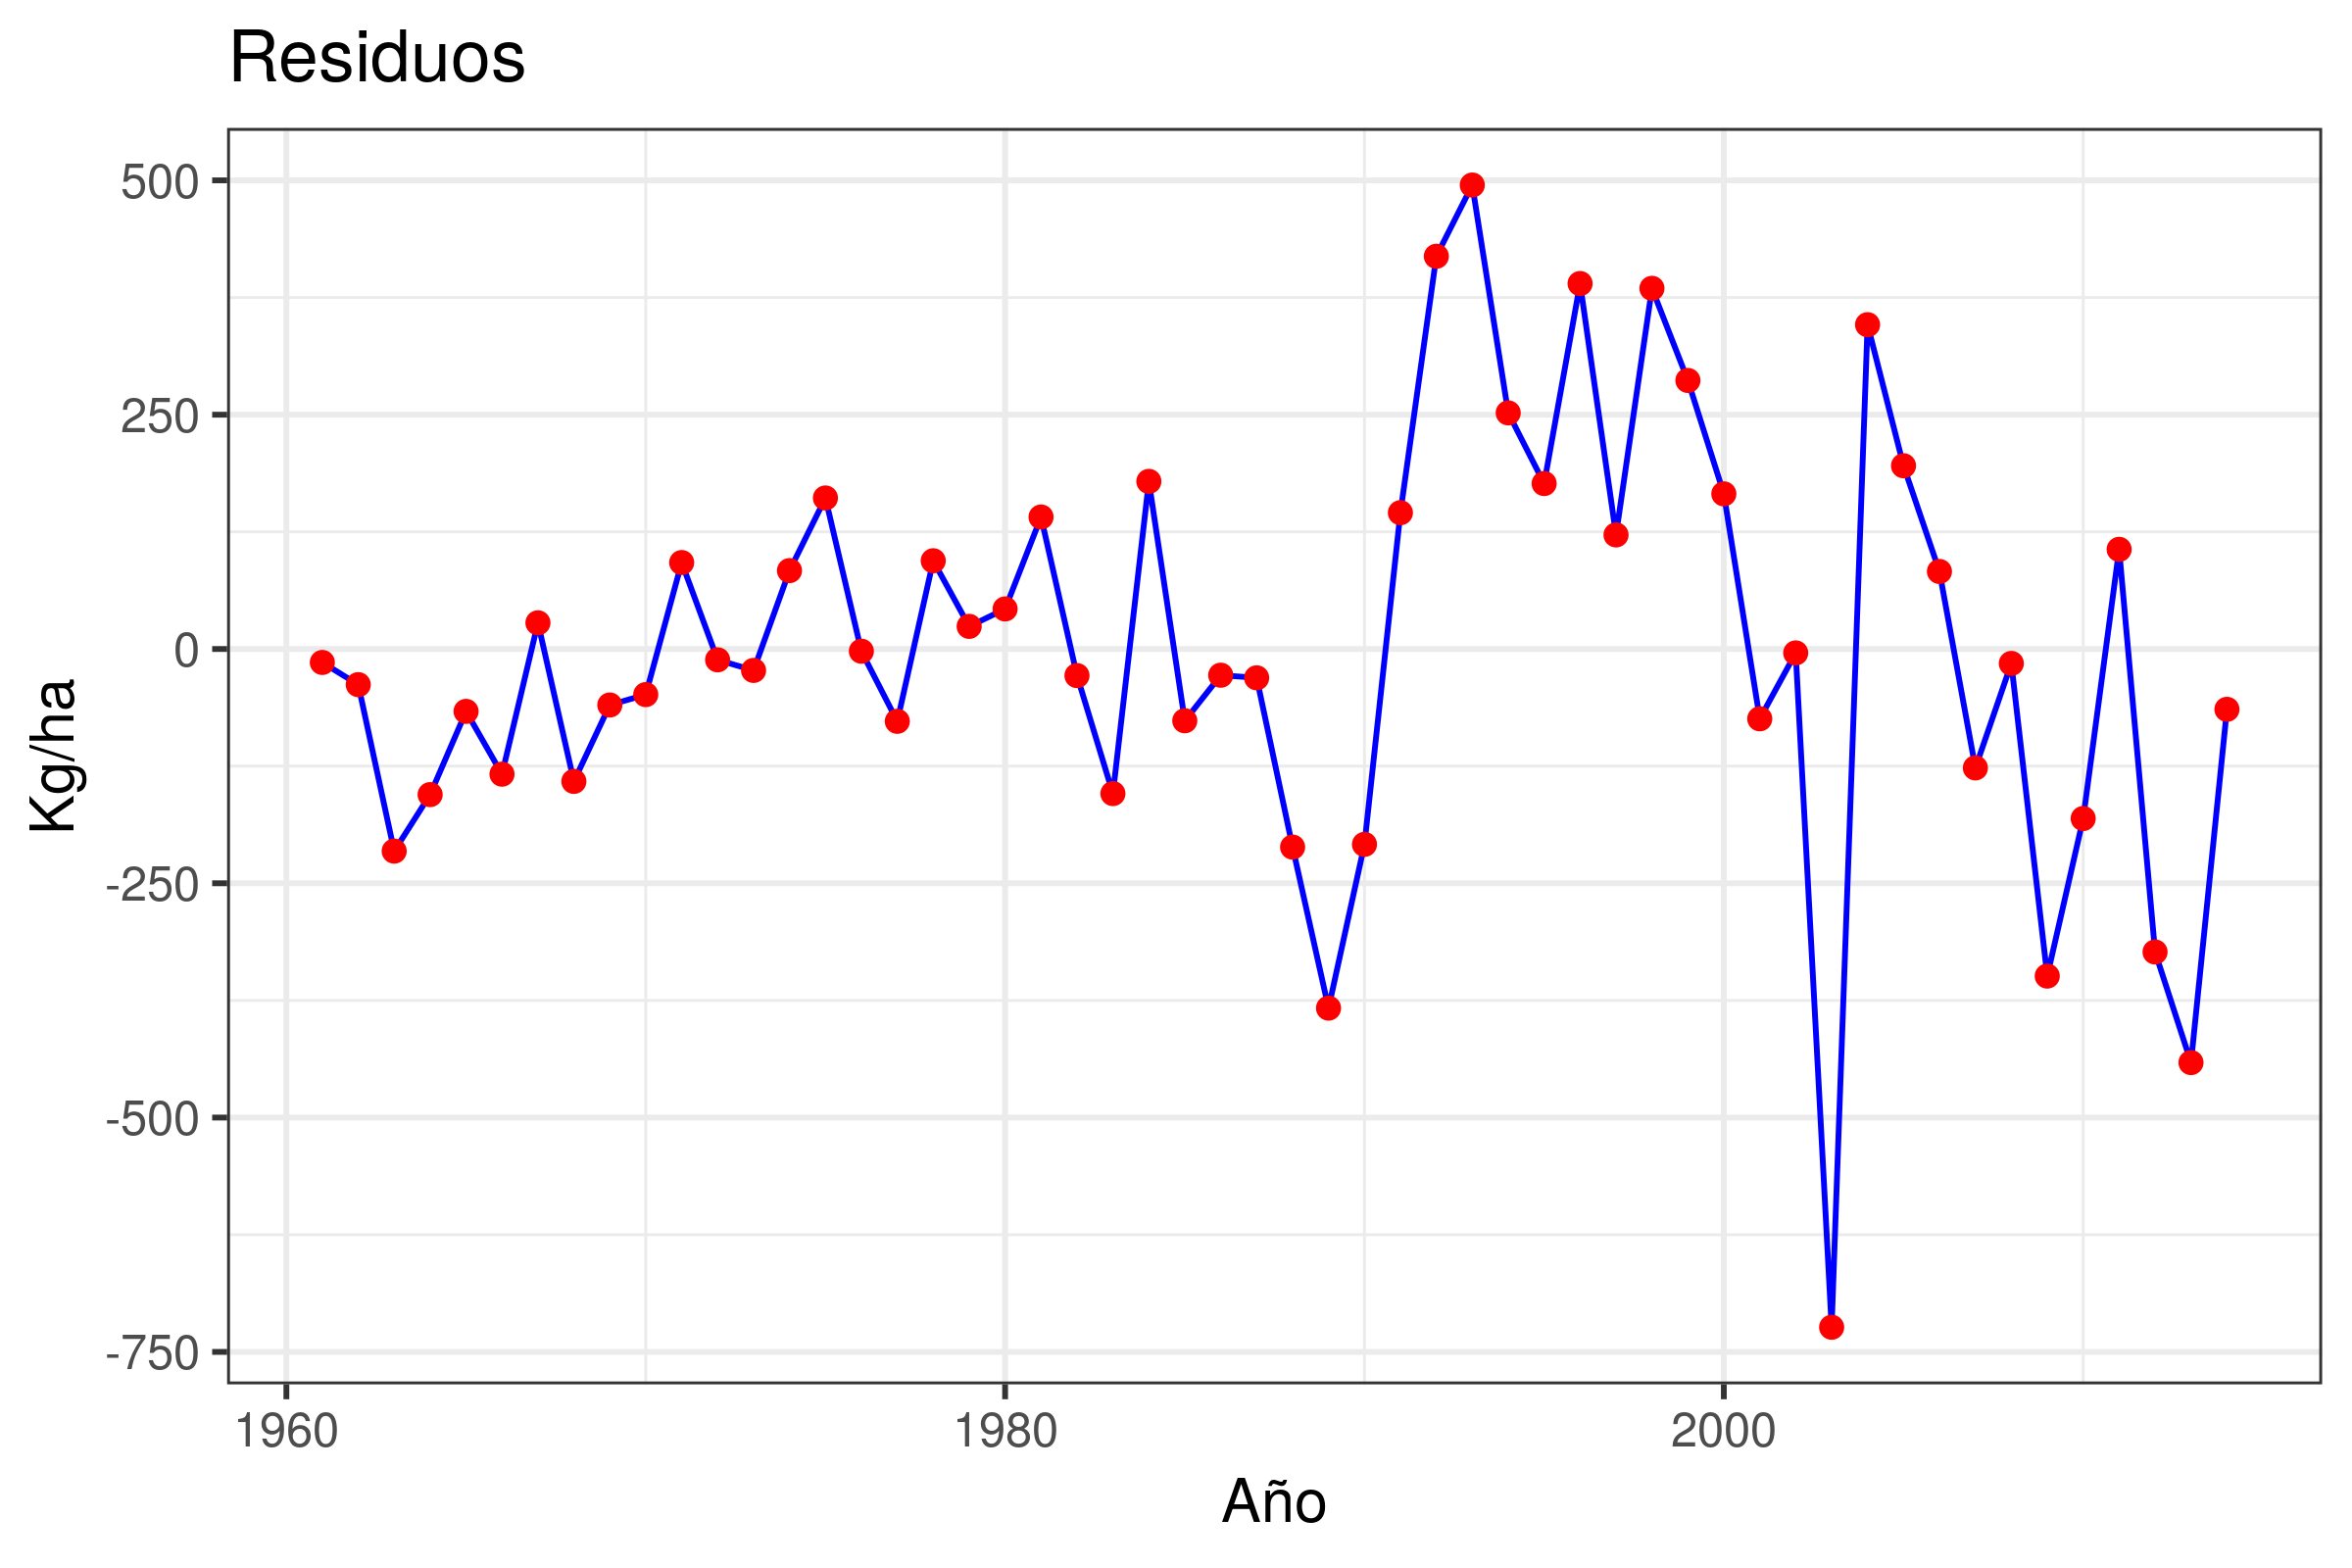

In [96]:
ggplot(data=yieldKgIt,aes(x=DATE,y=yieldCereal-predicted))+   
   geom_line(color="blue")+
   geom_point(color="red")+
   theme_bw()+xlab("Año")+ylab("Kg/ha")+ggtitle("Residuos")


¿Porqué a veces la producción de cereales es inferior o superior con la curva esperada?
¿Podría haber factores meteorológicos involucrados?

No tenemos el histórico de meteorología de toda italia, pero podemos aproximarlo con el histórico de la ciudad de Bolonia.


In [97]:
residuals<-data.frame(DATE=yieldKgIt$DATE,res=model$residuals)
weather<-read.csv("data/ITE00100550.csv")
wc<-merge(weather[,c("DATE","PRCP")],residuals,by="DATE")
cor(wc$PRCP,wc$res,use="complete.obs")
#ggplot(wc,aes(x=DATE,y=PRCP))+geom_point()

[1] 0.1847833

# Regresión lineal múltiple

Hasta ahora habíamos visto como el cambio en una variable puede afectar a otra, pero ¿qué ocurre si son varias las variables que alteran el comportamiento de nuestra variable objetivo? En este caso necesitamos utilizar la regresión lineal múltiple.

Es un modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente $Y$, las variables independientes $X_i$ y un término aleatorio $\varepsilon$. Este modelo puede ser expresado como:

\\[
Y=\beta_0 + \beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p+\varepsilon = \sum \beta_k X_k+\varepsilon
\\]


donde:
* $Y$: variable dependiente
* $X_1,X_2,\cdots ,X_p$: variables independientes
* $\beta_0, \beta_1,\beta_2,\cdots ,\beta_p$: parámetros a determinal que dado un $X_k$ produce el mejor posible $Y$
* $\varepsilon$: error, valor aleatorio.

Condiciones para aplicarlo:
1. Que la relación entre las variables sea lineal.
2. Que los errores en la medición de $X_k$ sean independientes entre sí.
3. Que los errores tengan varianza constante. (https://es.wikipedia.org/wiki/Heterocedasticidad)
4. Que los errores tengan una media aritmética igual a cero.


Para calcular el valor óptimo de $\beta$ vamos a utilizar un poco de álgebra linea. 
\\[
\begin{split}
y_1 &=\beta_1 x_{11}+\beta_2 x_{12}+\beta_3 x_{13}+\cdots+\beta_p x_{1p}+\varepsilon_1  \\
y_2 &=\beta_1 x_{21}+\beta_2 x_{22}+\beta_3 x_{23}+\cdots+\beta_p x_{2p}+\varepsilon_1  \\
\vdots& \\
y_n &=\beta_1 x_{n1}+\beta_2 x_{n2}+\beta_3 x_{n3}+\cdots+\beta_p x_{np}+\varepsilon_1  \\
\end{split}
\\]

Podemos escribirlo en forma de matriz:
\\[
\begin{bmatrix}
 y_1 \\ 
 y_2 \\ 
 \vdots \\ 
 y_n 
\end{bmatrix}
=
\begin{bmatrix}
 x_{11} & x_{12} & x_{13} & \cdots & x_{1p} \\ 
 x_{21} & x_{22} & x_{23} & \cdots & x_{2p} \\ 
 \vdots & & & \ddots & \vdots \\ 
 x_{n1} & x_{n2} & x_{n3} & \cdots & x_{np}
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\ 
\beta_2 \\
\beta_3 \\
\vdots  \\
\beta_p
\end{bmatrix}+
\begin{bmatrix}
 \varepsilon_1 \\ 
 \varepsilon_2 \\ 
 \vdots \\ 
 \varepsilon_n
\end{bmatrix}
\\]
Lo que se puede simplificar como:
\\[
Y=X \beta+\varepsilon
\\]

Al igual que en el caso anterior podemos estimar $\beta$ con:
\\[
\beta=\left( X^{\intercal}X  \right)^{-1} X^{\intercal} Y
\\]

In [98]:
n<-10
x1<-rep(1,n)
x2<-seq(2,to=11,length.out = n)
x3<-seq(0.3,to=5,length.out = n)^2
X<-matrix(c(x1,x2,x3),nrow=n,byrow = F)
print("El valor de la matriz X es:")
X
beta<-matrix(c(5,2,14),nrow=3)
print("El valor de la matriz Y es:")
Y<-X %*% beta+rnorm(n)
Y

[1] "El valor de la matriz X es:"


1,2,0.0900000
1,3,0.6760494
1,4,1.8075309
1,5,3.4844444
1,6,5.7067901
1,7,8.4745679
1,8,11.7877778
1,9,15.6464198
1,10,20.0504938
1,11,25.0000000


[1] "El valor de la matriz Y es:"


9.043791
20.209827
39.527271
63.409564
96.423658
138.180288
187.184995
244.022765
306.209424
376.566513


In [99]:
print("El valor estimado de beta es:")
est_beta<-solve(t(X) %*% X) %*% t(X) %*% Y
est_beta

print("El valor real de beta es:")
beta

[1] "El valor estimado de beta es:"


2.567933
2.716116
13.788773


[1] "El valor real de beta es:"


5
2
14


Esto también se puede resolver con la función *lm* de R. Ignoramos el vector *x1* porque la función por defecto ya añade el término.

In [100]:
lm(Y~x2+x3)


Call:
lm(formula = Y ~ x2 + x3)

Coefficients:
(Intercept)           x2           x3  
      2.568        2.716       13.789  


### Ejemplo: Peso de los niños al nacer

Este dataset contien información de bebes recien nacidos y sus padres. Podemos usarlo como regresión para ver cuales son los factores que más afectan al peso del niño.

http://people.reed.edu/~jones/141/BirthWgt.html

Tenemos las siguientes variables que vamos a utilizar:

|Nombre|Variable|
|-|-|
|Birthweight| Peso al nacer (libras)|
|Gestation| Semanas que duró la gestación|
|motherage| Edad de la madre|
|mnocig| Número de cigarros al día fumados por la madre|
|mheight| Altura de la madre (pulgadas)|


In [1]:
bwt<-read.csv("data/birthweight_reduced.csv")
str(bwt)


'data.frame':	42 obs. of  17 variables:
 $ id              : int  1313 431 808 300 516 321 1363 575 822 1081 ...
 $ headcirumference: int  12 12 13 12 13 13 12 12 13 14 ...
 $ length          : int  17 19 19 18 18 19 19 19 19 21 ...
 $ Birthweight     : num  5.8 4.2 6.4 4.5 5.8 6.8 5.2 6.1 7.5 8 ...
 $ Gestation       : int  33 33 34 35 35 37 37 37 38 38 ...
 $ smoker          : int  0 1 0 1 1 0 1 1 0 0 ...
 $ motherage       : int  24 20 26 41 20 28 20 19 20 18 ...
 $ mnocig          : int  0 7 0 7 35 0 7 7 0 0 ...
 $ mheight         : int  58 63 65 65 67 62 64 65 62 67 ...
 $ mppwt           : int  99 109 140 125 125 118 104 132 103 109 ...
 $ fage            : int  26 20 25 37 23 39 20 20 22 20 ...
 $ fedyrs          : int  16 10 12 14 12 10 10 14 14 12 ...
 $ fnocig          : int  0 35 25 25 50 0 35 0 0 7 ...
 $ fheight         : int  66 71 69 68 73 67 73 72 70 67 ...
 $ lowbwt          : int  1 1 0 1 1 0 1 0 0 0 ...
 $ mage35          : int  0 0 0 1 0 0 0 0 0 0 ...
 $ LowBirthWei

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



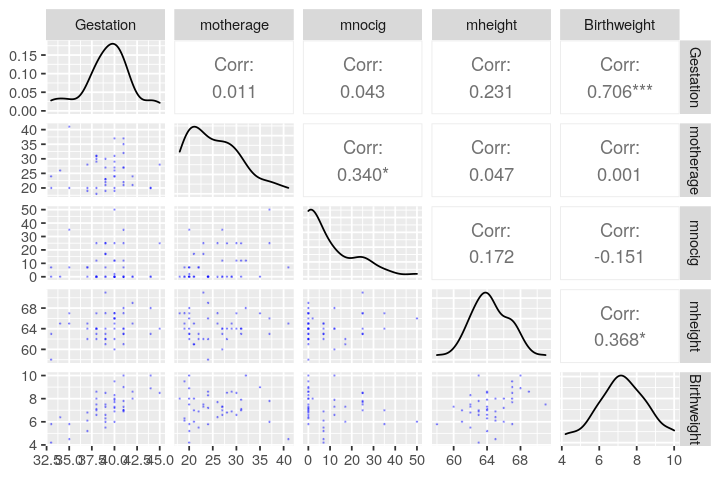

In [2]:
library(GGally)
options(repr.plot.height=4,repr.plot.width=6)
ggpairs(bwt[,c("Gestation","motherage","mnocig","mheight","Birthweight")],
       #lower = list(continuous = wrap("density", alpha = 0.8,size=0.2,color='blue'))
       lower = list(continuous = wrap("points", alpha = 0.3,size=0.1,color='blue'))
       )

In [3]:
model<-lm(data=bwt, formula = Birthweight ~ Gestation+motherage+mnocig+mheight)
summary(model)
confint(model)


Call:
lm(formula = Birthweight ~ Gestation + motherage + mnocig + mheight, 
    data = bwt)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.75980 -0.66076 -0.09069  0.60934  1.62597 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -14.42495    3.83972  -3.757 0.000592 ***
Gestation     0.33062    0.05407   6.115 4.38e-07 ***
motherage     0.01541    0.02610   0.591 0.558404    
mnocig       -0.02613    0.01199  -2.180 0.035673 *  
mheight       0.13329    0.05689   2.343 0.024627 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8904 on 37 degrees of freedom
Multiple R-squared:  0.5954,	Adjusted R-squared:  0.5517 
F-statistic: 13.61 on 4 and 37 DF,  p-value: 6.448e-07


,2.5 %,97.5 %
(Intercept),-22.20496254,-6.644928693
Gestation,0.22107441,0.440169668
motherage,-0.03746888,0.068295387
mnocig,-0.05041666,-0.001846692
mheight,0.01801221,0.248570832


Los valores que más influencia parecen tener son aquellos que presentan un pvalor (Pr) más bajo. El número de * que hay a la derecha de cada fila indica su grado de confianza.

La variable que más parece influir es la gestación, parece que por cada semana de gestación el bebé gana 0.33062 libras de peso. En cambio por cada cigarro al día que fuma la madre el peso del bebé podría disminuir en 0.02613 libras. La altura de la madre también parece tener cierta incluencia, por cada pulgada más que mida la madre el bebé pesará 0.13329 libras más. En cambio la edad de la madre parece no tener ningún efecto estadístico significativo.

In [4]:
model<-lm(data=bwt, formula = Birthweight ~ Gestation+mnocig+mheight)
summary(model)


Call:
lm(formula = Birthweight ~ Gestation + mnocig + mheight, data = bwt)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.51576 -0.65149 -0.04835  0.56673  1.72081 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -14.02601    3.74731  -3.743 0.000601 ***
Gestation     0.33058    0.05360   6.167 3.35e-07 ***
mnocig       -0.02374    0.01118  -2.123 0.040351 *  
mheight       0.13289    0.05640   2.356 0.023727 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8827 on 38 degrees of freedom
Multiple R-squared:  0.5916,	Adjusted R-squared:  0.5594 
F-statistic: 18.35 on 3 and 38 DF,  p-value: 1.6e-07


In [9]:
cor(bwt[,c('Birthweight','Gestation','mnocig','mheight')])

,Birthweight,Gestation,mnocig,mheight
Birthweight,1.0000000,0.70629195,-0.15122774,0.3679470
Gestation,0.7062919,1.00000000,0.04319486,0.2309293
mnocig,-0.1512277,0.04319486,1.00000000,0.1719425
mheight,0.3679470,0.23092930,0.17194248,1.0000000


In [5]:
confint(model)

,2.5 %,97.5 %
(Intercept),-21.61203867,-6.439988997
Gestation,0.22207108,0.439087856
mnocig,-0.04638373,-0.001099777
mheight,0.01870990,0.247064970


¿Cual es incremento del peso de un bebé por cada semana de gestación?

In [11]:
# Birthweight = 0.355*Gestation-6.66
summary(lm(data=bwt, formula = Birthweight ~ Gestation))


Call:
lm(formula = Birthweight ~ Gestation, data = bwt)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.69661 -0.78430 -0.02426  0.60604  2.09279 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.66019    2.21162  -3.011  0.00449 ** 
Gestation    0.35530    0.05631   6.310 1.73e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.953 on 40 degrees of freedom
Multiple R-squared:  0.4988,	Adjusted R-squared:  0.4863 
F-statistic: 39.82 on 1 and 40 DF,  p-value: 1.733e-07


¿Cual es el incremento de peso de un bebé por cada pie adicional de altura de la madre?

In [16]:
# Birthweight = 0.192*Gestation-5.10
summary(lm(data=bwt, formula = Birthweight ~ mheight))


Call:
lm(formula = Birthweight ~ mheight, data = bwt)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.87860 -0.60445  0.00152  0.73134  3.00549 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -5.10440    4.94597  -1.032   0.3083  
mheight      0.19205    0.07674   2.503   0.0165 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.252 on 40 degrees of freedom
Multiple R-squared:  0.1354,	Adjusted R-squared:  0.1138 
F-statistic: 6.263 on 1 and 40 DF,  p-value: 0.01651


Data una madre con una altura de 58 pies, cuanto sería el peso de un bebé de 40 semanas de gestación

In [12]:
# Birthweight = 0.33*Gestation+0.11*mheight-12.94
model_gh<-lm(data=bwt, formula = Birthweight ~ Gestation+mheight)
summary(model_gh)


Call:
lm(formula = Birthweight ~ Gestation + mheight, data = bwt)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7117 -0.6065 -0.1751  0.7193  1.7745 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12.94885    3.87608  -3.341  0.00185 ** 
Gestation     0.33017    0.05596   5.900 7.12e-07 ***
mheight       0.11294    0.05806   1.945  0.05898 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9215 on 39 degrees of freedom
Multiple R-squared:  0.5432,	Adjusted R-squared:  0.5197 
F-statistic: 23.19 on 2 and 39 DF,  p-value: 2.318e-07


In [14]:
predict(model_gh, data.frame(Gestation=40, mheight=58))

1 
6.808216

## Estimación de funciones polinómicas

Podemos estimar funciones polinómicas del tipo:
\\[
y_i=\beta_0+\beta_1·x_i·+\beta_2·x_i^2+\beta_3·x_i^3+\cdots+\beta_p·x_i^p
\\]


Simplemente reescribiendolo como un modelo lineal múltple
\\[
\begin{bmatrix}
 y_1 \\ 
 y_2 \\ 
 \vdots \\ 
 y_n 
\end{bmatrix}
=
\begin{bmatrix}
 1 & x_{1} & x_{1}^2 & x_{1}^3 & \cdots & x_{1}^p \\ 
 1 & x_{2} & x_{2}^2 & x_{2}^3 & \cdots & x_{2}^p \\ 
 \vdots & & & \ddots & \vdots \\ 
 1 & x_{n} & x_{n}^2 & x_{n}^3 & \cdots & x_{n}^p
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\ 
\beta_1 \\
\beta_2 \\
\beta_3 \\
\vdots  \\
\beta_p
\end{bmatrix}+
\begin{bmatrix}
 \varepsilon_1 \\ 
 \varepsilon_2 \\ 
 \vdots \\ 
 \varepsilon_n
\end{bmatrix}
\\]
Lo que se puede simplificar como:
\\[
Y=X \beta+\varepsilon
\\]


[1] "El valor estimado de beta es:"


3.0098013
-0.2311973
3.0912666
0.5370282


[1] "El valor real de beta es:"


1.0
1.0
3.0
0.5


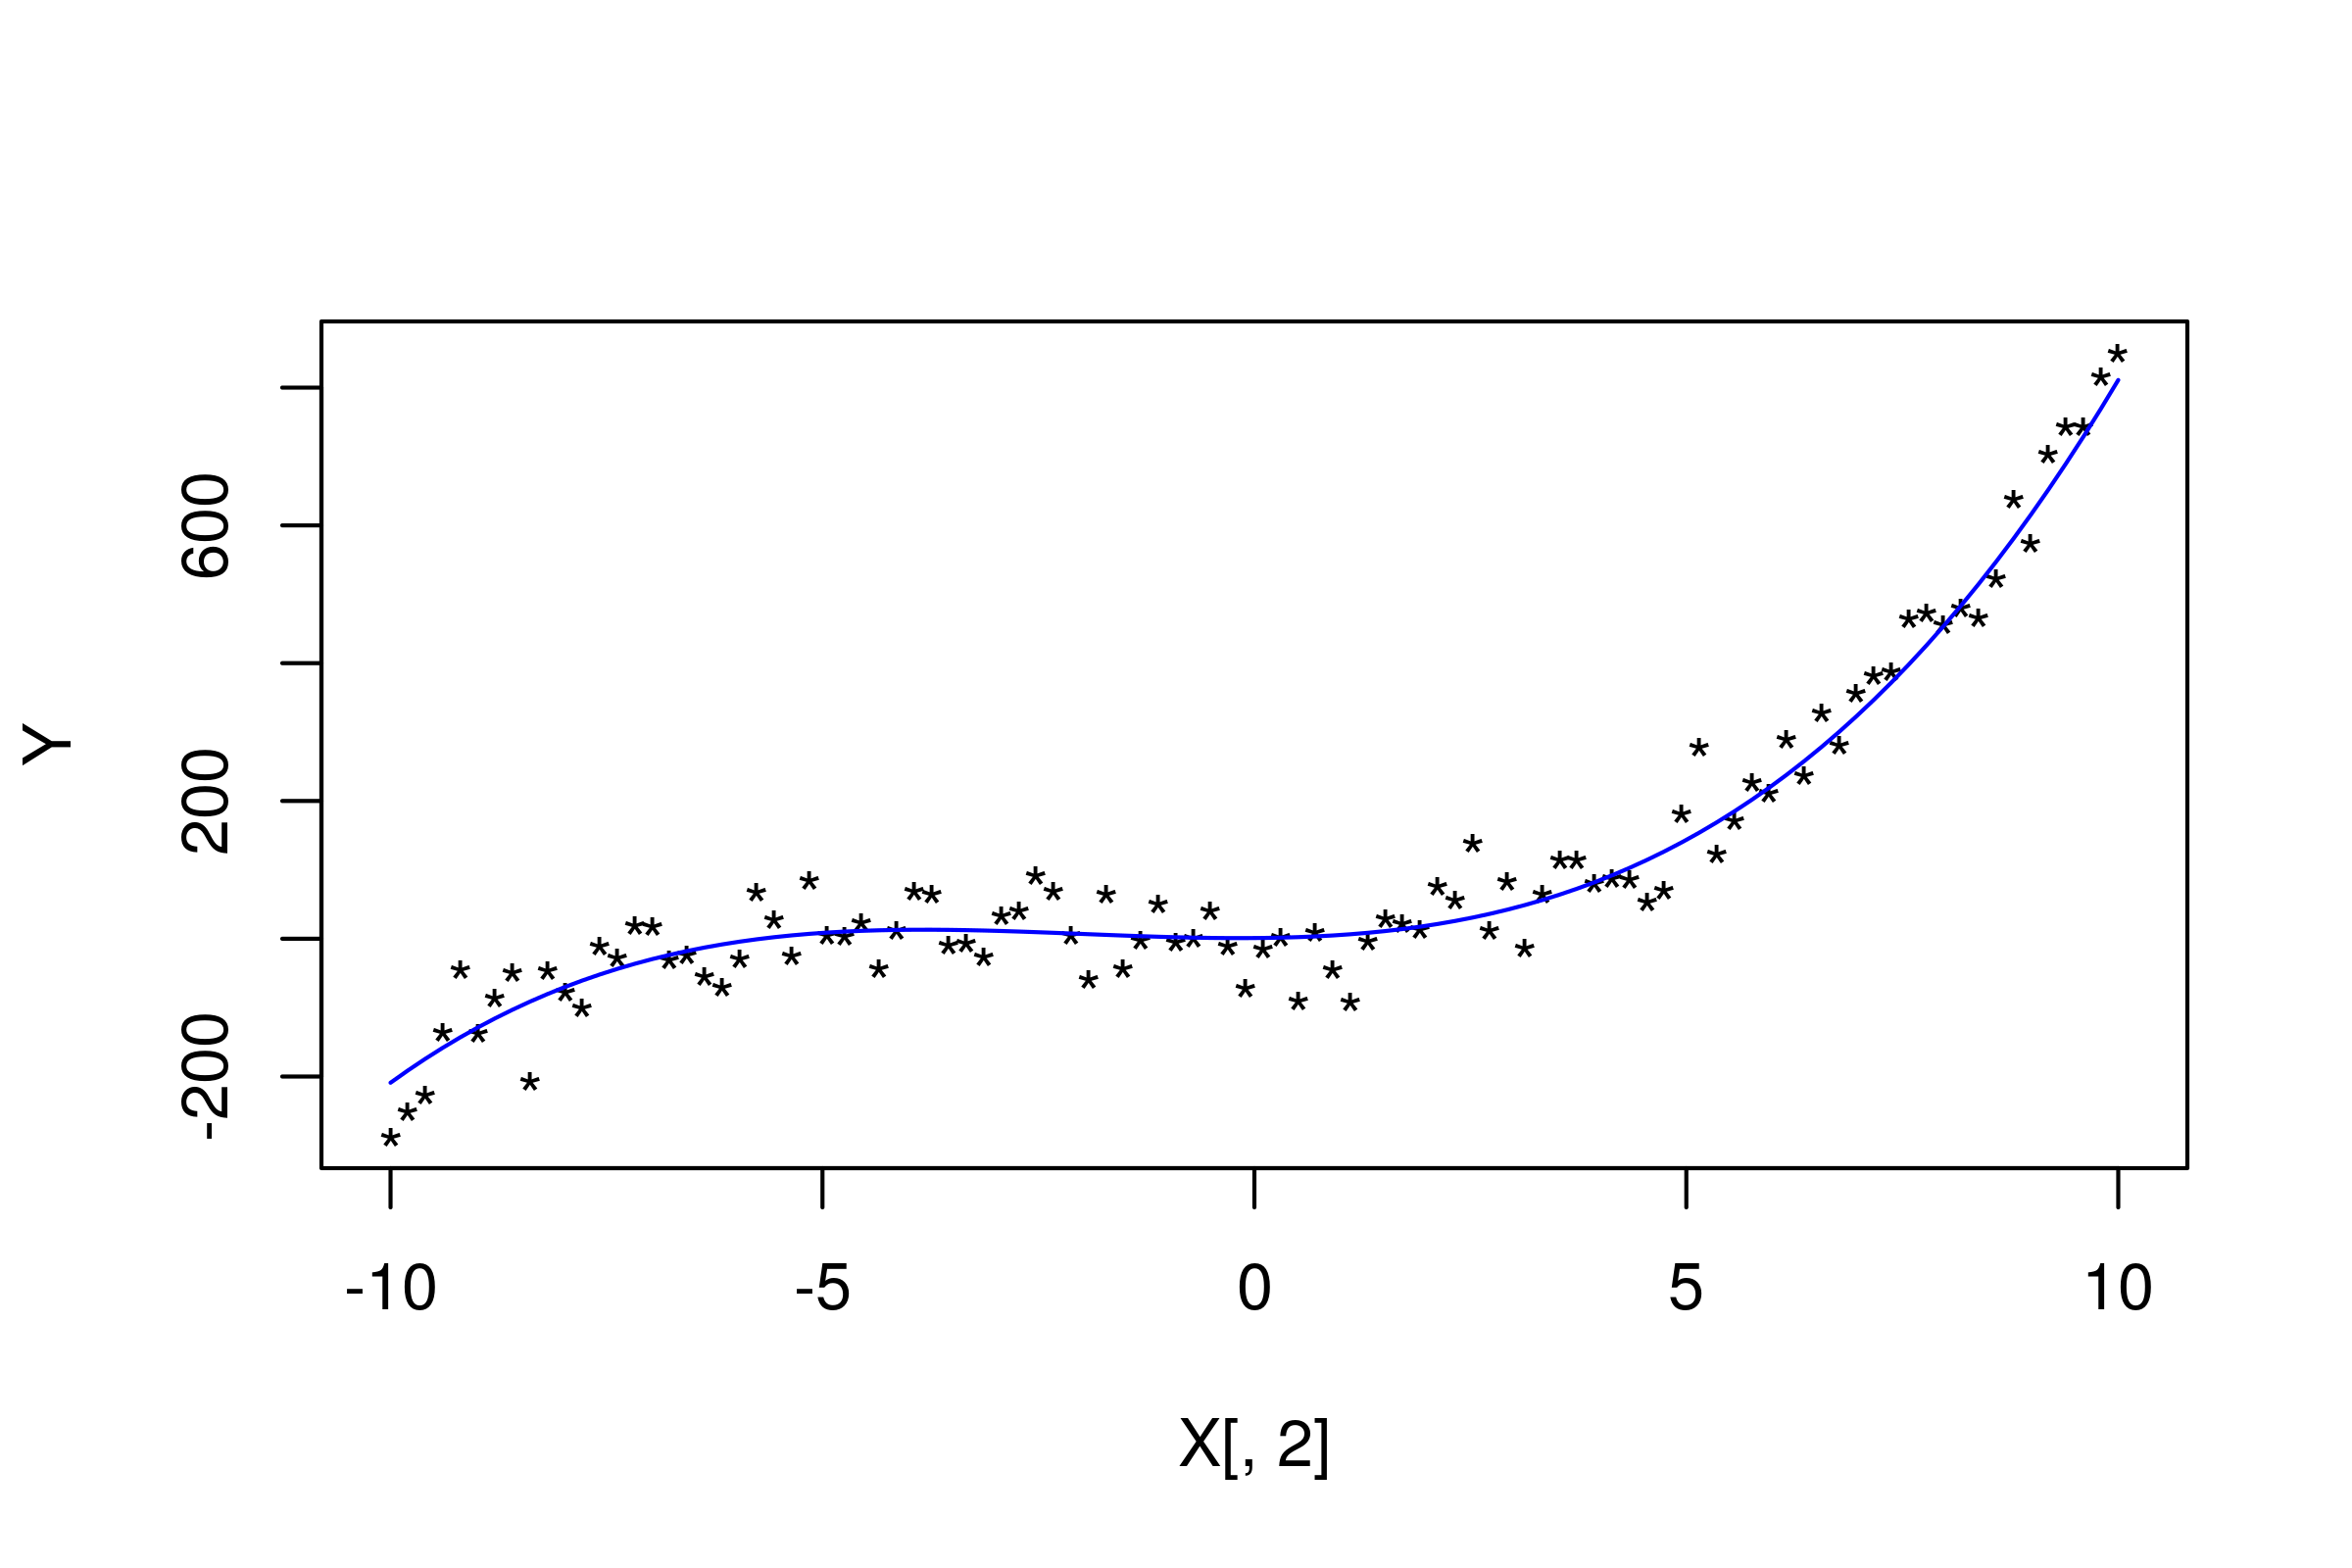

In [108]:
n<-100
x<-seq(-10,10,length.out = n)

x0<-rep(1,n)
x1<-x
x2<-x^2 
x3<-x^3
X<-matrix(c(x0,x1,x2,x3),nrow=n,byrow = F)

beta<-matrix(c(1,1,3,0.5),nrow=4)
Y<-X %*% beta+rnorm(n,sd = 50)

plot(X[,2],Y,pch='*')

est_beta<-solve(t(X) %*% X) %*% t(X) %*% Y
est_Y<-X %*% beta
lines(X[,2],est_Y,col="blue")

print("El valor estimado de beta es:")
est_beta

print("El valor real de beta es:")
beta

In [109]:
modelPoly3<-lm(Y~x+I(x^2)+I(x^3))
modelPoly3


Call:
lm(formula = Y ~ x + I(x^2) + I(x^3))

Coefficients:
(Intercept)            x       I(x^2)       I(x^3)  
     3.0098      -0.2312       3.0913       0.5370  


In [111]:
# y = 3.0098 - 0.2312*x + 3.0913*x^2 + 0.537*x^3

In [110]:
summary(modelPoly3)


Call:
lm(formula = Y ~ x + I(x^2) + I(x^3))

Residuals:
     Min       1Q   Median       3Q      Max 
-112.713  -28.884   -3.332   35.429  119.981 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.00980    6.98529   0.431    0.668    
x           -0.23120    1.99695  -0.116    0.908    
I(x^2)       3.09127    0.15311  20.189   <2e-16 ***
I(x^3)       0.53703    0.02991  17.957   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 46.56 on 96 degrees of freedom
Multiple R-squared:  0.9615,	Adjusted R-squared:  0.9603 
F-statistic: 800.2 on 3 and 96 DF,  p-value: < 2.2e-16


### Sobreajuste

El sobreajuste u overfitting ocurre en los modelos que tienen un grado polinómico tan alto que empiezan a seguir al ruido, se sobreajustan demasiado a los datos, perdiendo una visión más general de los datos y proporcionando predicciones peores.

En este caso en lugar de estar aprendiendo la relación básica entre dos variables estaríamos aprendiendo los errores, nuestro modelo intenta integrar los errores para dar una respuesta más exacta. El problema es que al coger otra vez variables similares los errores cambian, y lo aprendido con los errores anteriores ya no nos sirve, con lo cual nuestro modelo sería erroneo.

No hay que perderse demasiado en los detalles y las pequeñas variaciones de una variable, la esencia del modelo se basa en encontrar una predicción que funcione para la mayoría de los casos, no para los datos que estamos viendo ahora mismo, sino también para los datos futuros que nos llegarán.

In [112]:
modelOverfit <- lm(Y~poly(x,27))
summary(modelOverfit)


Call:
lm(formula = Y ~ poly(x, 27))

Residuals:
    Min      1Q  Median      3Q     Max 
-83.310 -24.144   0.281  25.029 114.322 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    108.134      4.587  23.571   <2e-16 ***
poly(x, 27)1  1903.240     45.875  41.488   <2e-16 ***
poly(x, 27)2   940.116     45.875  20.493   <2e-16 ***
poly(x, 27)3   836.177     45.875  18.227   <2e-16 ***
poly(x, 27)4   -51.837     45.875  -1.130   0.2622    
poly(x, 27)5    37.682     45.875   0.821   0.4141    
poly(x, 27)6     5.122     45.875   0.112   0.9114    
poly(x, 27)7    74.939     45.875   1.634   0.1067    
poly(x, 27)8   -58.862     45.875  -1.283   0.2036    
poly(x, 27)9    44.071     45.875   0.961   0.3399    
poly(x, 27)10   19.870     45.875   0.433   0.6662    
poly(x, 27)11   11.273     45.875   0.246   0.8066    
poly(x, 27)12  -97.419     45.875  -2.124   0.0371 *  
poly(x, 27)13  -46.478     45.875  -1.013   0.3144    
poly(x, 27)14   41.097     45

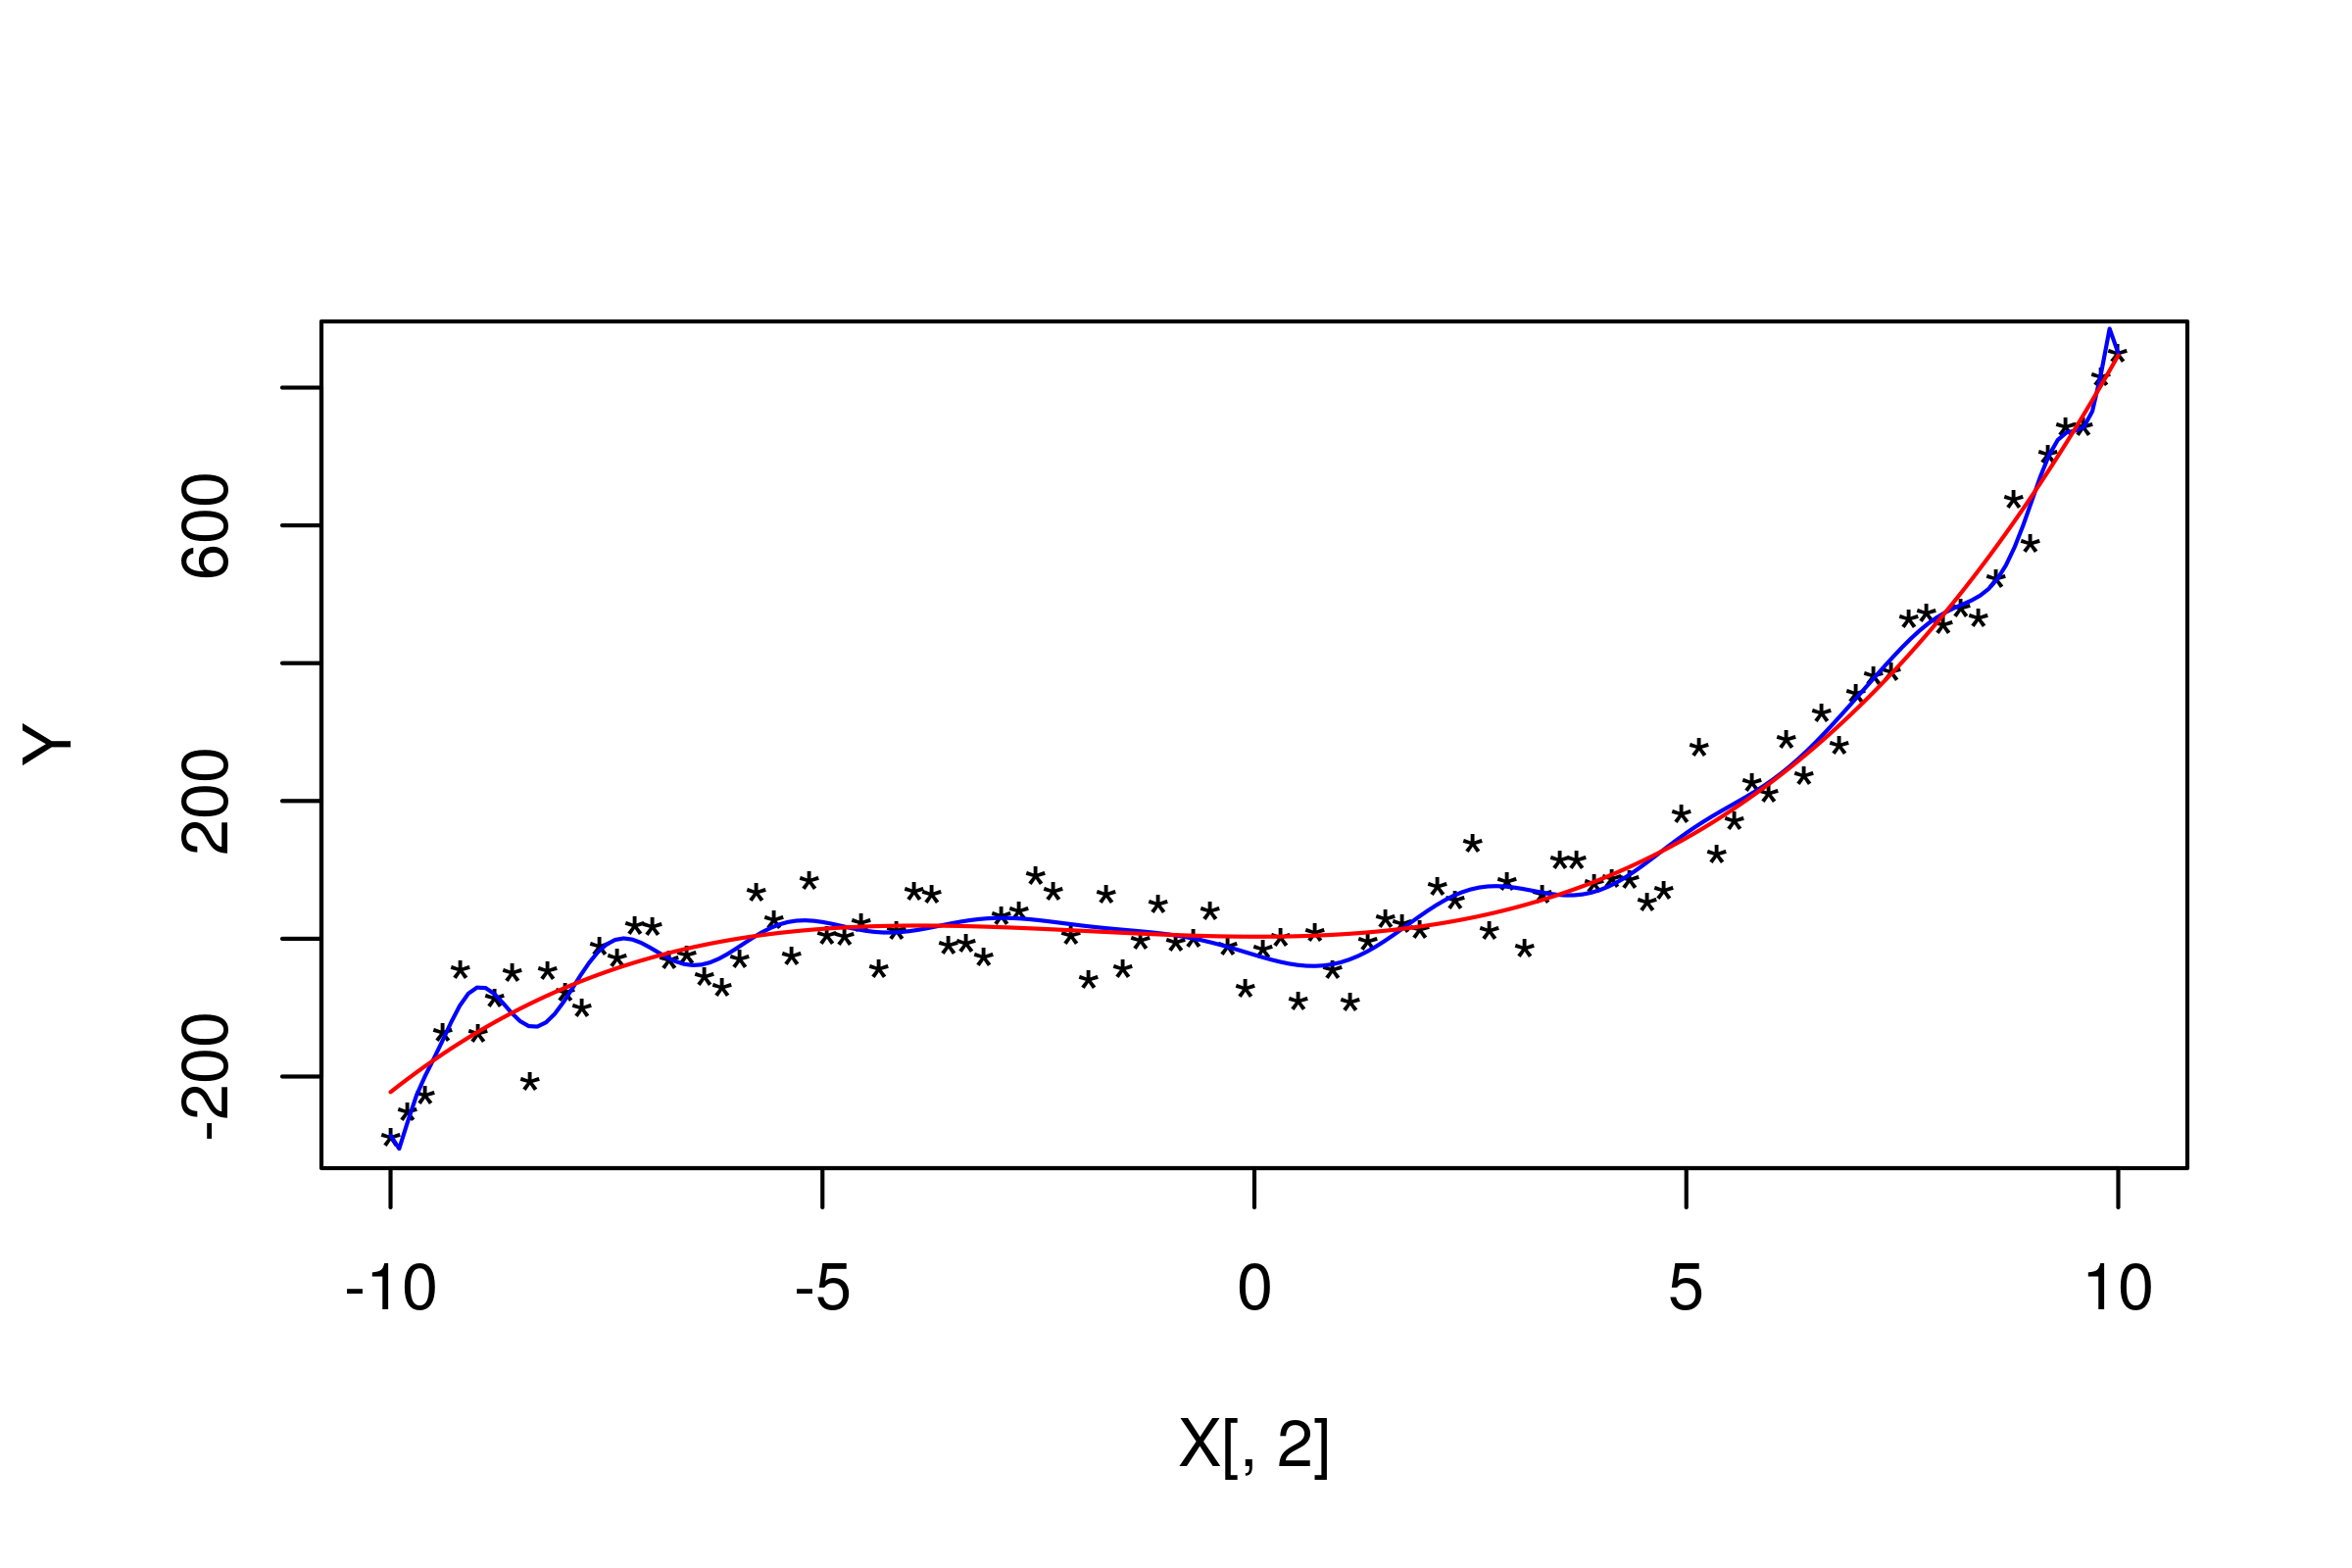

In [113]:
plot(X[,2],Y,pch='*')

xp<-seq(-10,10,by=0.1)
yp<-predict(modelOverfit,data.frame(x=xp))
lines(xp,yp,col="blue")
lines(xp,predict(modelPoly3,data.frame(x=xp)),col="red")

In [114]:
paste("Polinomio grado 27: Rsquared:",summary(modelOverfit)$r.squared)
paste("Polinomio grado 27: Residual standard error",sqrt(sum(summary(modelOverfit)$residuals^2)/(length(summary(modelOverfit)$residuals)-25)))

paste("Polinomio grado 3: Rsquared:",summary(modelPoly3)$r.squared)
paste("Polinomio grado 3: Residual standard error",sqrt(sum(summary(modelPoly3)$residuals^2)/(length(summary(modelPoly3)$residuals)-4)))



[1] "Polinomio grado 27: Rsquared: 0.972009860824726"

[1] "Polinomio grado 27: Residual standard error 44.9479981275829"

[1] "Polinomio grado 3: Rsquared: 0.961548964719634"

[1] "Polinomio grado 3: Residual standard error 46.5647053380242"

### Como encontrar el mejor modelo


Podemos usar el p-valor de los coeficientes o buscar entre todos los modelos el de menor AIC.

El criterio de información de Akaike (AIC) es un estimador de la calidad relativa del modelo que tiene en cuenta su complejidad.

A medida que se aumenta el número de parámetros de entrada o de grados de un polinomio el valor del *error cuadrático medio* va a ser mejor porque el error cuadrático medio disminuye. El AIC penaliza los modelos complejos en favor del los sencillos para evitar el sobreajuste.

\\[
AIC = 2·P+N·log\left(\frac{SS_{res}}{N}\right) = 2·P + N·log \left(\frac{\sum_i (y_i-y_i')^2}{N} \right)
\\]

Donde $P$ es el número de variables que se utilizan en el modelo y $N$ el número de muestras. Cuanto menor sea el vlor del AIC, mejor será el modelo.





In [115]:
paste("Polinomio grado 27, AIC:",AIC(modelOverfit))
paste("Polinomio grado 3, AIC:",AIC(modelPoly3))

[1] "Polinomio grado 27, AIC: 1074.12074427341"

[1] "Polinomio grado 3, AIC: 1057.8740787854"

En R existe la función stepAIC que nos encuentra el AIC mínimo tras probar con diferentes combinaciones.

In [116]:
library(MASS)
datadf<-data.frame(y=Y,x=x)
model<-lm(formula=y~x+I(x^2)+I(x^3)+I(x^4)+I(x^5)+I(x^6)+I(x^7)+I(x^8),datadf)
stepAIC(model,trace=FALSE)


Call:
lm(formula = y ~ I(x^2) + I(x^3) + I(x^5) + I(x^7), data = datadf)

Coefficients:
(Intercept)       I(x^2)       I(x^3)       I(x^5)       I(x^7)  
  3.0098013    3.0912666    0.7145604   -0.0061078    0.0000459  



Call:
lm(formula = y ~ I(x^2) + I(x^3) + I(x^5) + I(x^7), data = datadf)

Coefficients:
(Intercept)       I(x^2)       I(x^3)       I(x^5)       I(x^7)  
  3.0098013    3.0912666    0.7145604   -0.0061078    0.0000459  


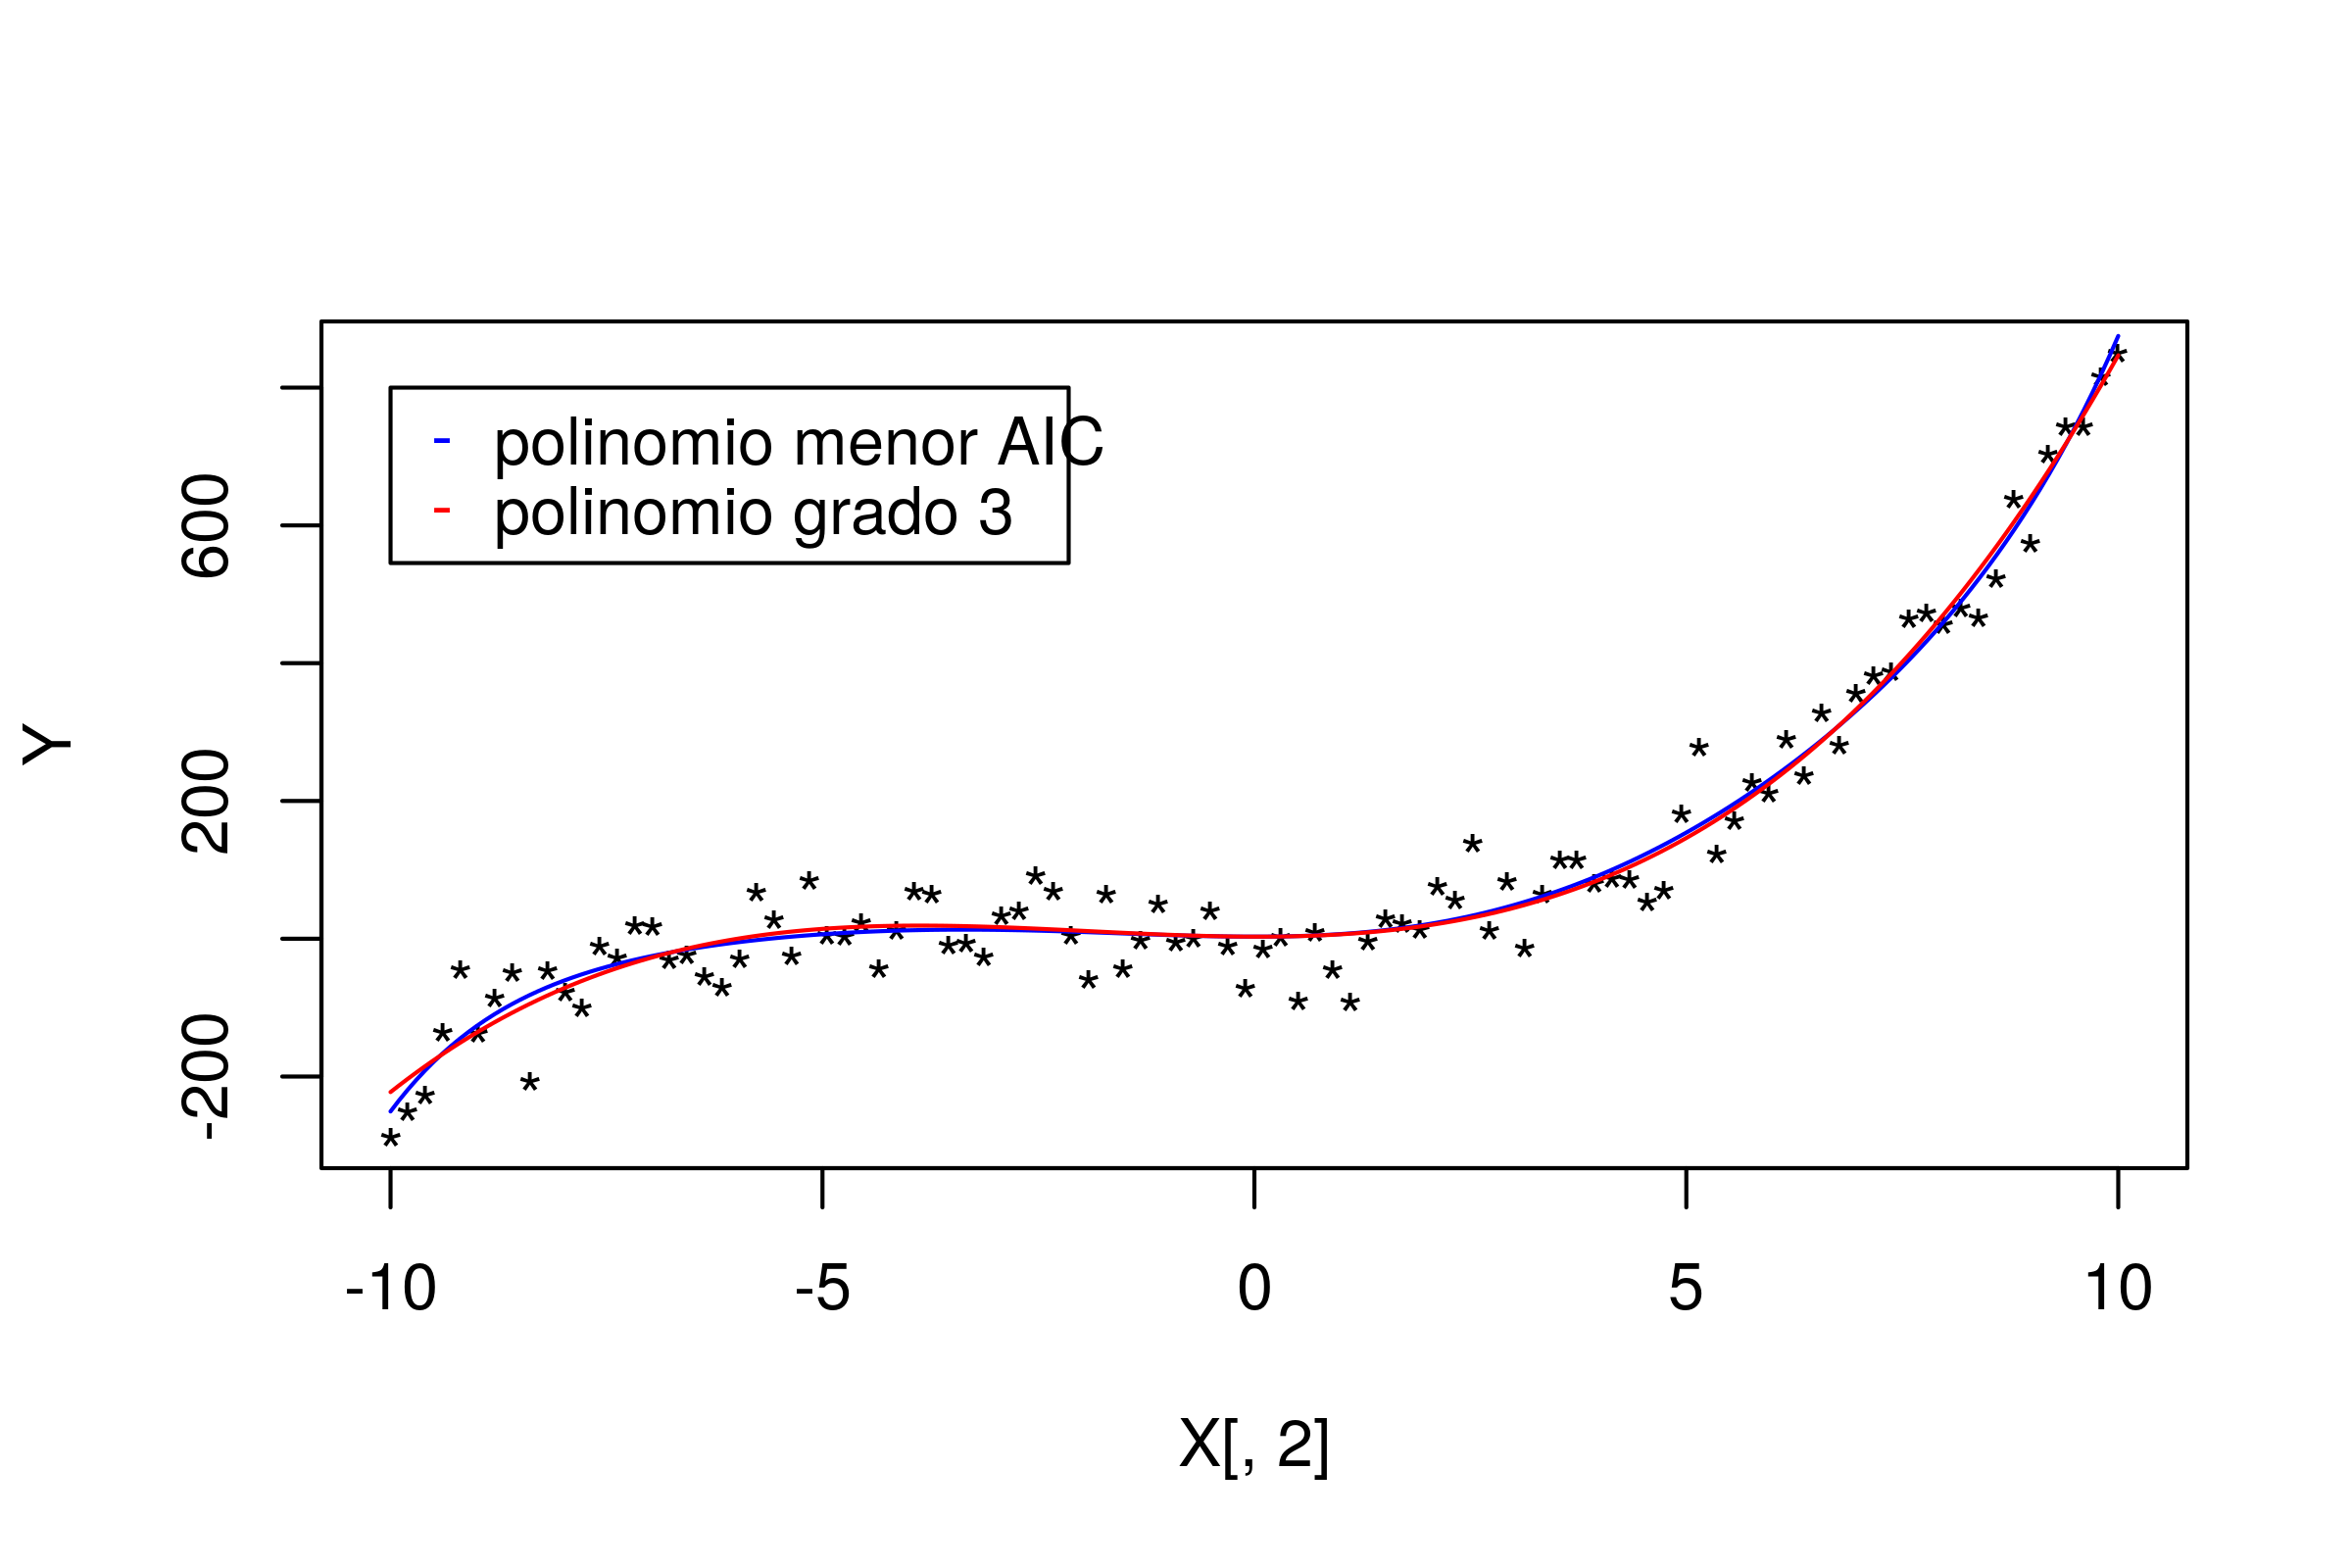

In [118]:
modelOptim<-stepAIC(model,trace=FALSE)
modelOptim
plot(X[,2],Y,pch='*')

xp<-seq(-10,10,by=0.1)
yp<-predict(modelOptim,data.frame(x=xp))
lines(xp,yp,col="blue")

modelPoly3<-lm(Y~x+I(x^2)+I(x^3))
lines(xp,predict(modelPoly3,data.frame(x=xp)),col="red")

legend(-10,800,c("polinomio menor AIC","polinomio grado 3"),pch='-',col=c('blue','red'),y.intersp=2)

In [119]:
summary(modelOptim)
summary(modelPoly3)


Call:
lm(formula = y ~ I(x^2) + I(x^3) + I(x^5) + I(x^7), data = datadf)

Residuals:
     Min       1Q   Median       3Q      Max 
-125.503  -27.534   -4.261   31.238  112.260 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.010e+00  6.926e+00   0.435    0.665    
I(x^2)       3.091e+00  1.518e-01  20.362  < 2e-16 ***
I(x^3)       7.146e-01  1.472e-01   4.855 4.72e-06 ***
I(x^5)      -6.108e-03  4.281e-03  -1.427    0.157    
I(x^7)       4.590e-05  2.998e-05   1.531    0.129    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 46.17 on 95 degrees of freedom
Multiple R-squared:  0.9626,	Adjusted R-squared:  0.961 
F-statistic: 611.1 on 4 and 95 DF,  p-value: < 2.2e-16



Call:
lm(formula = Y ~ x + I(x^2) + I(x^3))

Residuals:
     Min       1Q   Median       3Q      Max 
-112.713  -28.884   -3.332   35.429  119.981 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.00980    6.98529   0.431    0.668    
x           -0.23120    1.99695  -0.116    0.908    
I(x^2)       3.09127    0.15311  20.189   <2e-16 ***
I(x^3)       0.53703    0.02991  17.957   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 46.56 on 96 degrees of freedom
Multiple R-squared:  0.9615,	Adjusted R-squared:  0.9603 
F-statistic: 800.2 on 3 and 96 DF,  p-value: < 2.2e-16


Aunque el error sea menor con el polinomio de grado 24, es mejor utilizar el modelo con un el polinomio de grado 3. Porque el modelo de grado 24 está aprendiendo sobre el ruido.

### Ejemplo: Evolución de la población en España

Volvamos a la distribución por edad de la población española comienzos de 2020. Podemos ver como el número de personas de más de 41 años parece ser representado más o menos por una línea:

In [128]:
poblacion_raw<-read.csv("data/9663bsc.csv",skip=0,fileEncoding="ISO-8859-1",header=T, sep=';',stringsAsFactor=F)
poblacion_raw$Total <-  as.numeric(gsub('\\.', '', poblacion_raw$Total))

library(dplyr)
library(tidyr)

poblacion <- poblacion_raw %>% pivot_wider(names_from = Sexo, values_from = Total)  %>% 
 mutate(edad=as.numeric(gsub("año(s|)","",Edad.simple))) %>% drop_na() %>% select(-c(Periodo,Edad.simple)) %>%
 rename(Total='Ambos sexos') %>% arrange(edad) %>% mutate(nacimiento=2022-edad) %>% filter(edad>45)

head(poblacion)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


Total,Hombres,Mujeres,edad,nacimiento
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
805548,406145,399403,46,1976
799303,401994,397309,47,1975
779884,392960,386924,48,1974
776130,390435,385696,49,1973
763589,383237,380352,50,1972
751773,376602,375171,51,1971



Call:
lm(formula = Total ~ poly(edad, 12), data = poblacion)

Residuals:
   Min     1Q Median     3Q    Max 
-55300  -6990   -744   7423  43293 

Coefficients:
                 Estimate Std. Error  t value Pr(>|t|)    
(Intercept)        389997       2164  180.263  < 2e-16 ***
poly(edad, 12)1  -2055411      16618 -123.685  < 2e-16 ***
poly(edad, 12)2     -3407      16618   -0.205  0.83846    
poly(edad, 12)3    145215      16618    8.738 2.47e-11 ***
poly(edad, 12)4     28032      16618    1.687  0.09841 .  
poly(edad, 12)5     53301      16618    3.207  0.00244 ** 
poly(edad, 12)6     18536      16618    1.115  0.27048    
poly(edad, 12)7    -31540      16618   -1.898  0.06399 .  
poly(edad, 12)8     15385      16618    0.926  0.35939    
poly(edad, 12)9    -15750      16618   -0.948  0.34821    
poly(edad, 12)10   -41827      16618   -2.517  0.01539 *  
poly(edad, 12)11    25501      16618    1.535  0.13174    
poly(edad, 12)12    44000      16618    2.648  0.01106 *  
---
Signif. c

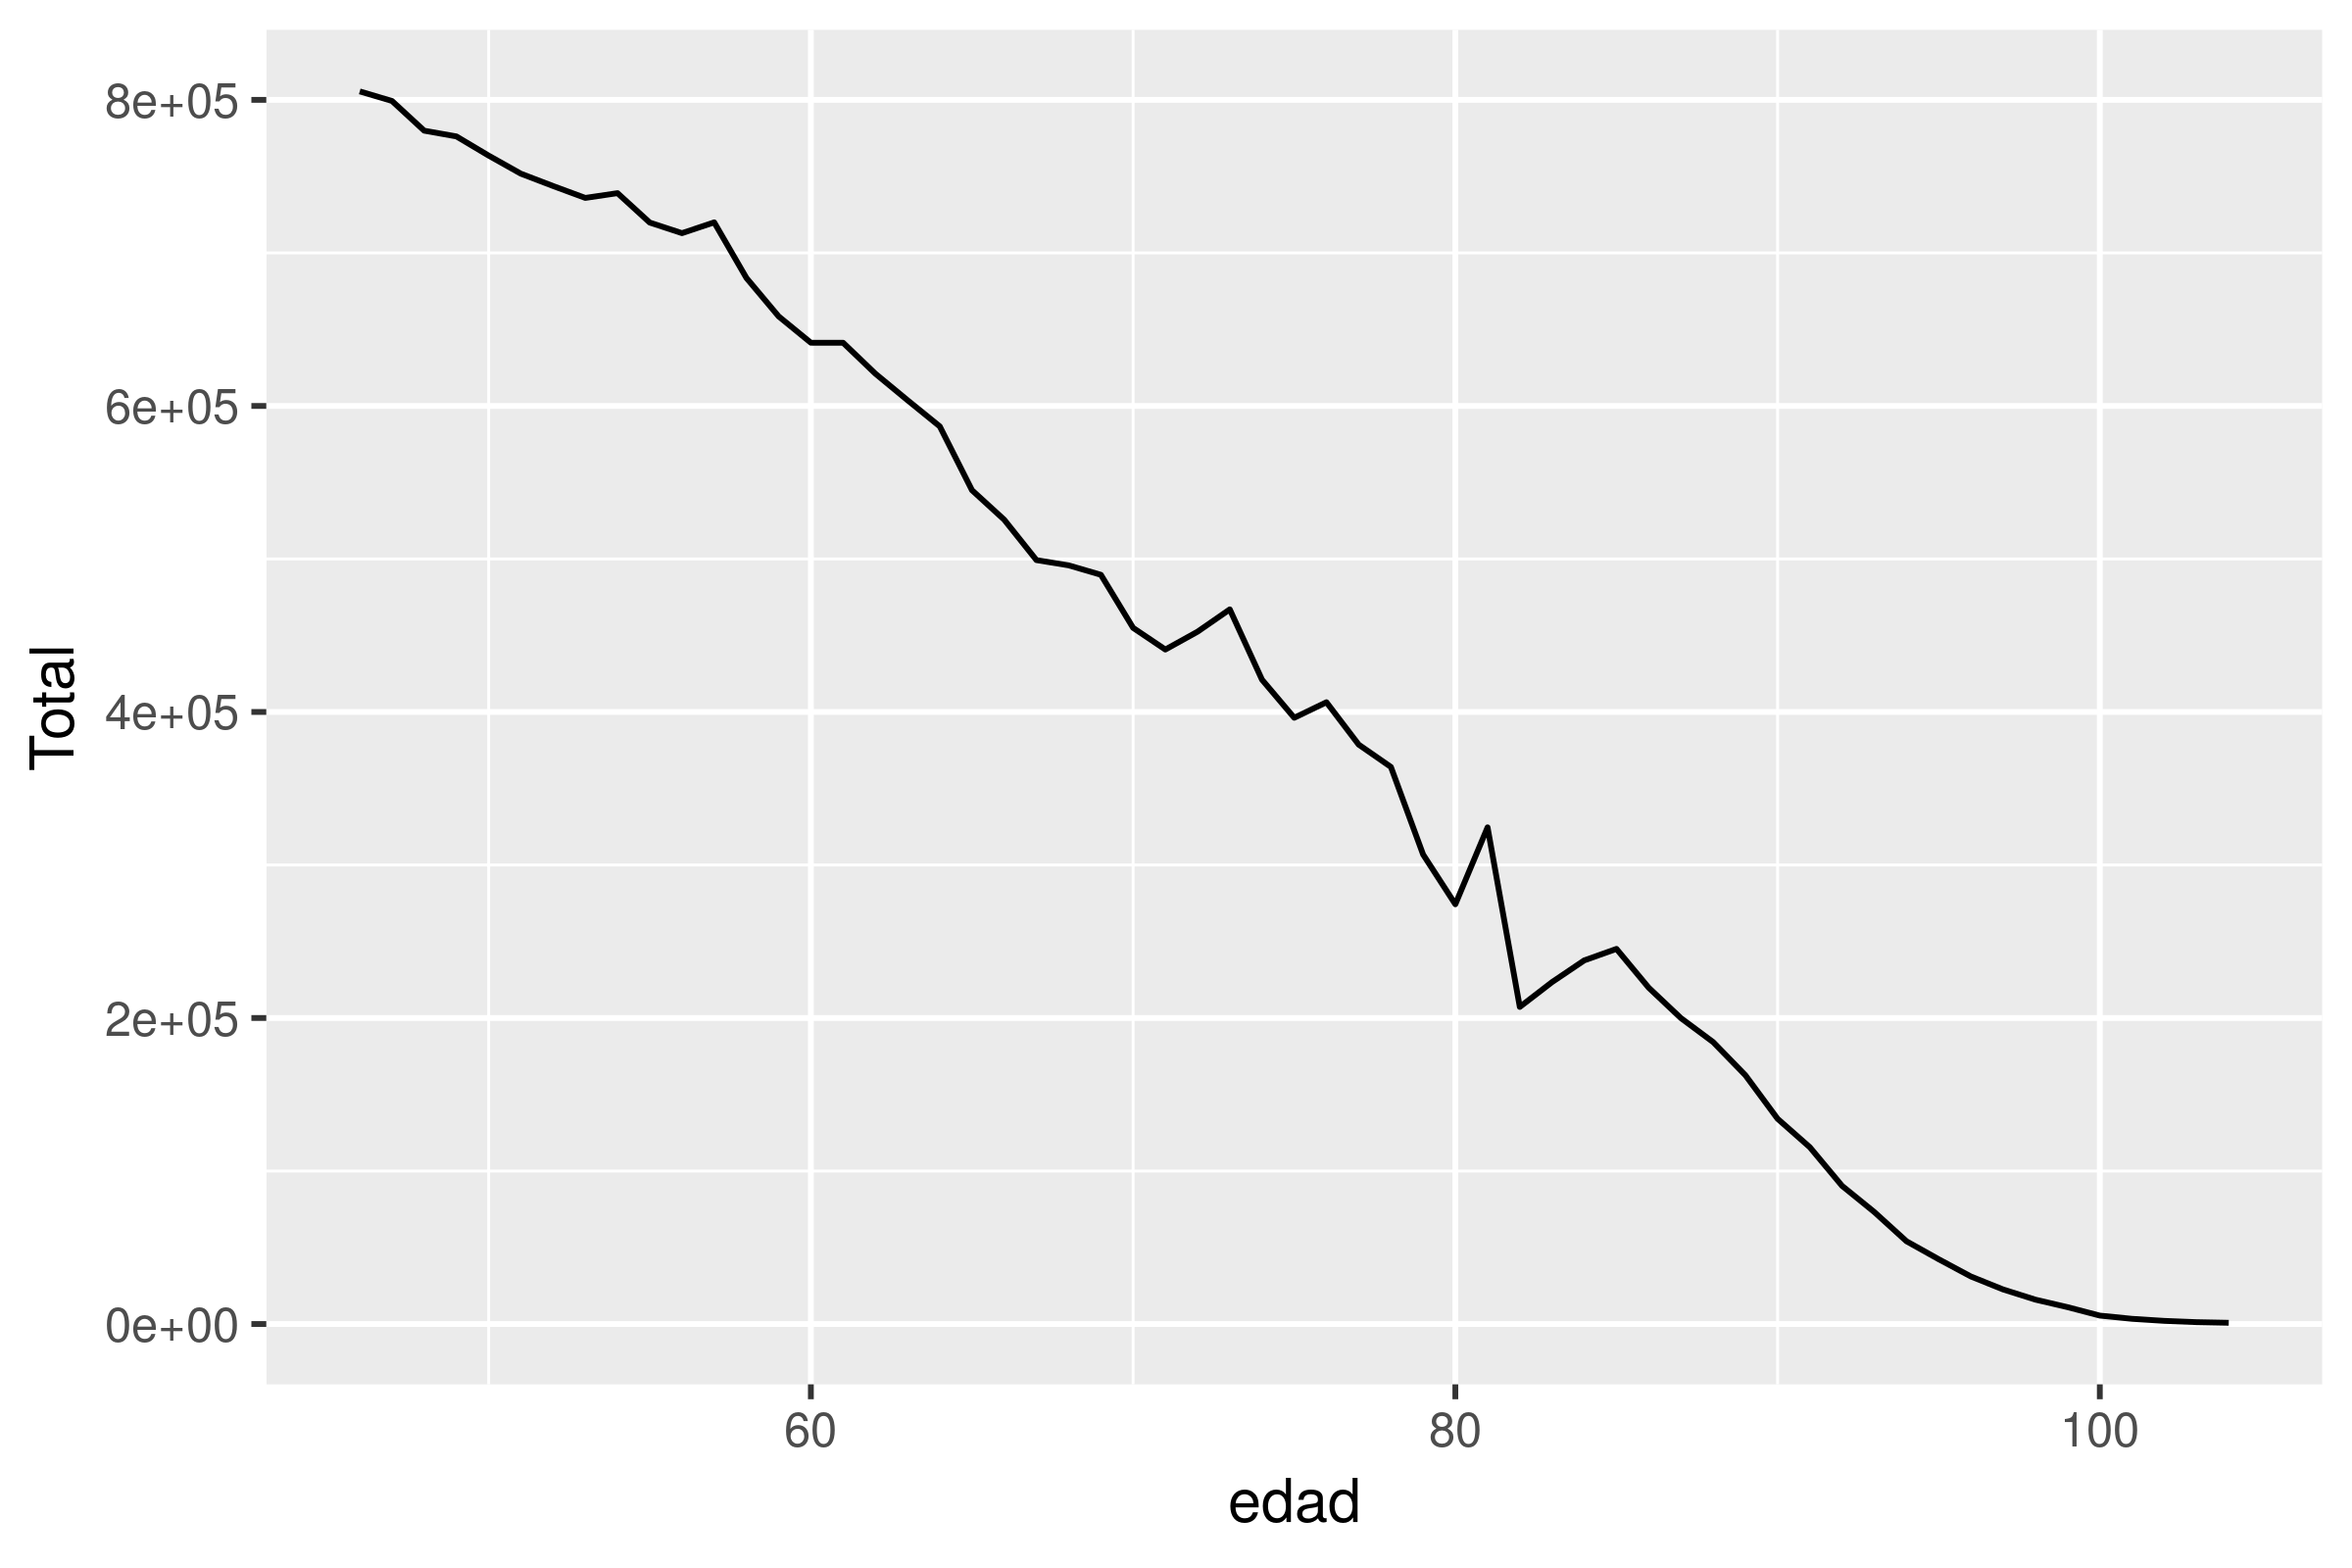

In [129]:
ggplot(data=poblacion,aes(x=edad,y=Total))+geom_line()

model<-lm(data=poblacion,Total~poly(edad,12))
#model<-lm(data=poblacion,Total~edad+I(edad^2)+I(edad^3)+I(edad^4)+I(edad^5)+I(edad^6)+I(edad^7)+I(edad^8)+I(edad^9)+I(edad^11))
summary(model)

In [130]:
library(MASS)
model_optim<-stepAIC(model,trace=FALSE,direction = "both")
model_optim


Call:
lm(formula = Total ~ poly(edad, 12), data = poblacion)

Coefficients:
     (Intercept)   poly(edad, 12)1   poly(edad, 12)2   poly(edad, 12)3  
          389997          -2055411             -3407            145215  
 poly(edad, 12)4   poly(edad, 12)5   poly(edad, 12)6   poly(edad, 12)7  
           28032             53301             18536            -31540  
 poly(edad, 12)8   poly(edad, 12)9  poly(edad, 12)10  poly(edad, 12)11  
           15385            -15750            -41827             25501  
poly(edad, 12)12  
           44000  


In [131]:
model<-lm(data=poblacion,Total~edad+I(edad^2)+I(edad^3)+I(edad^4)+I(edad^5)+I(edad^6)+I(edad^7)+I(edad^8)+I(edad^9))
summary(model)


Call:
lm(formula = Total ~ edad + I(edad^2) + I(edad^3) + I(edad^4) + 
    I(edad^5) + I(edad^6) + I(edad^7) + I(edad^8) + I(edad^9), 
    data = poblacion)

Residuals:
   Min     1Q Median     3Q    Max 
-70190  -7661   1047  10008  41863 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  7.927e+08  6.795e+08   1.167    0.249
edad        -8.784e+07  7.794e+07  -1.127    0.265
I(edad^2)    4.202e+06  3.869e+06   1.086    0.283
I(edad^3)   -1.132e+05  1.085e+05  -1.043    0.302
I(edad^4)    1.882e+03  1.883e+03   0.999    0.322
I(edad^5)   -1.976e+01  2.069e+01  -0.955    0.344
I(edad^6)    1.282e-01  1.406e-01   0.911    0.367
I(edad^7)   -4.697e-04  5.408e-04  -0.869    0.389
I(edad^8)    7.455e-07  9.010e-07   0.827    0.412
I(edad^9)           NA         NA      NA       NA

Residual standard error: 18590 on 50 degrees of freedom
Multiple R-squared:  0.9959,	Adjusted R-squared:  0.9953 
F-statistic:  1537 on 8 an

Warning message in predict.lm(model, poblacion):
“prediction from a rank-deficient fit may be misleading”


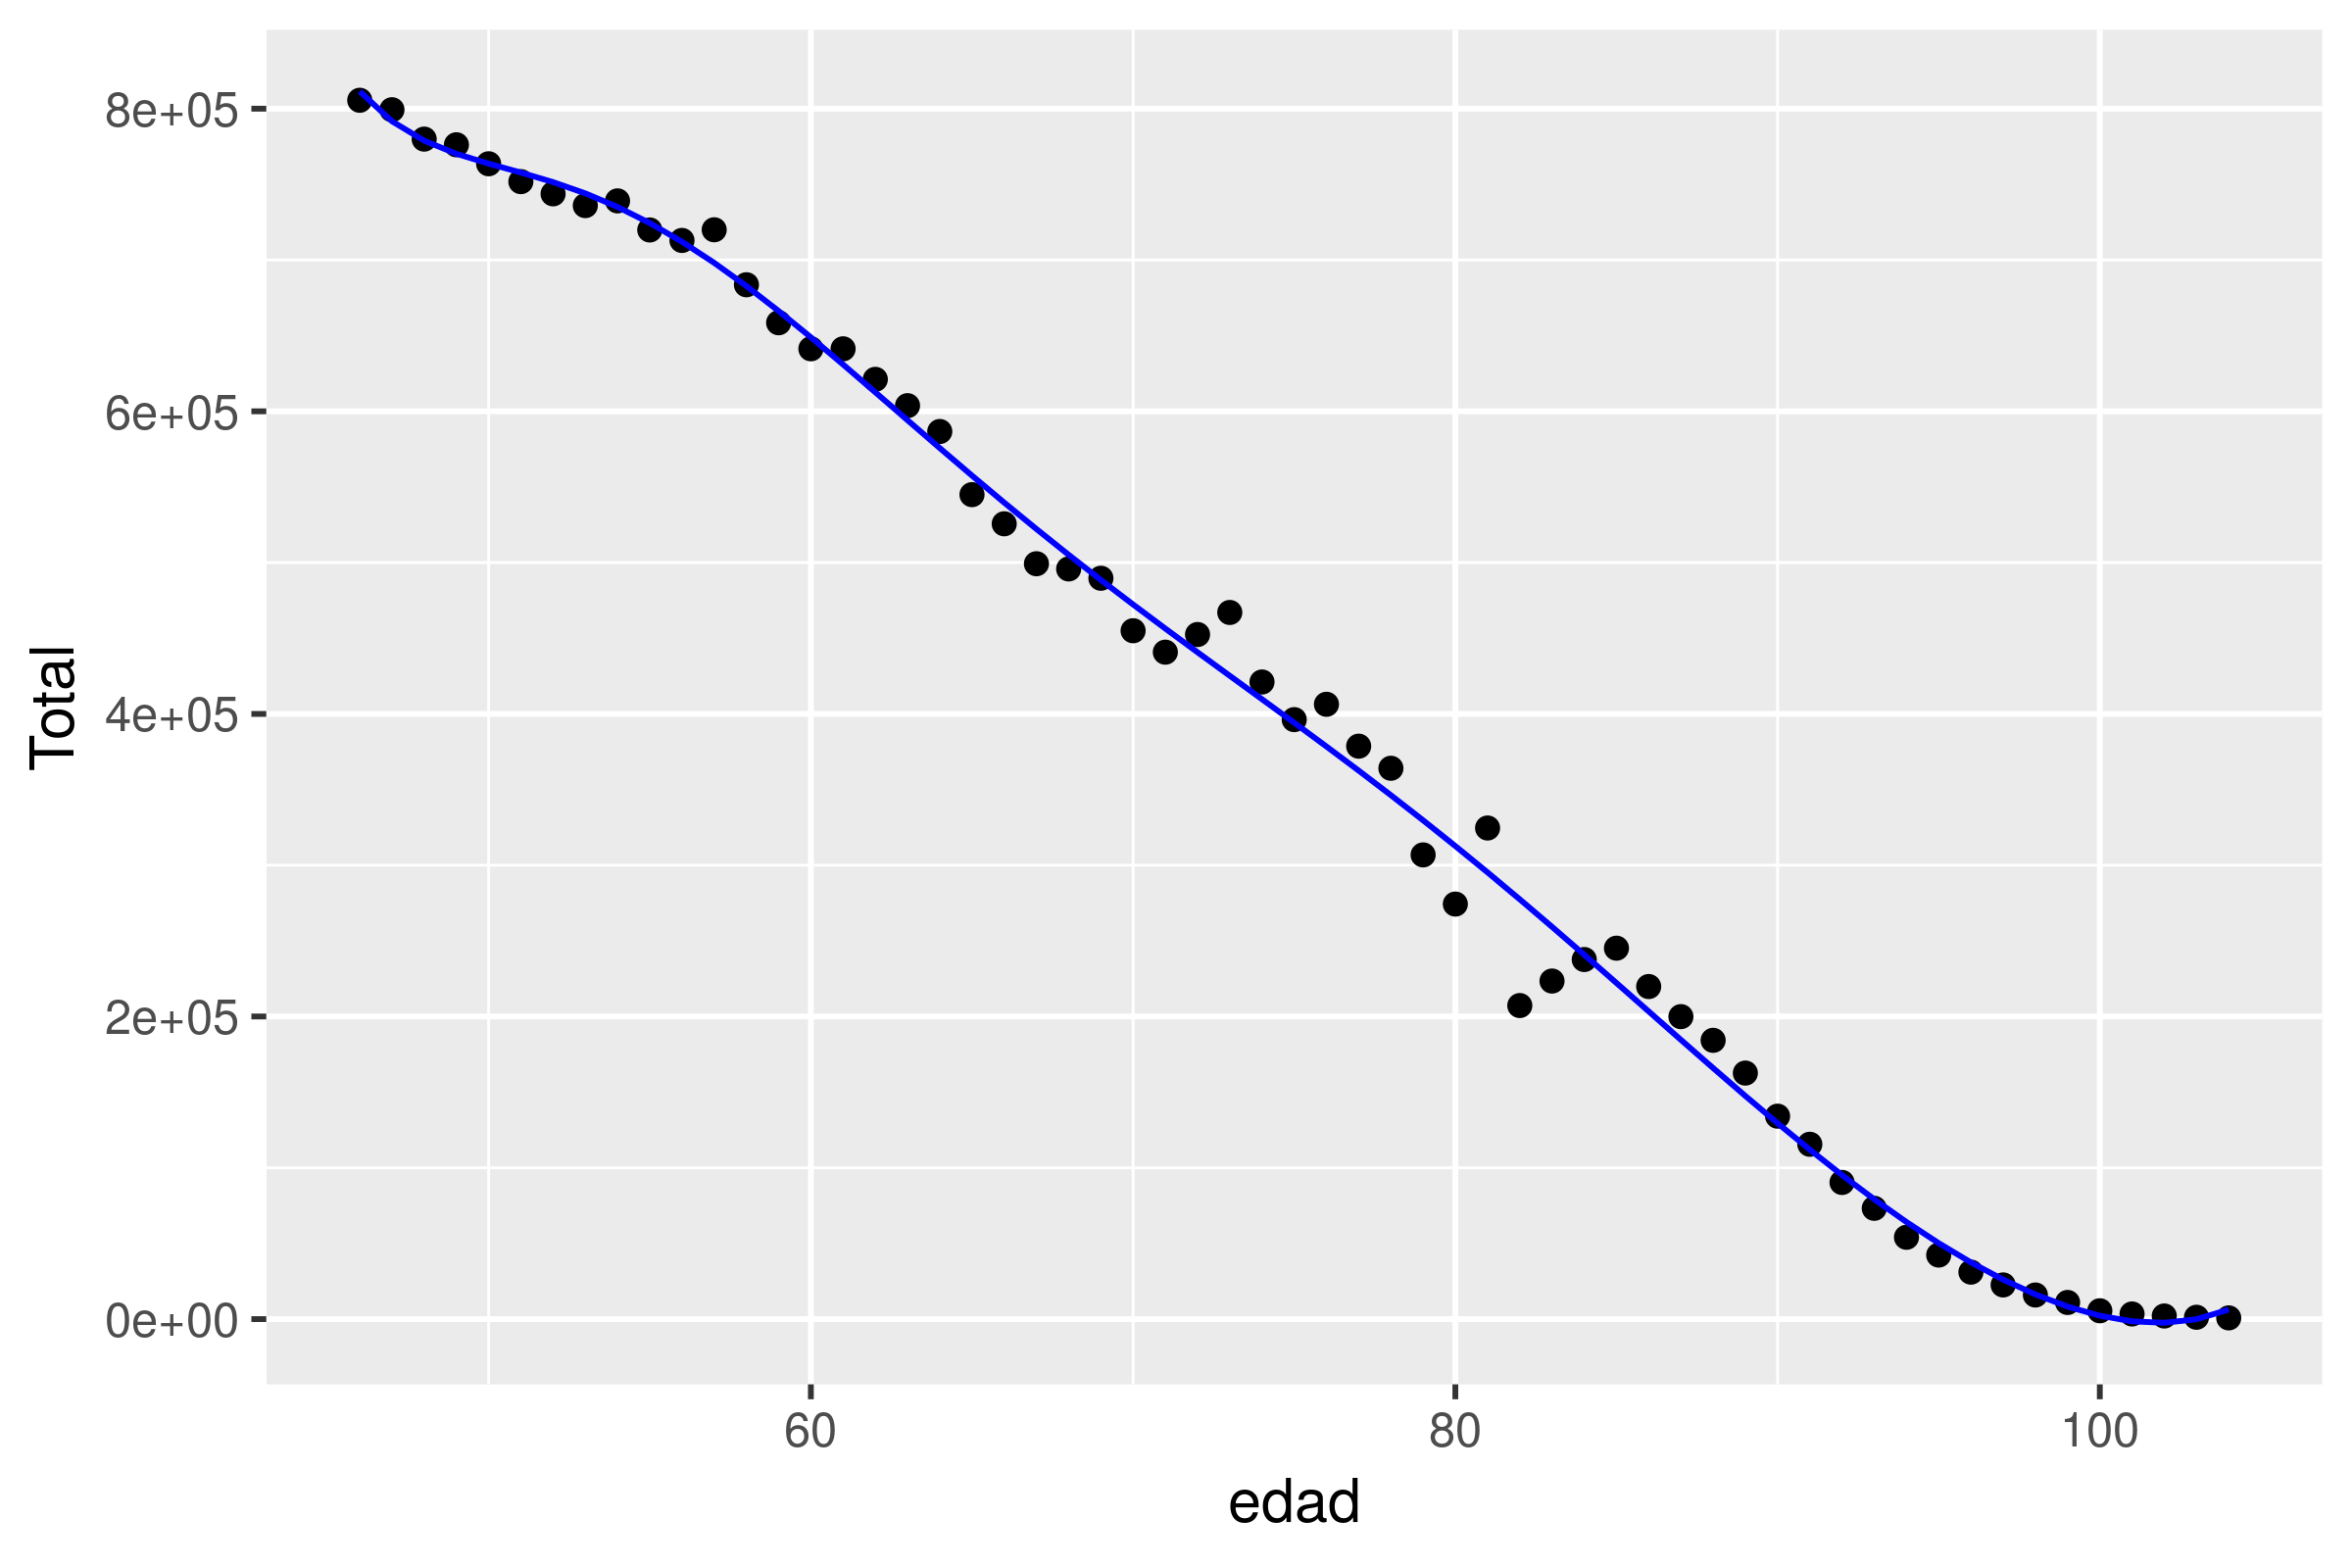

In [132]:
poblacion$predicted <- predict(model,poblacion)
ggplot(data=poblacion,aes(x=edad))+geom_point(aes(y=Total))+
 geom_line(aes(y=predicted),color="blue")


Pero si nos fijamos con detenimiento en el residuo, la diferencia entre el valor real y el esperado, podemos ver como todavía hoy se puede ver que los primero años de la postguerra hubo menos nacimientos.

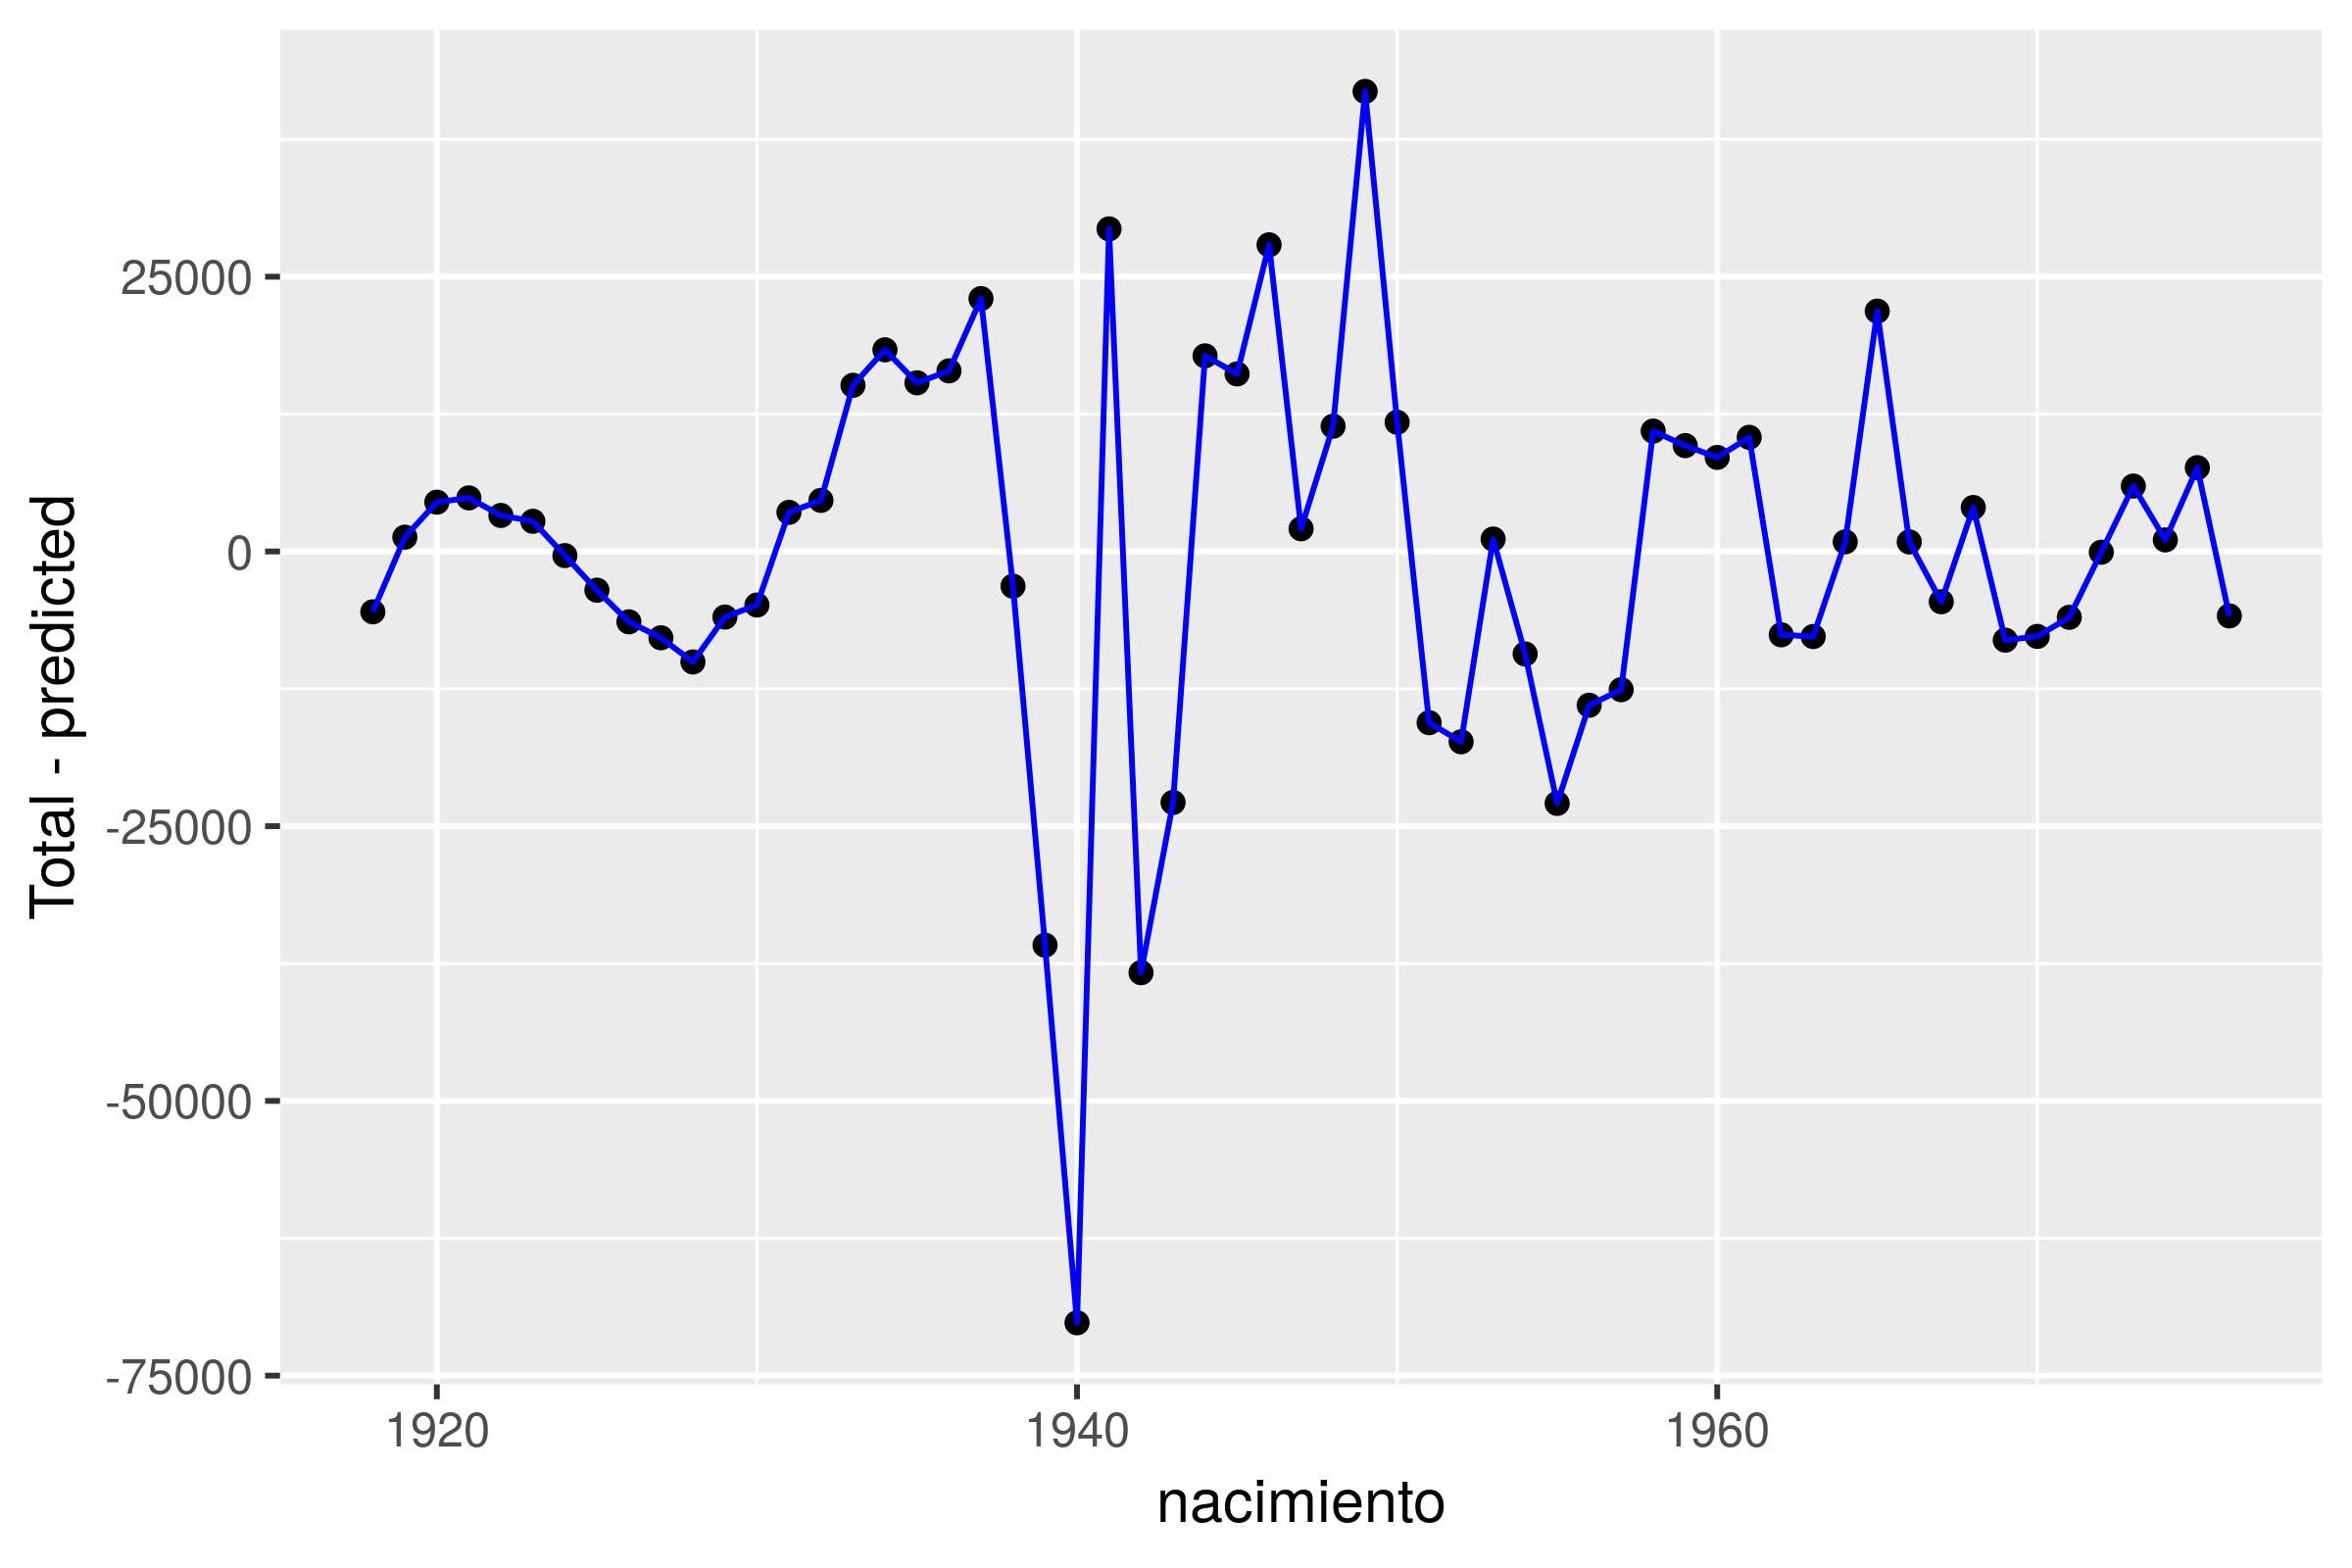

In [133]:
ggplot(data=poblacion,aes(x=nacimiento,y=Total-predicted))+geom_point(color="black")+
 geom_line(color="blue")


### Regresión con variables categóricas



Dataset de automóviles y seguros.

https://archive.ics.uci.edu/ml/datasets/Automobile

In [17]:
autos<-read.csv("./data//imports-85.data", col.names = c("risk", "normalized_losses", 
                                                         "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"), stringsAsFactor=T)
autos<-autos[,c("price","horsepower","length","width","body_style","risk")]
autos$horsepower[autos$horsepower=="?"]<-NA
autos$horsepower<-as.numeric(autos$horsepower)
autos$price<-as.numeric(autos$price)

In [18]:
levels(autos$body_style)

[1] "convertible" "hardtop"     "hatchback"   "sedan"       "wagon"

In [19]:
aggregate(risk~body_style,autos,mean,na.rm=TRUE)

body_style,risk
<fct>,<dbl>
convertible,2.8000000
hardtop,1.8750000
hatchback,1.5857143
sedan,0.3333333
wagon,-0.1600000


In [20]:
table(autos$body_style)


convertible     hardtop   hatchback       sedan       wagon 
          5           8          70          96          25 

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”


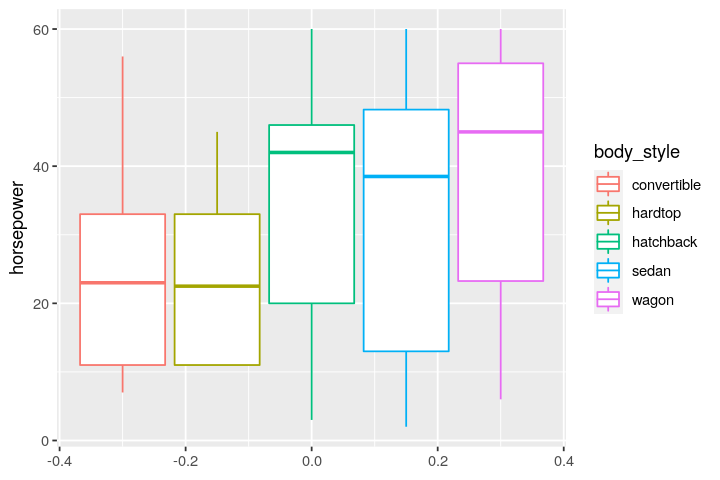

In [21]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)
ggplot(autos,aes(y=horsepower,color=body_style))+geom_boxplot()

In [24]:
model<-(lm(formula=risk ~ horsepower+body_style,data=autos))
summary(model)


Call:
lm(formula = risk ~ horsepower + body_style, data = autos)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5333 -0.5151 -0.1145  0.7599  1.8353 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.017807   0.452017   6.676 2.46e-10 ***
horsepower          -0.008377   0.003832  -2.186   0.0300 *  
body_stylehardtop   -0.944896   0.562116  -1.681   0.0944 .  
body_stylehatchback -1.150844   0.457701  -2.514   0.0127 *  
body_stylesedan     -2.409074   0.453005  -5.318 2.85e-07 ***
body_stylewagon     -2.854971   0.487344  -5.858 1.95e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9859 on 196 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.3846,	Adjusted R-squared:  0.3689 
F-statistic:  24.5 on 5 and 196 DF,  p-value: < 2.2e-16


```
Para convertible: risk = 3.017 - 0.008377*horsepower 
Para hardtop: risk = 3.017 - 0.008377*horsepower - 0.944896
Para hatchback: risk = 3.017 - 0.008377*horsepower -1.150844
Para sedan:  risk = 3.017 - 0.008377*horsepower -2.409074
Para wagon:  risk = 3.017 - 0.008377*horsepower -2.854971
```

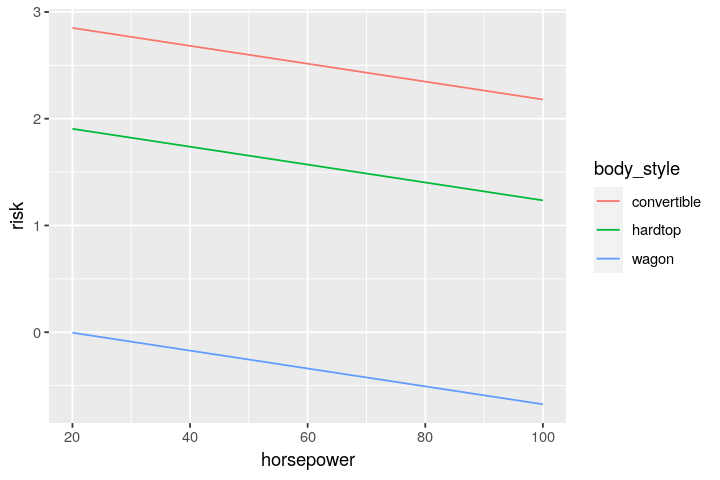

In [32]:
hp <- 20:100
df_input <- rbind(
data.frame(horsepower=hp, body_style='hardtop'),
data.frame(horsepower=hp, body_style='convertible'),
data.frame(horsepower=hp, body_style='wagon')
)
df_input$risk <- predict(model, df_input)
ggplot(df_input, aes(x=horsepower, y=risk, color=body_style))+geom_line()

In [26]:
predict(model,data.frame(horsepower=20,body_style='hardtop'))

1 
1.905367

In [27]:
predict(model,data.frame(horsepower=20,body_style='convertible'))

1 
2.850263

In [25]:
predict(model,data.frame(horsepower=20,body_style='hardtop'))-
predict(model,data.frame(horsepower=20,body_style='convertible'))

1 
-0.9448958

# Clasificación - Regresión logística

Si lo que tenemos son dos grupos y queremos realizar una clasificación, tenemos que realizar ciertas modificaciones a la regresión lineal.




La fórmula de la regresión lineal es:
\\[
\hat{Y}=\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p = \sum \beta_k X_k
\\]

Podemos tratar de asignar una probabilidad 

Pero hay un problema porque esta regresión va entre 


Por ejemplo: Trabajamos en un maderera y queremos saber si un tronco es de un abedul o de un abeto basándonos únicamente en el diametro y la longitud del tronco.



In [ ]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

arboles<-read.csv("data/arboles.csv")
ggplot(arboles,aes(x=diametro,y=longitud,color=especie))+geom_point(size=0.3)

Podemos hacer una clasificación con un modelo lineal donde creamos una nueva columna *especie.n* y le asignamos:
* abeto  = 1
* abedul = -1

Utilizamos un modelo lineal tal que:
\\[
  especie = \beta_0+\beta_1·diametro+\beta_2·longitud
\\]

Entonces:
* si especie >= 0 es un abeto
* si especie <  0es un abedul

La recta que marcará el umbral será:
\\[
\begin{split}    
  0 &= \beta_0+\beta_1·diametro+\beta_2·longitud \\
  -\beta_2 longitud &= \beta_0+\beta_1·diametro\\
  longitud &= \frac{-\beta_0}{\beta_2}-\frac{\beta_1}{\beta_2}·diametro
\end{split}  
\\]



In [ ]:
arboles$especie.n[arboles$especie=="abeto"] <-   1
arboles$especie.n[arboles$especie=="abedul"]<-  -1

itrain<-sample(1:nrow(arboles),round(nrow(arboles)*0.7))
arboles.train<-arboles[itrain,]
arboles.test<-arboles[-itrain,]


modellm<-lm(data=arboles.train,formula=especie.n~diametro+longitud)
beta<-modellm$coefficients

ggplot(arboles.train,aes(x=diametro,y=longitud,color=especie))+geom_point(size=0.3)+
 geom_abline(intercept = -beta[1]/beta[3],slope = -beta[2]/beta[3], color="red" )

Pero esto no es del todo correcto porque los datos **NO** siguen una distribución gaussiana. 
Cada iteración, cada línea del dataframe, cada árbol medido, podría seguir una distribución de bernoulli.
Es un abeto con probabilidad p o es un abedul con probabilidad (1-p). Esto se puede generalizar con una distribución binomial que indique la probabilidad de que n troncos sean abedules.


Para pasar del dominio de números reales $(-\infty,\infty)$ al de probabilidades $[0,1]$ a vamos a utilizar la **función logística**:
\\[
h(x) = \frac{1}{1+e^{-x}}
\\]
Su inversa se conoce como la función **logit**:
\\[
h^{-1}(p) = log \left( \frac{p}{1-p} \right)
\\]

In [ ]:
x<-seq(-10,10,length.out = 100)
y<-1/(1+exp(-x))
plot(x,y,t="l")

Es decir, tenemos una probabilidad, su valor está en el rango $[0,1]$:
\\[
    p = \frac{1}{1-e^{-\hat{Y}}}= \frac{1}{1-e^{-(\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p)}}   
\\]

Definimos la razón de monomios (Odds ratio) como el cociente entre dos probabilidades, su valor está en el rango $[0,\infty]$:
\\[
 Odds = \frac{p}{1-p}=\frac{\frac{1}{1-e^{-(\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p)}}}{\frac{e^{-(\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p)}}{1-e^{-(\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p)}}}=e^{(\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p)}
\\]

Si aplicamos el logaritmo a la razón de monomios tenemos un valor que está en el rango $[-\infty,\infty]$:
\\[
 log(Odds) = \beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p
\\]



Podemos repetir el ejercicio de antes poniendo el umbral en 0 igualmente pero con regresión logística:

In [ ]:
model<-glm(data=arboles.train,formula=especie~diametro+longitud,family=binomial(link='logit'))
betalg<-model$coefficients

ggplot(arboles.train,aes(x=diametro,y=longitud,color=especie))+geom_point(size=0.3)+
 geom_abline(intercept = -beta[1]/beta[3],slope = -beta[2]/beta[3], color="red" )    +
 geom_abline(intercept = -betalg[1]/betalg[3],slope = -betalg[2]/betalg[3], color="blue" )    

### Ejemplo: Peso de los niños al nacer

Este dataset contien información de bebes recien nacidos y sus padres. 
Podemos usarlo como clasificación para ver cuales son los factores que más afectan al niño en función de si la madre es o no fumadora.

Tenemos las siguientes variables que vamos a utilizar:

|Nombre|Variable|
|-|-|
|Birthweight| Peso al nacer (libras)|
|Gestation| Semanas que duró la gestación|
|motherage| Edad de la madre|
|smoker| Madre fumadora 0/1|


In [ ]:
bwt<-read.csv("data/birthweight_reduced.csv")
bwt$smoker <- factor(bwt$smoker,labels=c("No","Yes"))
str(bwt)

In [ ]:
model <- glm(data=bwt, formula = smoker~Birthweight + Gestation, family=binomial())
summary(model)

In [ ]:
betalg <- model$coefficients
ggplot(data=bwt, aes(x=Birthweight ,y=Gestation, color=smoker))+geom_point()+
 geom_abline(intercept=-betalg[1]/betalg[3], slope=-betalg[2]/betalg[3],color="blue")

Vemos que el valor que más influye en si la madre es fumadora o no es en el peso del niño al nacer. No parece que afecte mucho al tiempo de gestación.

Podemos calcular la probabilidad de que la madre sea fumadora mirando el peso del niño y los coeficientes de la regresión logística:
\\[
    p = \frac{1}{1-e^{-\hat{Y}}}= \frac{1}{1-e^{-(\beta_0+\beta_1 · peso)}}   
\\]


In [ ]:
model <- glm(data=bwt, formula = smoker~Birthweight , family=binomial())
model$coefficients

peso<-seq(4,10,length.out=100)
p <- 1/(1+exp(-(model$coefficients[1]+peso*model$coefficients[2])))
plot(peso,p,t="l",xlab="Peso del niño")

In [ ]:
pesoLibras <- 5
pesoKg <- pesoLibras*0.453592
ods <- predict(model,data.frame(Birthweight=pesoLibras))
print(paste("Para un peso de",pesoKg,"Kg es",exp(ods),
            "veces más probable que la madre sea fumadora"))
print(paste("Para un peso de",pesoKg,
            "Kg la probabilidad de que la madre sea fumadora es de",exp(ods)/(1+exp(ods))))


Otra forma de verlo es decir que cada libra que pesa el niño, la razón de probabilidades  de que la madre se fumadora respecto a la que no lo es:
\\[
log(\frac{p}{1-p})=\beta_0+\beta_1 · peso
\\]
\\[
\frac{p}{1-p}=e^{\beta_0}·e^{\beta_1 · peso}
\\]
Por cada unidad que aumenta el peso, el la razón de probabilidades aumenta $e^{\beta_1}$

In [ ]:
peso1 <- 9
peso2 <- 10

p1 <- 1/(1+exp(-(model$coefficients[1]+peso1*model$coefficients[2])))
p2 <- 1/(1+exp(-(model$coefficients[1]+peso2*model$coefficients[2])))

(p2/(1-p2))/(p1/(1-p1))

In [ ]:
exp(model$coefficients[2])

### Censo

Dataset de: https://archive.ics.uci.edu/ml/datasets/adult

* age: continuous. 
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* fnlwgt: continuous. 
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* education-num: continuous. 
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
* sex: Female, Male. 
* capital-gain: continuous. 
* capital-loss: continuous. 
* hours-per-week: continuous. 
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [ ]:
adult<-read.csv("data/adult.data.txt",
                col.names=c("age","workclass","fnlwgt","education","education-num","marital-status",
                           "occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week",
                           "native-country","50k"), stringsAsFactor=T)

str(adult)

In [ ]:
levels(adult$education)
numlevels<-length(levels(adult$education))
adult$education<-factor(adult$education,levels(adult$education)[c(4,5,6,7,1,2,3,8:numlevels)])

In [ ]:
levels(adult$education)


In [ ]:
model <- glm(data=adult, formula=X50k ~ age+education+sex, family = binomial())
model

In [ ]:
paste("Un hombre tiene ",exp(model$coefficients["sex Male"]),"veces más posibilidades de ganar más de 50k$ que una mujer")


In [ ]:
paste("Cada año que pasa hay ",exp(model$coefficients["age"]),"veces más posibilidades de ganar más de 50k$")


In [ ]:
paste("Una persona con Master tiene ",exp(model$coefficients["education Masters"]),"veces más posibilidades de ganar más de 50k$ que alguien con solo 1st-4th")

In [ ]:
adult_master<-subset(adult,education==" Masters")
model <- glm(data=adult_master, formula=X50k ~ age+sex, family = binomial())
summary(model)

In [ ]:
model <- glm(data=adult_master, formula=X50k ~ age*sex, family = binomial())
summary(model)

In [ ]:
confint(model)

## Dataset Anscombe

Este dataset nos muestra que no nos podemos fiar simplemente por los estimadores de las variables, la representación gráfica nos proporciona una visión más completa.

Existen datasets similares como el datasaurio:
https://www.autodesk.com/research/publications/same-stats-different-graphs

In [33]:
library(datasets)
anscombe

x1,x2,x3,x4,y1,y2,y3,y4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,10,10,8,8.04,9.14,7.46,6.58
8,8,8,8,6.95,8.14,6.77,5.76
13,13,13,8,7.58,8.74,12.74,7.71
9,9,9,8,8.81,8.77,7.11,8.84
11,11,11,8,8.33,9.26,7.81,8.47
14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,8,7.24,6.13,6.08,5.25
4,4,4,19,4.26,3.10,5.39,12.50
12,12,12,8,10.84,9.13,8.15,5.56


In [34]:
mean(anscombe$y1)
mean(anscombe$y2)
mean(anscombe$y3)
mean(anscombe$y4)

[1] 7.500909

[1] 7.500909

[1] 7.5

[1] 7.500909

In [35]:
var(anscombe$y1)
var(anscombe$y2)
var(anscombe$y3)
var(anscombe$y4)

[1] 4.127269

[1] 4.127629

[1] 4.12262

[1] 4.123249

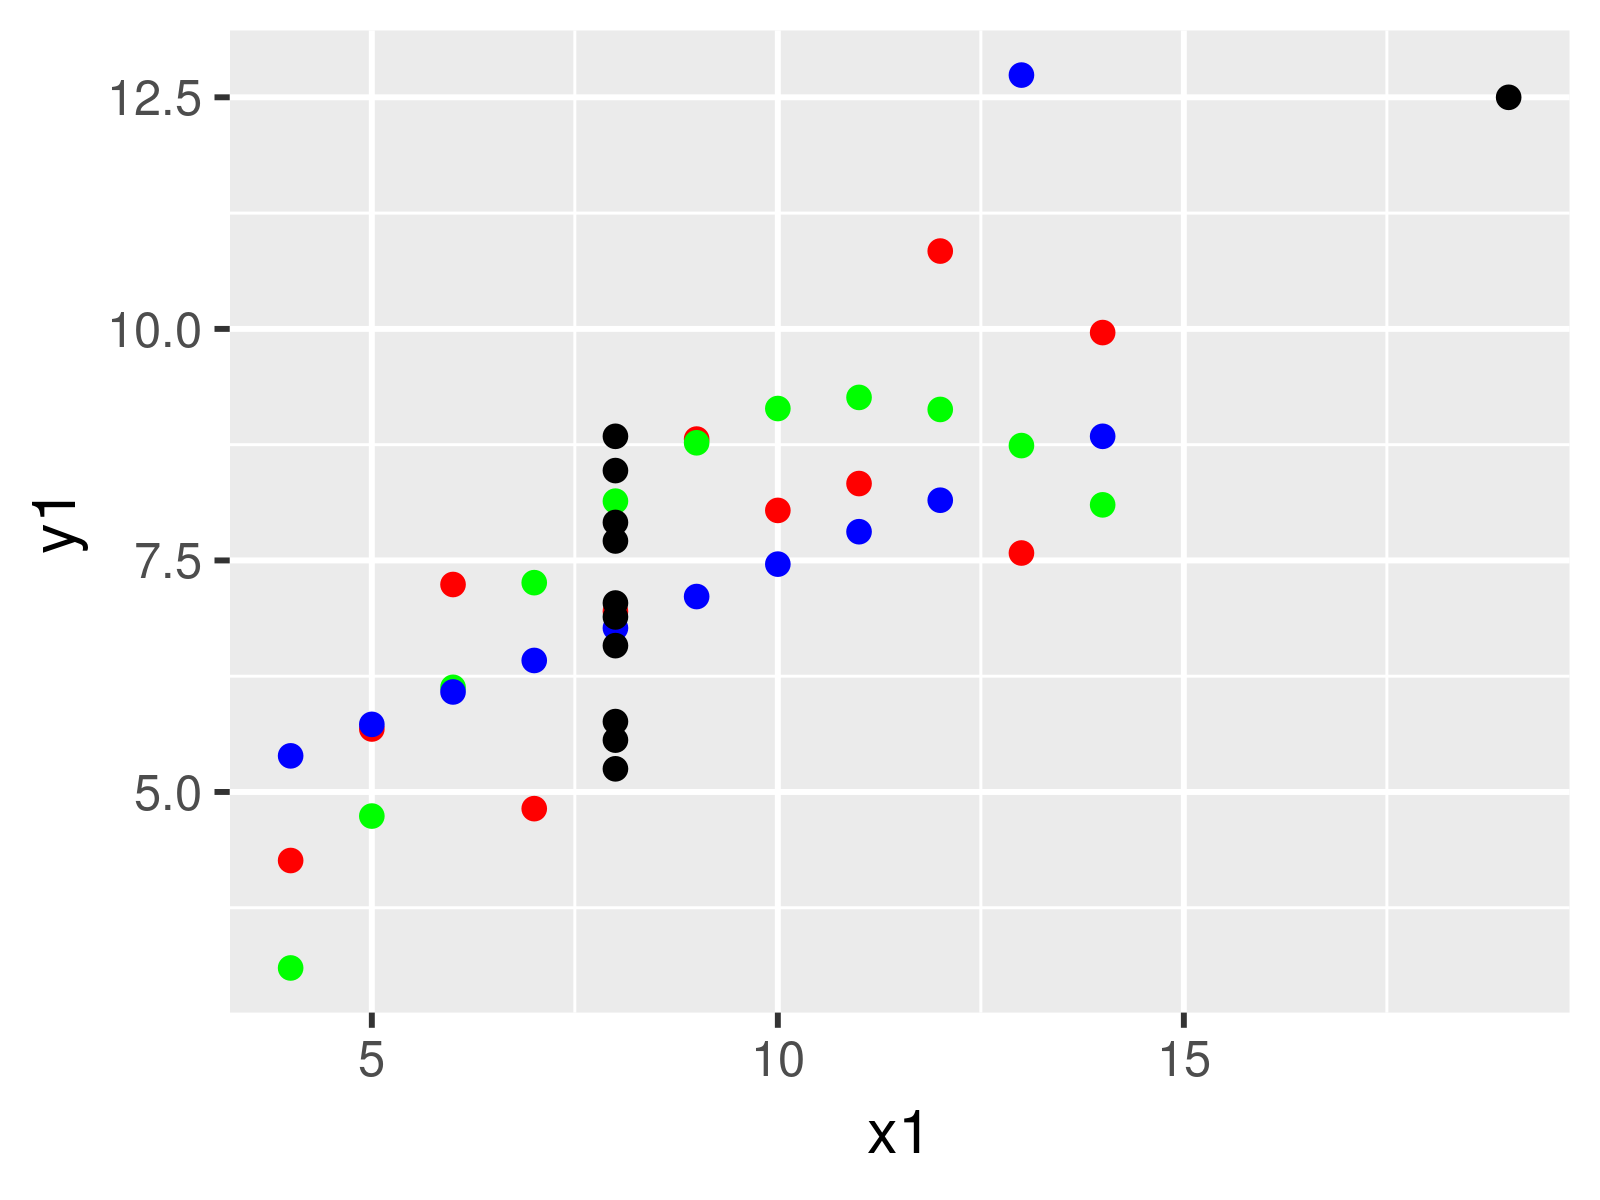

In [36]:
library(ggplot2)
options(repr.plot.height=3,repr.plot.width=4 , repr.plot.res = 400)

ggplot(anscombe)+
 geom_point(aes(x=x1,y=y1),color="red")+
 geom_point(aes(x=x2,y=y2),color="green")+
 geom_point(aes(x=x3,y=y3),color="blue")+
 geom_point(aes(x=x4,y=y4),color="black")

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



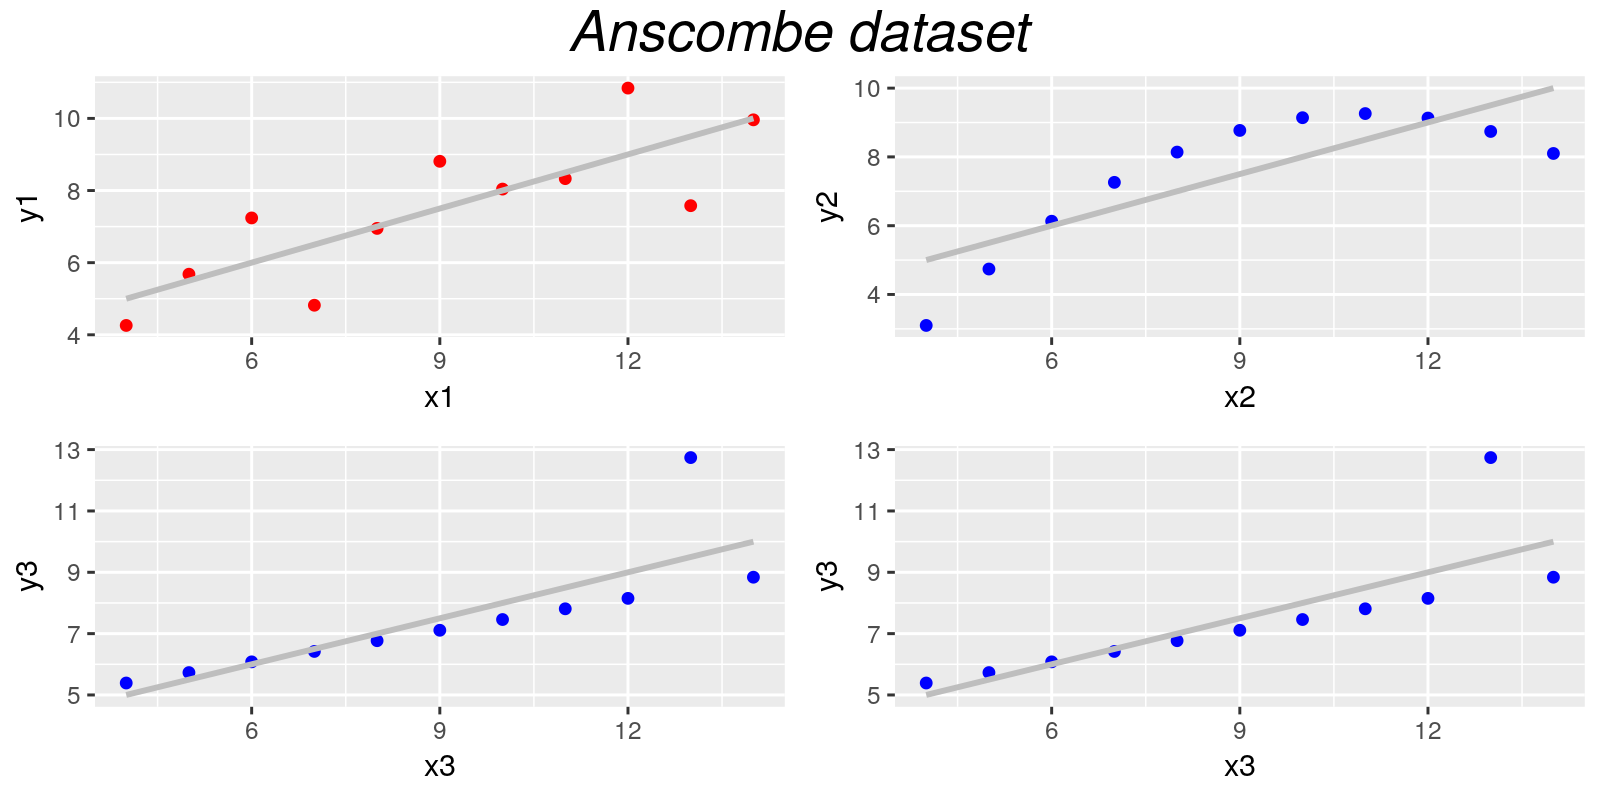

In [37]:
library(grid)
library(gridExtra)
options(repr.plot.height=4,repr.plot.width=8 , repr.plot.res = 200)

g1<-ggplot(anscombe,aes(x=x1,y=y1))+geom_point(color="red")+geom_smooth(method="lm",color="grey",se=F)
g2<-ggplot(anscombe,aes(x=x2,y=y2))+geom_point(color="blue")+geom_smooth(method="lm",color="grey",se=F)
g3<-ggplot(anscombe,aes(x=x3,y=y3))+geom_point(color="blue")+geom_smooth(method="lm",color="grey",se=F)
g4<-ggplot(anscombe,aes(x=x4,y=y4))+geom_point(color="blue")+geom_smooth(method="lm",color="grey",se=F)
 

grid.arrange(g1, g2, g3, g3,nrow = 2,top = textGrob("Anscombe dataset",gp=gpar(fontsize=20,font=3)))

# Distribución conjunta

La distribución conjunta de dos variables A y B se refiere a la distribución de probabilidad de la intersección de ambos eventos.
Se representa como P(B,A) o  P(B $\cap$ A)

## Variables discretas


AVISO: ESTOS DATOS SON PURAMENTE INVENTADOS

Imagina que tenemos una tabla de contingencia que presenta el número de personas que les gusta Star Trek o StarWars función del sexo:

In [38]:
tbl<-as.table(matrix(c(122,58,214,120),dimnames = list(c("Star Trek","Star Wars"),c("Mujeres","Hombres")),nrow=2))
tbl

          Mujeres Hombres
Star Trek     122     214
Star Wars      58     120

**Probabilidad marginal**

En esta población, ¿Cual es la probabilidad de que a alguien le guste Star Wars?
\\[
P(\text{Star Wars})=\frac{58+120}{122+214+58+120}=0.34
\\]

In [40]:
print("La probabilidad de que a alguien le gusta Star Trek o Star Wars es:")
rowSums(tbl)/sum(tbl)

[1] "La probabilidad de que a alguien le gusta Star Trek o Star Wars es:"


Star Trek Star Wars 
0.6536965 0.3463035

**Probabilidad conjunta**

¿Cual es la probabilidad de que sea hombre y además le guste starwars?
o ¿Cual es la probabilidad de encontar a un hombre que le guste starwars?
\\[
 P(\text{Star Wars, Hombre})= P(\text{Hombre, Star Wars})=\frac{120}{122+214+58+120}=0.233
\\]

In [45]:
print("La matriz de la probabilidad conjunta es:")
prop.table(tbl)

[1] "La matriz de la probabilidad conjunta es:"


            Mujeres   Hombres
Star Trek 0.2373541 0.4163424
Star Wars 0.1128405 0.2334630

**Probabilidad condicional**

Suponiendo que nos fijemos solamente en los hombres, ¿cual es la probabilidad de que Star Wars sea la película más interesante?

\\[
P(\text{Star Wars|Hombre})=\frac{120}{214+120}=0.359
\\]


In [50]:
print("La matriz condicional para mujeres y hombres:")
prop.table(tbl,margin = 2)

[1] "La matriz condicional para mujeres y hombres:"


            Mujeres   Hombres
Star Trek 0.6777778 0.6407186
Star Wars 0.3222222 0.3592814

Suponiendo que nos fijemos solamente en los fans de Star Wars, ¿cual es la probabilidad de que el fan sea hombre?

\\[
P(\text{Hombre|Star Wars})=\frac{120}{120+58}=0.674
\\]

In [54]:
tbl

          Mujeres Hombres
Star Trek     122     214
Star Wars      58     120

In [57]:
rowSums(tbl)/sum(tbl)

Star Trek Star Wars 
0.6536965 0.3463035

In [52]:
print("La matriz condicional para Star Trek y Star Wars :")
prop.table(tbl,margin = 1)

[1] "La matriz condicional para Star Trek y Star Wars :"


            Mujeres   Hombres
Star Trek 0.3630952 0.6369048
Star Wars 0.3258427 0.6741573

**Propiedades**
\\[
\begin{split}
P(\text{Star Wars,Hombre})&=P(\text{Hombre,Star Wars}) \\
P(\text{Hombre,Star Wars})&=P(\text{Hombre|Star Wars})·P(\text{Star Wars}) \\
P(\text{Star Wars,Hombre})&=P(\text{Star Wars|Hombre})·P(\text{Hombre})
\end{split}
\\]

## Variables continuas

### Dos variables independientes

En este caso: 
P(B,A)=P(B)·P(A)

Es fácil verlo porque su matriz de covarianza se parece a una matriz diagonal.

[1] "Matriz de covarianza:"


,A,B
A,0.253722982,-0.003051751
B,-0.003051751,0.984632818


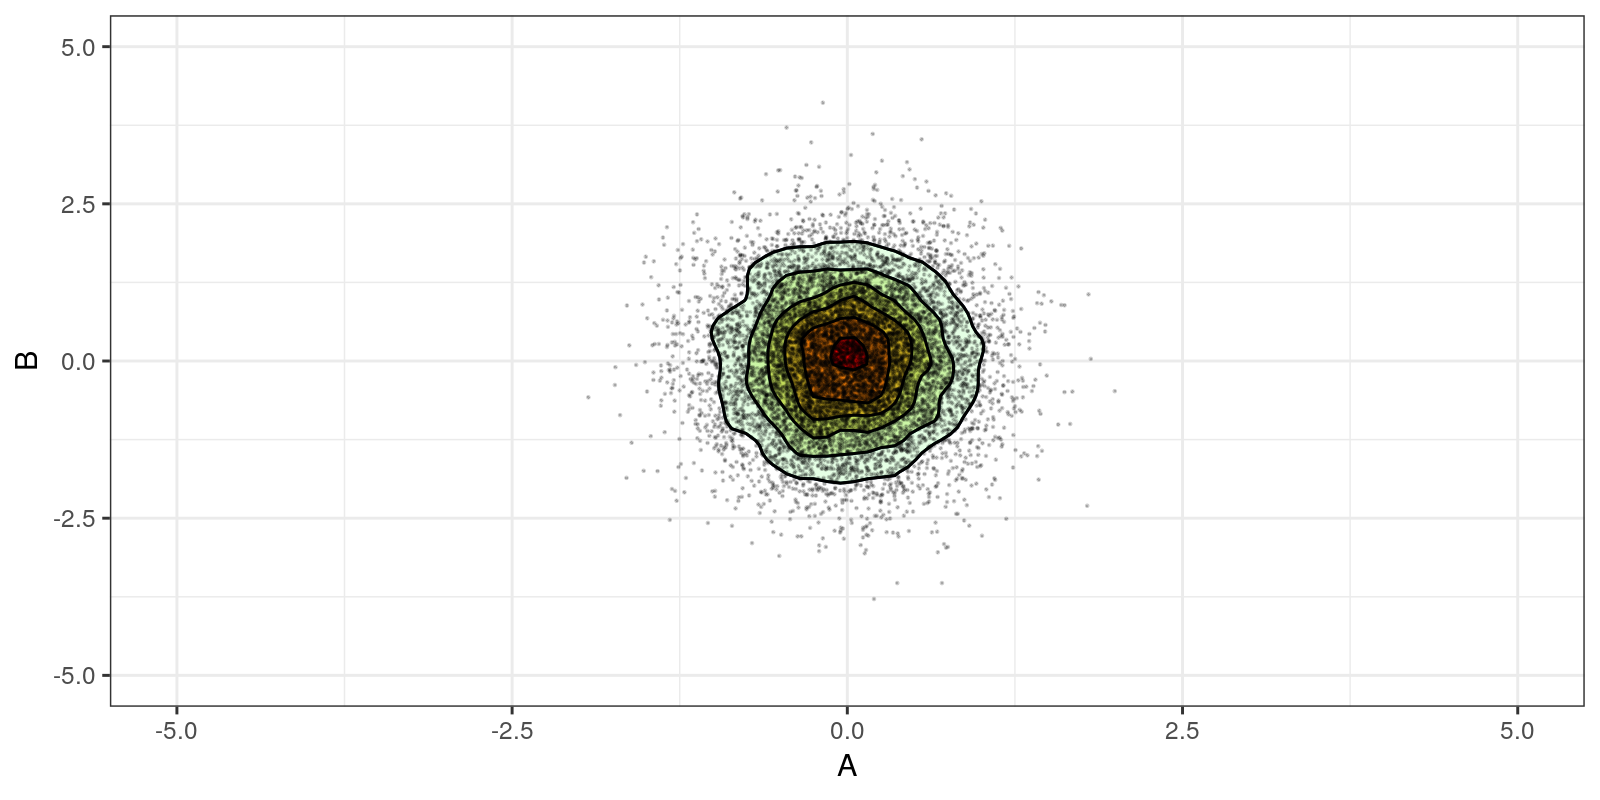

In [58]:
N<-10000
A<-rnorm(N,mean=0,sd=0.5)
B<-rnorm(N,mean=0,sd=1)
df<-data.frame(A,B)

print(paste("Matriz de covarianza:"))
cov(df)

library(ggplot2)
ggplot(df, aes(x=A, y=B))+geom_density2d(aes(colour=..level..)) + 
  stat_density2d(aes(fill=..level..,alpha=..level..),geom='polygon',colour='black') + 
  scale_fill_continuous(low="green",high="red") +    
  geom_point(alpha=0.2,size=0.1)+
  theme_bw()+theme(legend.position="none")+xlim(c(-5,5))+ylim(c(-5,5))

Como son independientes, la probabilidad condicional de B respecto a A es igual a la probabilidad de B

P(B|A)=P(B)

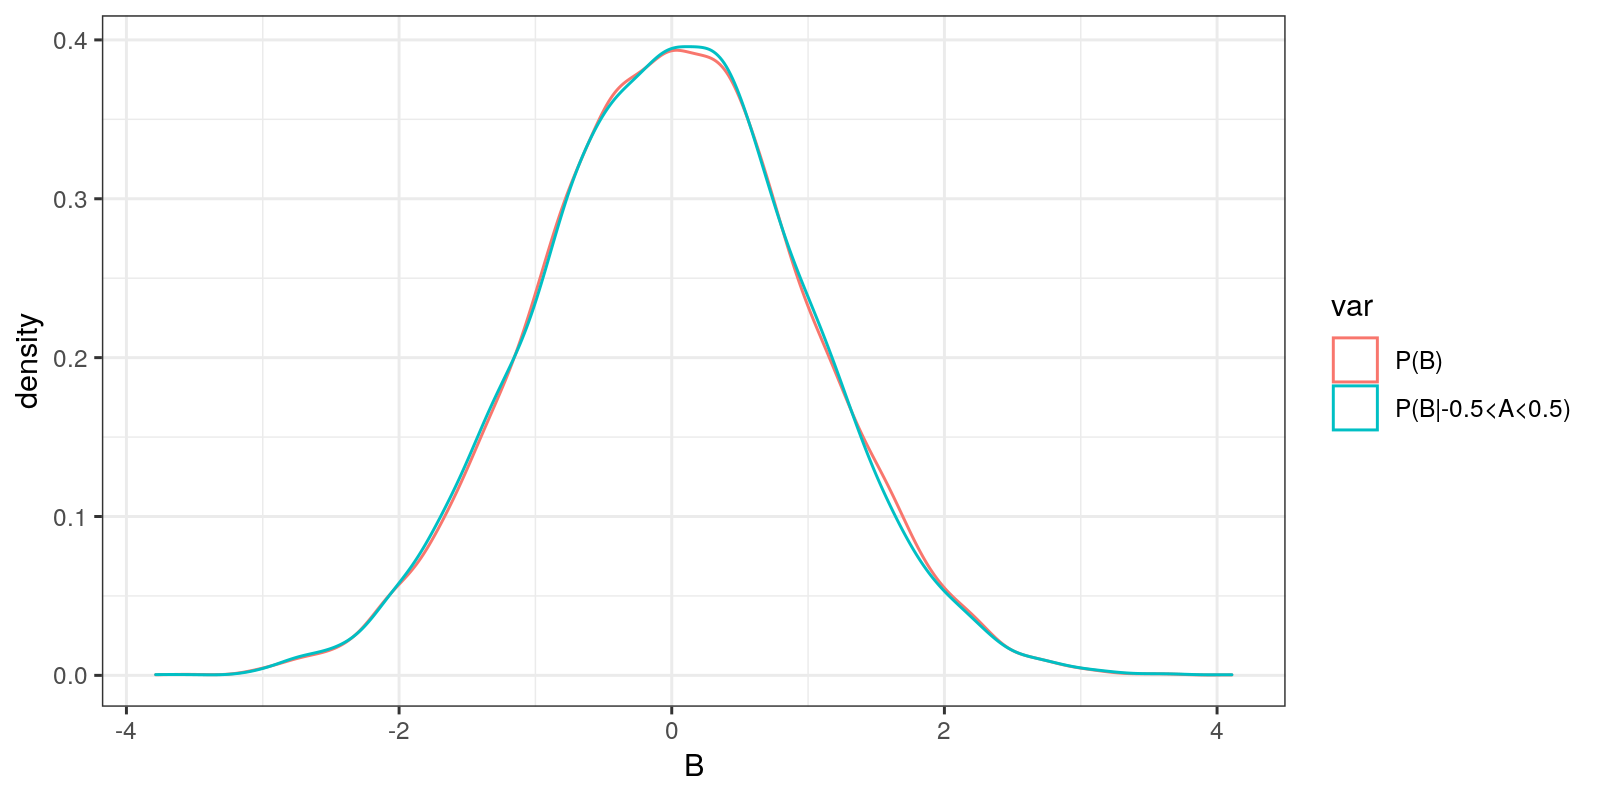

In [59]:
dfPartialProbs<-data.frame(B=B,var="P(B)")
dfPartialProbs<-rbind(dfPartialProbs,data.frame(B=df$B[df$A>-0.5 & df$A<0.5],var="P(B|-0.5<A<0.5)"))


ggplot(dfPartialProbs, aes(x=B,color=var))+geom_density()+
  theme_bw()

### Dos variables dependientes

En este caso: 
P(B,A)=P(B|A)·P(A)=P(A,B)=P(A|B)·P(B)

En este caso la matriz de covarianza no es diagonal.

[1] "Matriz de covarianza:"


,A,B
A,3.908269,3.922580
B,3.922580,8.006931


Warning message:
“Removed 5 rows containing non-finite values (stat_density2d).”
Warning message:
“Removed 5 rows containing non-finite values (stat_density2d).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”


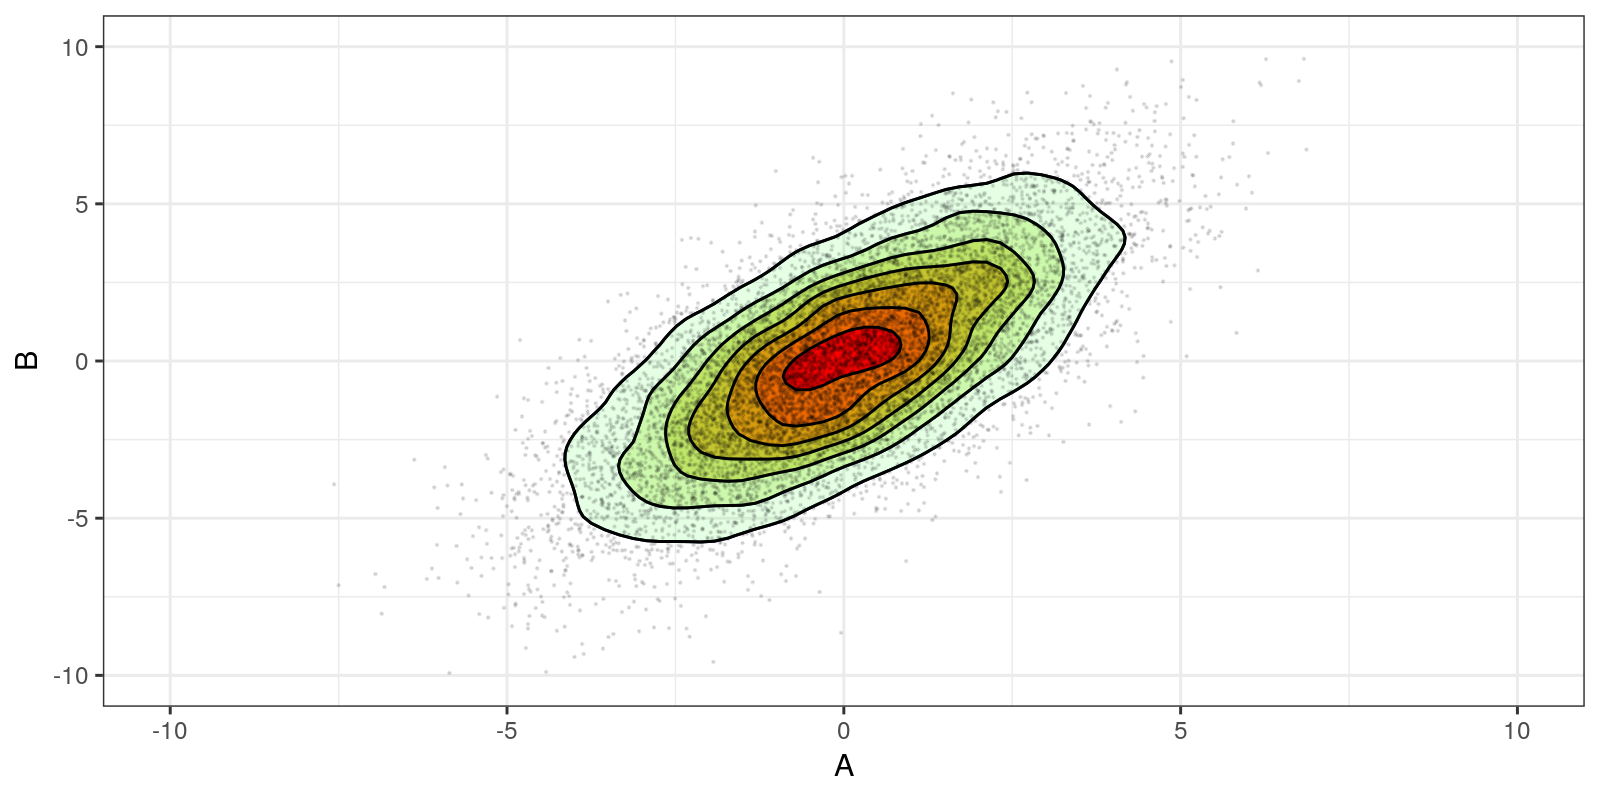

In [60]:
N<-10000
A<-rnorm(N,mean=0,sd=2)
B<-A+rnorm(N,mean=0,sd=2)
df<-data.frame(A,B)

print(paste("Matriz de covarianza:"))
cov(df)

library(ggplot2)
ggplot(df, aes(x=A, y=B))+geom_density2d(aes(colour=..level..)) + 
  stat_density2d(aes(fill=..level..,alpha=..level..),geom='polygon',colour='black') + 
  scale_fill_continuous(low="green",high="red") +    
  geom_point(alpha=0.1,size=0.1)+
  theme_bw()+theme(legend.position="none")+xlim(c(-10,10))+ylim(c(-10,10))

Como son dependientes, la probabilidad condicional de B respecto a A es diferente a la probabilidad de B
\\[
P(B|A) \neq P(B)
\\]

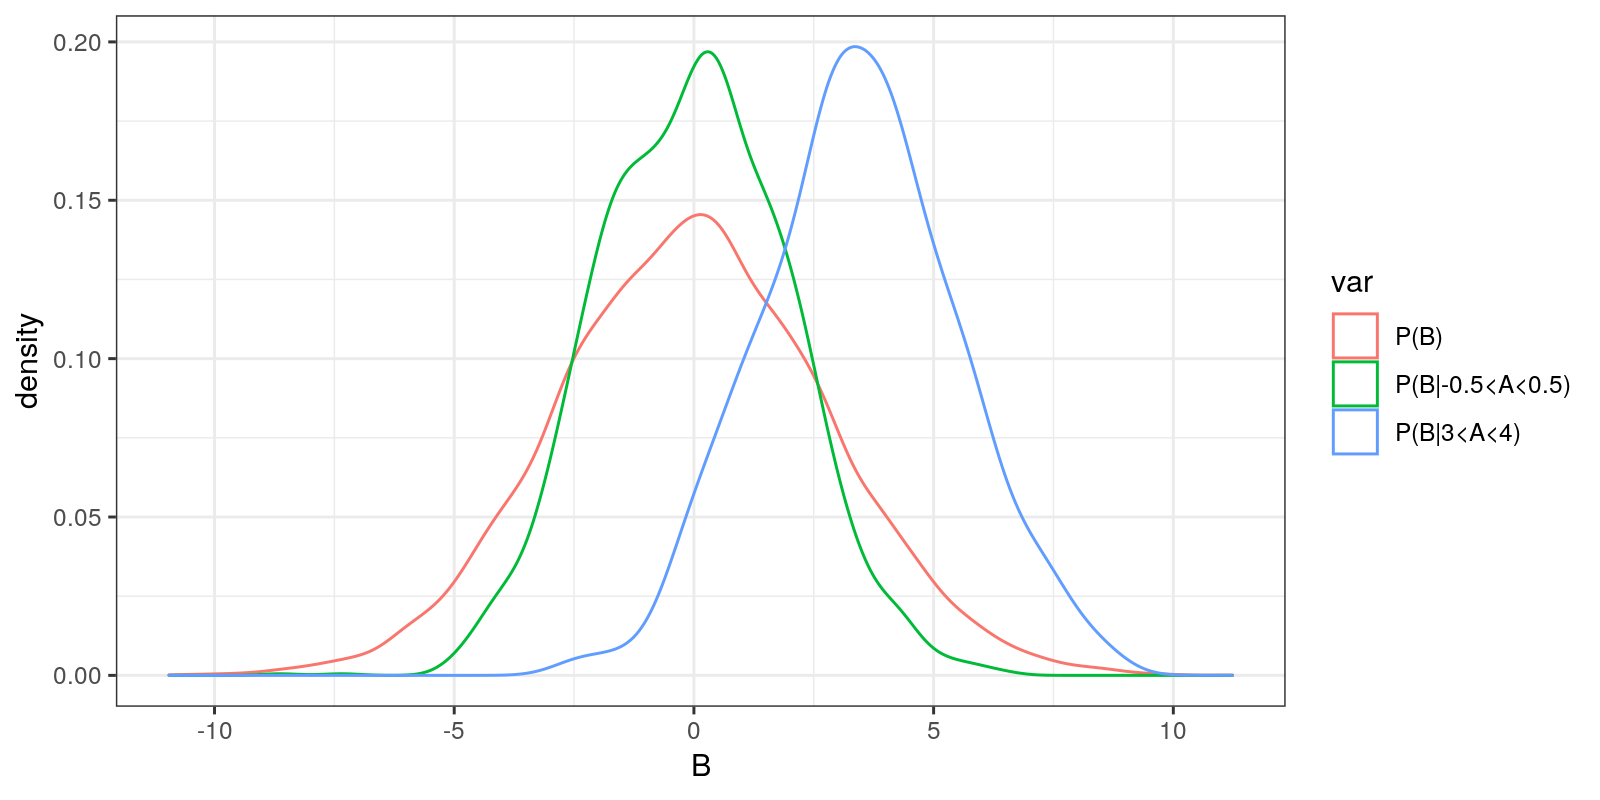

In [61]:
dfPartialProbs<-data.frame(B=B,var="P(B)")
dfPartialProbs<-rbind(dfPartialProbs,data.frame(B=df$B[df$A>-0.5 & df$A<0.5],var="P(B|-0.5<A<0.5)"))

dfPartialProbs<-rbind(dfPartialProbs,data.frame(B=df$B[df$A>3 & df$A<4],var="P(B|3<A<4)"))


ggplot(dfPartialProbs, aes(x=B,color=var))+geom_density()+
  theme_bw()

# Teorema de Bayes


El teorema de Bayes describe la probabilidad de un evento basado en conocimientos previos que puede estar relacionado con el evento. Su fórmula es bastente simple:
\\[
P(A|B)=\frac{P(B|A)·P(A)}{P(B)}=\frac{P(B,A)}{P(B)}
\\]

\\[
P(A|B)·P(B)=P(B|A)·P(A) = P(B,A) = P(A,B)
\\]
donde A y B son nuestras variables aleatorias y $P(B) \neq 0$:
* P(A|B) es la probabilidad condicional del evento A, sabiendo que ha ocurrido B
* P(B|A) es la probabilidad condicional del evento B, sabiendo que ha ocurrido A
* P(A) y P(B) es la probabilidad de observar A y B de forma independiente. Es conocido como la probabilidad **marginal**.
* P(B,A) o  P(B $\cap$ A): es la probabilidad de que ambos eventos A y B ocurran a la vez. 
 * Si son sucesos independientes P(B,A)=P(B)·P(A)
 * Si son sucesos dependientes P(B,A)=P(B|A)·P(A)


![]( ./pics/bayes1.jpg )

En la imagen anterior podemos ver dentro del cuadrado verde disparos rojos y blancos sobre un barco.
En total hay 35 disparos, 20 rojos y 15 blancos.

La probabilidad de elegir un disparo rojo al azar es:
\\[
\begin{split}
P(rojo)&=\frac{20}{35}=\frac{4}{7} \approx  0.571 \\
P(blanco)&=\frac{15}{35}=\frac{3}{7} \approx  0.428
\end{split}
\\]

La probabilidad de, en ese cuadrado, acertar al barco es:
\\[
P(barco)=\frac{4}{35} \approx  0.114
\\]

Si sabemos que se ha realizado un disparo **blanco**, ¿cuál es la probabilidad de que haya dado al **barco**?
\\[
P(barco|blanco)=\frac{3}{15} = 0.3
\\]

Si sabemos que se ha realizado un disparo **rojo**, ¿cuál es la probabilidad de que haya dado al **barco**?
\\[
P(barco|rojo)=\frac{1}{20} = 0.05
\\]

#### Apliquemos Bayes

El **barco** ha sido alcanzado por un disparo ¿Cuál es la probabilidad de que ese disparo sea **rojo**? 

Nos están preguntando por $P(rojo|barco)$. Conocemos P(barco|rojo), P(barco) y P(rojo), así que por el teorema de Bayes:

\\[
P(rojo|barco)=\frac{P(barco|rojo)·P(rojo)}{P(barco)} =\frac{0.05 ·\frac{20}{35} }{\frac{4}{35}}=\frac{1}{4}=0.25
\\]



El **barco** ha sido alcanzado por un disparo ¿Cuál es la probabilidad de que ese disparo sea **blanco**? 

Nos están preguntando por $P(blanco|barco)$. Conocemos P(barco|blanco), P(barco) y P(blanco), así que por el teorema de Bayes:

\\[
P(rojo|barco)=\frac{P(barco|blanco)·P(blanco)}{P(barco)} =\frac{\frac{3}{15} ·\frac{15}{35} }{\frac{4}{35}}=\frac{3}{4}=0.75
\\]


#### Probabilidad conjunta

¿Cual es la probabilidad de que un disparo de al **barco** y además sea **rojo**?

\\[
\begin{split}
P(barco,rojo)&=P(barco|rojo)·P(rojo)=\frac{1}{20}·\frac{20}{35}=\frac{1}{35} \\
P(barco,rojo)&=P(rojo|barco)·P(barco)=\frac{1}{4}·\frac{4}{35}=\frac{1}{35}
\end{split}
\\]


## Arboles bayesianos

Estamos en el año 2025, un terrible virus ha escapado de un laboratorio de máxima seguridad y está infectando a gente alrededor de todo el mundo convirtiendolos en zombies admiradores de [Nyan Cat](https://www.youtube.com/watch?v=QH2-TGUlwu4) aunque luego en apariencia llevan una vida normal. Se calcula que en este momento un **5% de la población** mundial está infectada.

Afortunadamente existe un test al que se puede someter a un individuo para ver si está infectado o no. Pero el test no es 100% fiable, nunca se tiene tanta seguridad. Si la persona está infectada el test acertará un 99% de las veces, en cambio si no está infectada el test acertará un 98% de las veces. Esto genera la siguiente **matriz de confusión**:

|. |Infectado|Sano|
|-|-|-|
|**Test=1**| 99%| 2% |
|**Test=0**| 1%| 98% |


Si elegimos una persona al azar y nuestro test dice que está infectado, ¿que posibilidades hay de que realmente esté infectado?
Queremos saber P(Zombie=1|Test=1)

Utilizando Bayes:
\\[
P(Zombie=1|Test=1)=\frac{P(Test=1|Zombie=1)·P(Zombie=1)}{P(Test=1)}
\\]
Pero desconocemos $P(Test=1)$, aunque podemos obtenerlo mediante:
\\[
\begin{split}
P(Test=1)&=P(Test=1|Zombie=1)·P(Zombie=1)+P(Test=1|Zombie=0)·P(Zombie=0) \\
P(Test=1)&=P(Test=1,Zombie=1)+P(Test=1,Zombie=0)
\end{split}
\\]
Es decir:
\\[
\begin{split}
P(Z=1|T=1)=\frac{P(T=1|Z=1)·P(Z=1)}{P(T=1|Z=1)·P(Z=1)+P(T=1|Z=0)·P(Z=0)} \\
P(Z=1|T=1)=\frac{0.99·0.05}{0.99·0.05+0.02·0.95}=0.7226 \\
\end{split}
\\]


Esta misma información se puede representar con un grafo acíclico:

![]( pics/bayestree1.png )

## Análisis Causal y análisis contrafactual

El análisis causal nos permite ver la relación causa efecto que hay entre diferentes variables.

Veamos un ejemplo sacado del libro "The book of why". Imaginemos que la vacuna de la viruela que se aplica al 99% de la población.

De los vacunados, un 1% desarrolla una reacción y de ese grupo un 1% fallece. Pero ninguno coge viruela.

De los no vacunados, un 2% coge la enfermedad, y de esos enfermos un 20% fallece. 

El diagrama causal sería el siguiente:

![](pics/causal_viruela.jpg)

Si pintamos cada una de esas probabilidades. La probabilidad de sufrir una reacción (R) o la enfermedad (E) en función de la vacuna (V):
\\[
P(R|V)=0.01 \\
P(R|\neg V)=0 \\
P(E|V)=0 \\
P(E|\neg V)=0.02
\\]

Las probabilidades de fallecimiento (M) en función de la reacción (R) o la enfermedad (E) son:
\\[
P(M|R)=0.01 \\
P(M|E)=0.2
\\]

Si partimos de una población de 1 millón de personas, habrá 990.000 vacunados y 10.000 sin vacunar. De todos los vacunados fallecerán 99 personas. De los no vacunados fallecerán 40 personas.

**En esta población muere más gente por las vacunas que por la enfermedad**.

El análisis contrafactual trata de responder a la pregunta, si no se hubiera aplicado la vacuna. ¿Cuanta gente habría fallecido?

La probabilidad de fallecer si te pones la vacuna es:

\\[
P(M|V) = P(M|R)·P(R|V) = 0.01·0.01 = 10^{-4}
\\]

La probabilidad de fallecer si NO te pones la vacuna es:
\\[
P(M|\neg V) = P(M|E)·P(E|\neg V) = 0.02·0.2 = 0.004
\\]



Si el millón de personas no se hubiera vacunado número de fallecidos sería de $10^6·0.004 = 4000$ personas. 

La vacuna ha salvado la vida de $4000-99-40=3861$ personas.


## El problema de Monty Hall

Este problema recibe su nombre tras el programa de televisión "Let's Make a Deal" presentado por Monty Hall en la década de 1970. El enunciado más famoso del problema, extraído de Parade Magazine en 1990:

*Supón que estás en un concurso, y se te ofrece escoger entre tres puertas: detrás de una de ellas hay un coche, y detrás de las otras, cabras. Escoges una puerta, digamos la nº1, y el presentador, que sabe lo que hay detrás de las puertas, abre otra, digamos la nº3, que contiene una cabra. Entonces te pregunta: "¿No prefieres escoger la nº2?". ¿Es mejor para ti cambiar tu elección?*


![]( pics/montyhall.png )


Tenemos tres hipótesis:
* $H_1$: El coche está tras la puerta 1
* $H_2$: El coche está tras la puerta 2
* $H_3$: El coche está tras la puerta 3

Evidentemente, como no tenemos ningún tipo de información adicional:
\\[
P(H_1)=P(H_2)=P(H_3)=\frac{1}{3}
\\]

Nuestra evidencia vendrá de Monty abriendo una puerta, evidentemente sabemos que:
* Monty siempre abrirá una puerta de las 2 que no hayamos seleccionado.
* Monty nunca abrirá la puerta que tenga el coche.


Nosotros estamos interesados en la probabilidad que el coche esté detrás de una puerta utilizando nuestro conocimiento.

Imaginemos que el **concursante selecciona la puerta 1**, a continuación **Monty selecciona la puerta 3**. Las siguientes **probabilidades condicionales** ocurren:
* Condición, el coche está tras la puerta 1: Puede abrir igualmente la puerta 2 o 3
\\[
P(M_3|H_1)=\frac{1}{2}=P(M_2|H_1)
\\]
* Condición, el coche está tras la puerta 2: Puede abrir solo la puerta 3:
\\[
P(M_3|H_2)=1
\\]
* Condición, el coche está tras la puerta 3: No podría abrir esa puerta:
\\[
P(M_3|H_3)=0
\\]

Desde nuestro punto de vista, la probabilidad marginal de que Monty elija la puerta 2 o 3 es la misma, porque no sabemos donde está el coche. Solo sabemos que nunca eligirá la puerta 1 porque es la que seleccionó el concursante:
\\[
P(M_2)=P(M_3)=\frac{1}{2}
\\]


Ahora hay dos opciones, cambiar a la puerta 2 o mantenerse en la puerta 1.
* Se mantiene en puerta 1, sabiendo que la puerta 3 no tiene premio:
\\[
P(H_1|M_3)=\frac{P(M_3|H_1)·P(H_1)}{P(M_3)}=\frac{\frac{1}{2}·\frac{1}{3}}{\frac{1}{2}}=\frac{1}{3}
\\]
* Se cambia a la puerta 2, sabiendo que la puerta 3 no tiene premio:
\\[
P(H_2|M_3)=\frac{P(M_3|H_2)·P(H_2)}{P(M_3)}=\frac{1·\frac{1}{3}}{\frac{1}{2}}=\frac{2}{3}
\\]

Así pues se ve que la probabilidad de cambiar de puerta es 2/3, mientras que la probabilidad de mantenerse con la original es 1/3.


In [ ]:
N<-10000
puerta_con_premio<-floor(runif(N,min=1,max=4))

seleccion_inicial_del_concursante<-floor(runif(N,min=1,max=4))
seleccion_cambiada_del_concursante<-rep(NA,N)

for (i in 1:N){
    
    # Monty selecciona una puerta
    if (puerta_con_premio[i]==1){
        if (puerta_con_premio[i]==seleccion_inicial_del_concursante[i]){
            seleccion_monty<-ifelse(runif(1)>0.5,2,3)
        }else{
            seleccion_monty<-ifelse(seleccion_inicial_del_concursante[i]==3,2,3)
        }
    }else if (puerta_con_premio[i]==2){
        if (puerta_con_premio[i]==seleccion_inicial_del_concursante[i]){
            seleccion_monty<-ifelse(runif(1)>0.5,1,3)
        }else{
            seleccion_monty<-ifelse(seleccion_inicial_del_concursante[i]==3,1,3)
        }        
    }else if (puerta_con_premio[i]==3){
        if (puerta_con_premio[i]==seleccion_inicial_del_concursante[i]){
            seleccion_monty<-ifelse(runif(1)>0.5,1,2)
        }else{
            seleccion_monty<-ifelse(seleccion_inicial_del_concursante[i]==1,2,1)
        }
    }
    
    # El concursante selecciona otra puerta
    puertas_prohibidas<-c(seleccion_monty,seleccion_inicial_del_concursante[i])
    seleccion_cambiada_del_concursante[i]<-which(is.na(match(1:3,puertas_prohibidas)))    
}

p1<-mean(seleccion_inicial_del_concursante==puerta_con_premio)
print(paste0("Si el concursante nunca cambia de puerta la probabilidad de acertar es:",p1))
p2<-mean(seleccion_cambiada_del_concursante==puerta_con_premio)
print(paste0("Si el concursante siempre cambia de puerta la probabilidad de acertar es:",p2))